In [10]:
import os  
os.environ['CUDA_VISIBLE_DEVICES'] = "1"

In [11]:
from env.charge_station_env_zero import StationEnv
# from env.test_env import StationEnv
import numpy  as np
import torch

import time

In [12]:
num_of_pile = 15
save_image = False
# save_image = True
# plot_image = False
plot_image = True

In [13]:
# model = torch.load('/root/mnt/EV_stable_baseline/project/tianshou_0/log/EV/td3/6/240711-163743/checkpoint_11000.pth')
model = torch.load('/root/mnt/EV_stable_baseline/project/tianshou_0/log/EV/td3/3/240627-170500/checkpoint_10500.pth')
model = torch.load('/root/mnt/EV_stable_baseline/project/tianshou_0/log/EV/td3/ddpg/240614-130610/checkpoint_15000.pth')


In [14]:
# import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 22})
# plt.rcParams["figure.figsize"] = (20, 8)
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif']  = ['Times New Roman'] + plt.rcParams['font.serif']

# fig,axes = plt.subplots()
# # plt.title(title)
# plot_time = np.array(range(96))
# axes.set_xticks(plot_time[::4])
# axes.set_xlabel('Time', labelpad=20)
# axes.tick_params(axis='x', labelsize=16) 

# custom_labels = [f"{i}:00" for i in range(24)]
# axes.set_xticklabels(custom_labels, rotation=90)
# plot_time = np.array(range(96))
# # price
# axes.set_ylim(1,8)
# # axes.set_ylabel('Price (TWD)', color='steelblue')
# axes.set_ylabel('Price (TWD)')
# axes.spines['right'].set_position(("axes",1))
# axes.tick_params(axis='y', color='steelblue')
# axes.plot( plot_time, np.array([1.9 ]*36+[4.26]*28+[6.89]*24+[4.26]*8) , label = "Summer", linewidth = 4, color='steelblue')
# axes.plot( plot_time, np.array([1.81]*24+[4.13]*20+[1.81]*12+[4.13]*40), label = "Not Summer", linewidth = 4, color='green')
# random_price = [5.99]*6+[4.84]*6+[1.39]*11+[2.73]*15+[5.10]*8+[2.48]*16+[6.56]*4+[3.54]*4+[5.24]*19+[3.68]*5+[5.97]*2
# axes.plot( plot_time, random_price , label = "Random Generation", linewidth = 4, color='darkorange')
# axes.grid()

# # set all legend    
# fig.legend(bbox_to_anchor=(0.8, 0.12), loc="lower center", fontsize='small', shadow=False, ncol=1)
# fig.show()

# #save img
# desired_dpi = 300
# fig.savefig("plot/price.svg", dpi=desired_dpi, bbox_inches='tight')

set multi_env seed:0
程式執行時間： 0.197892427444458 秒
986.7744920766313


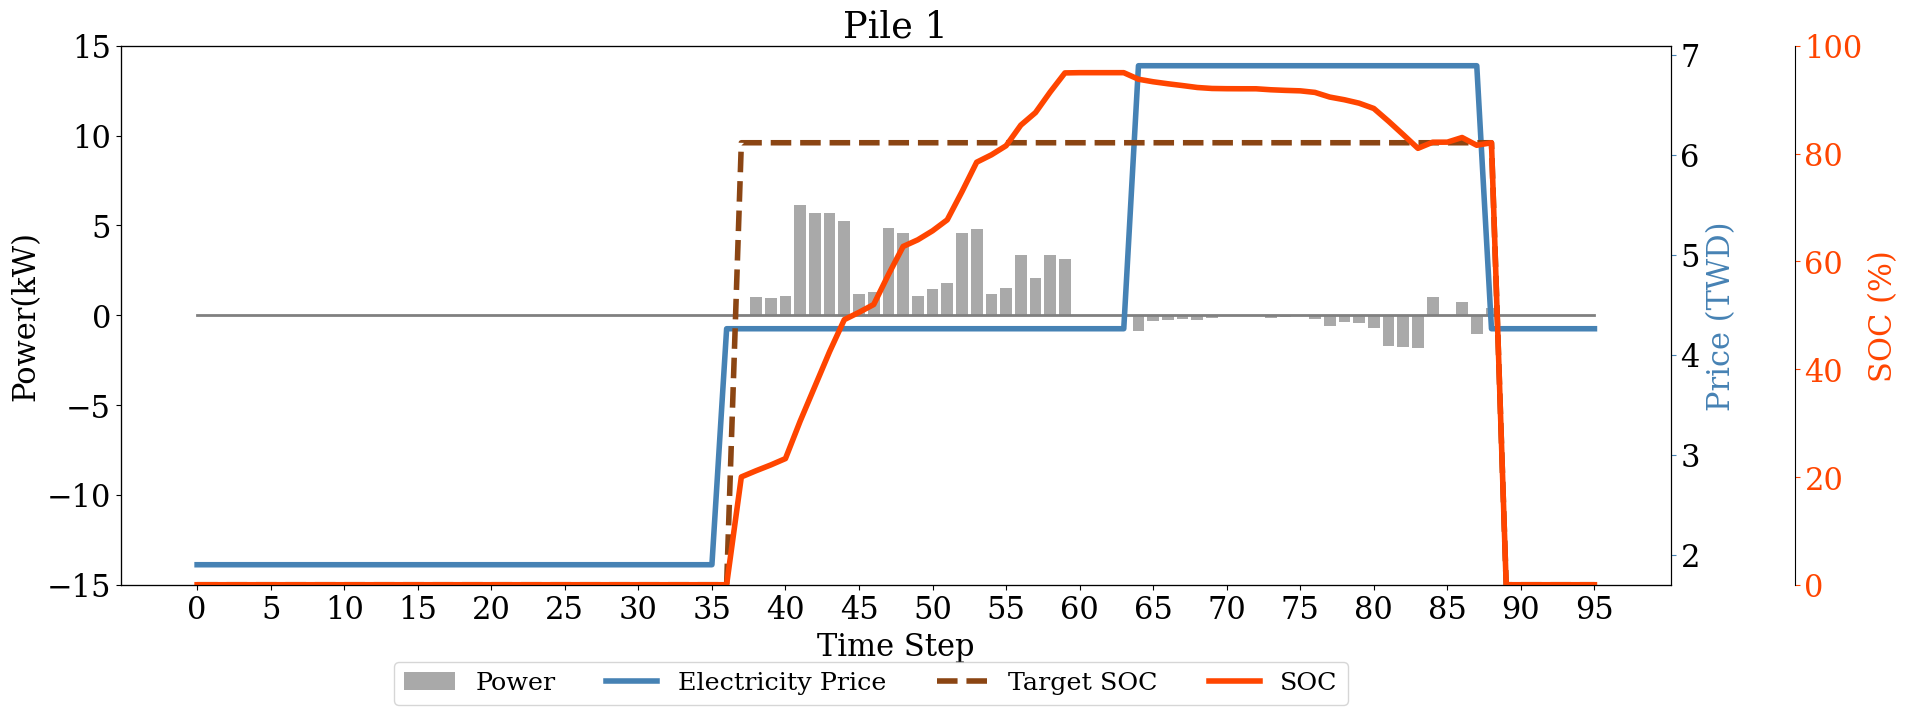

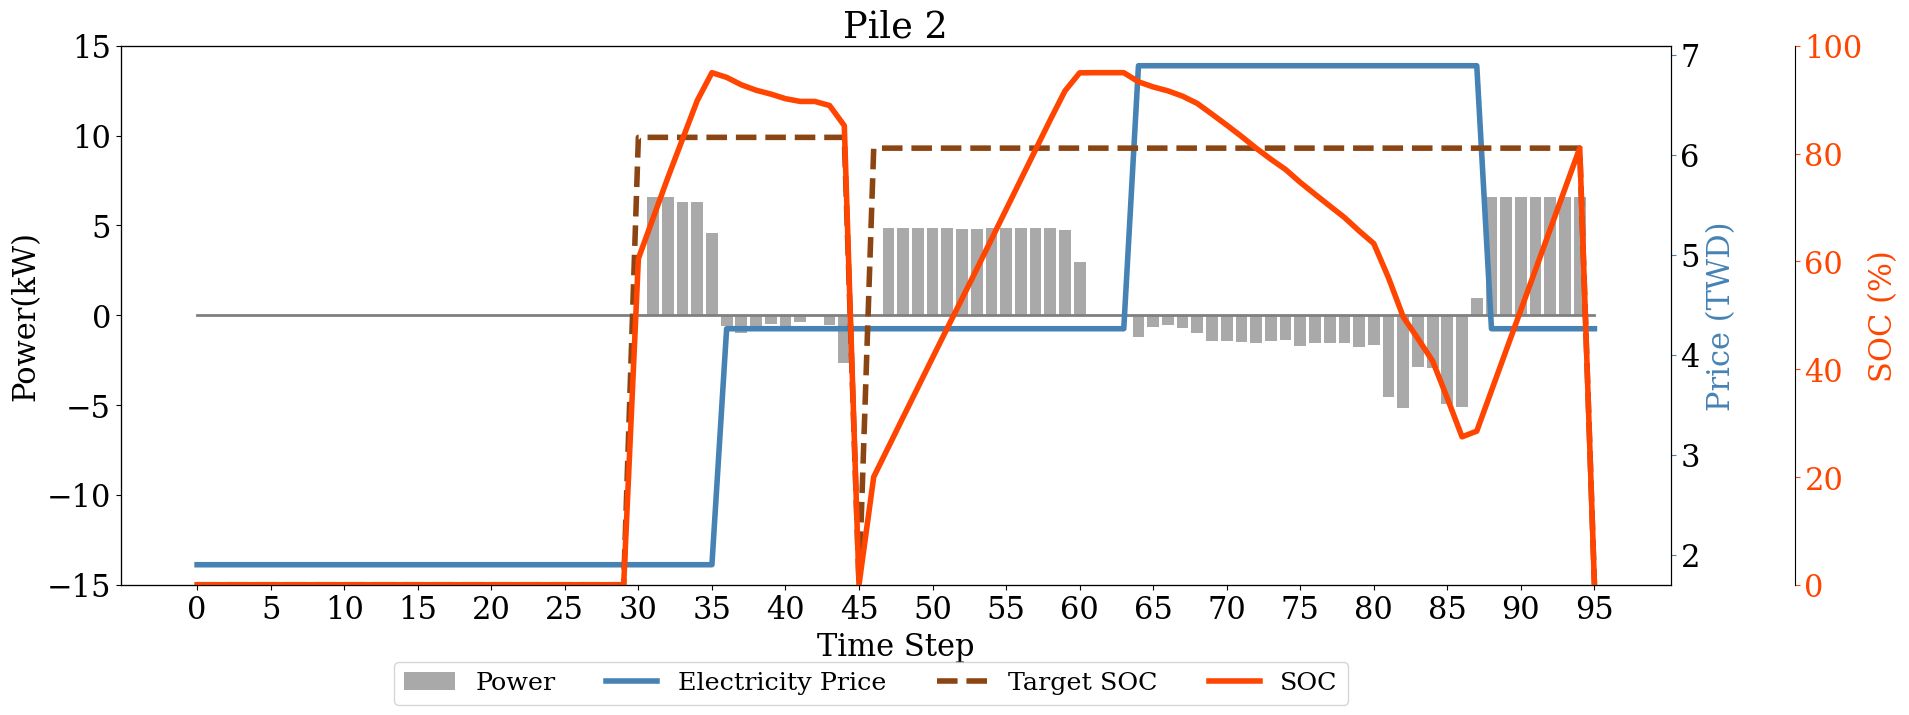

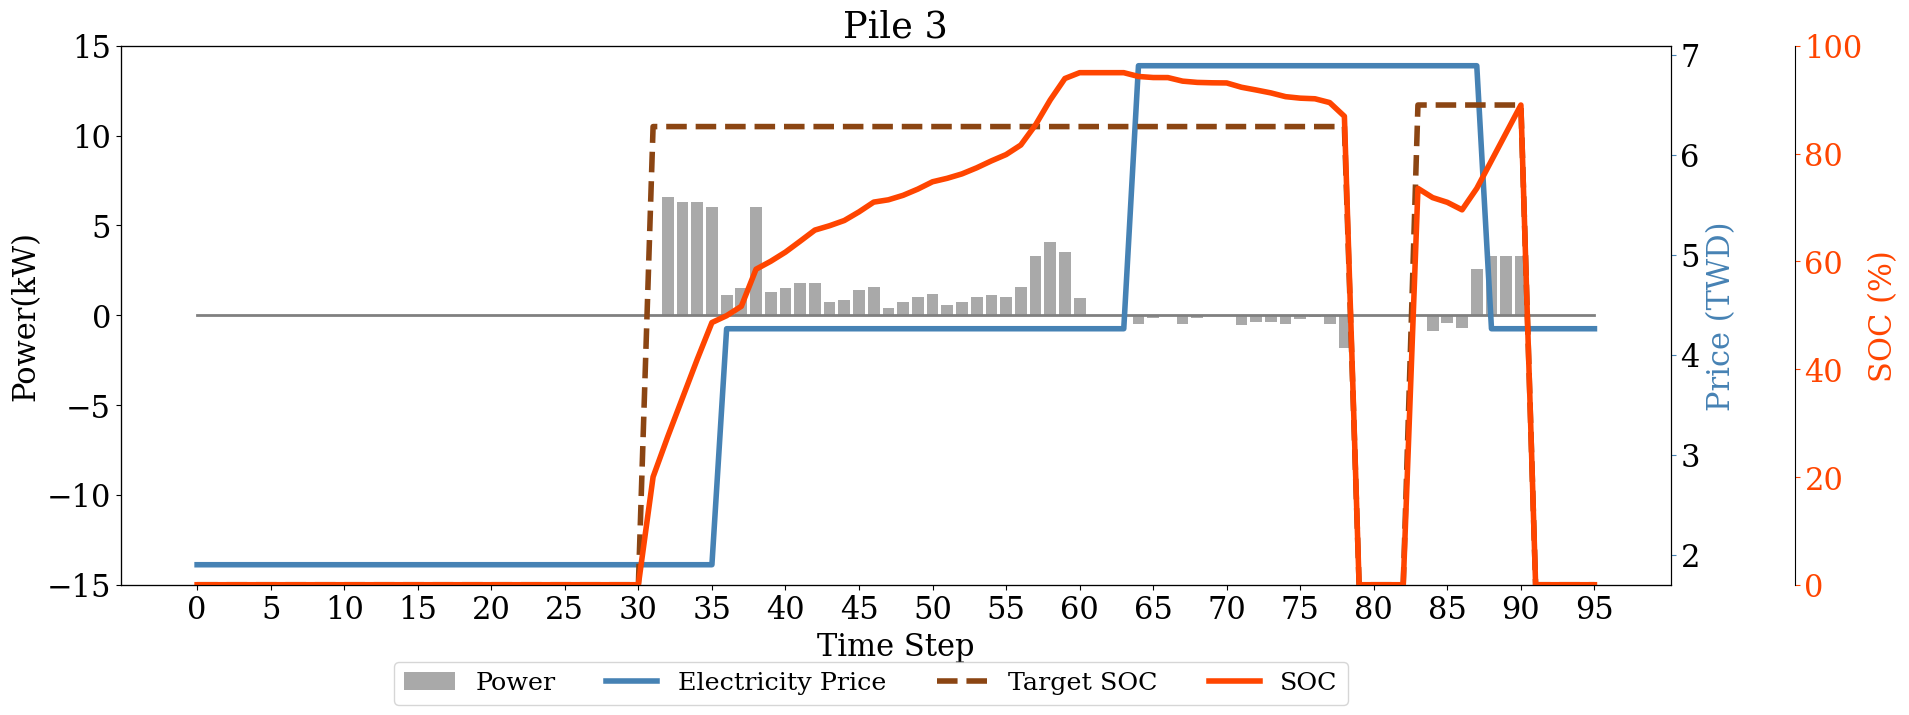

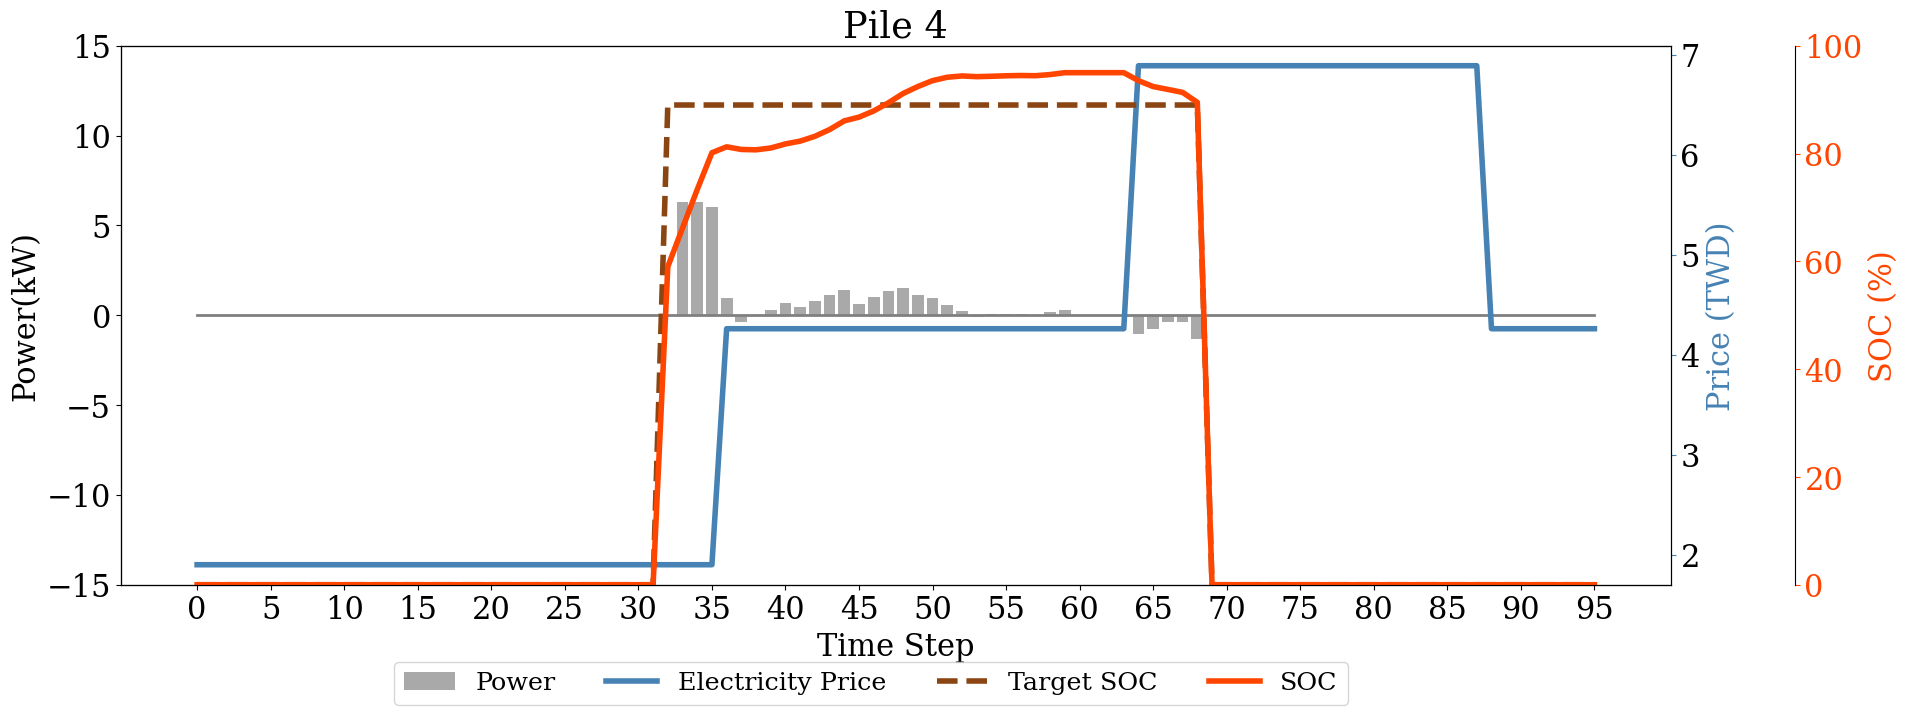

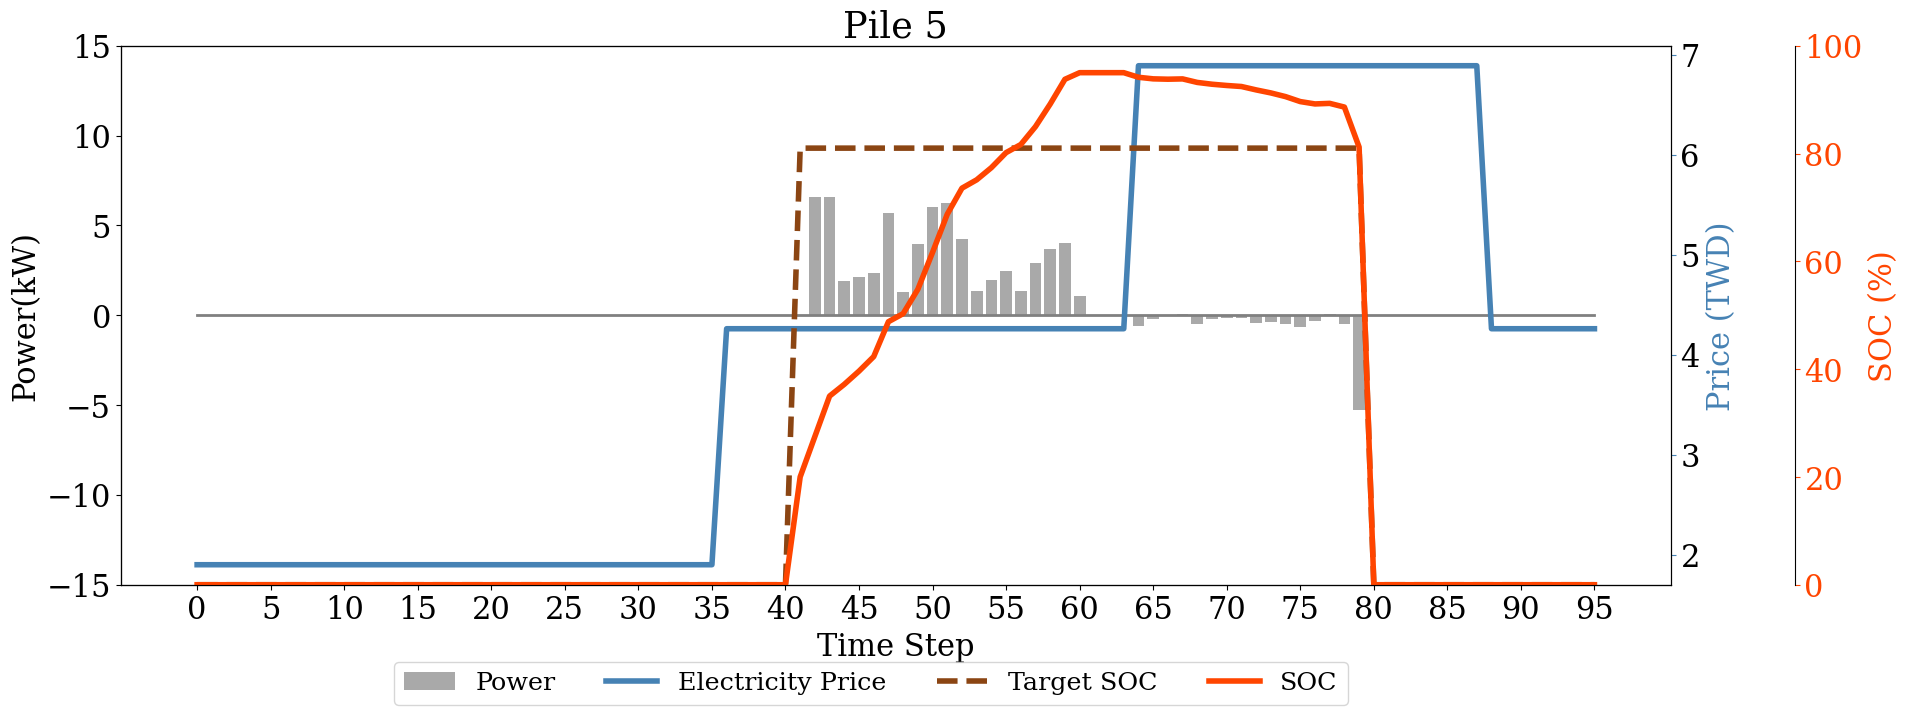

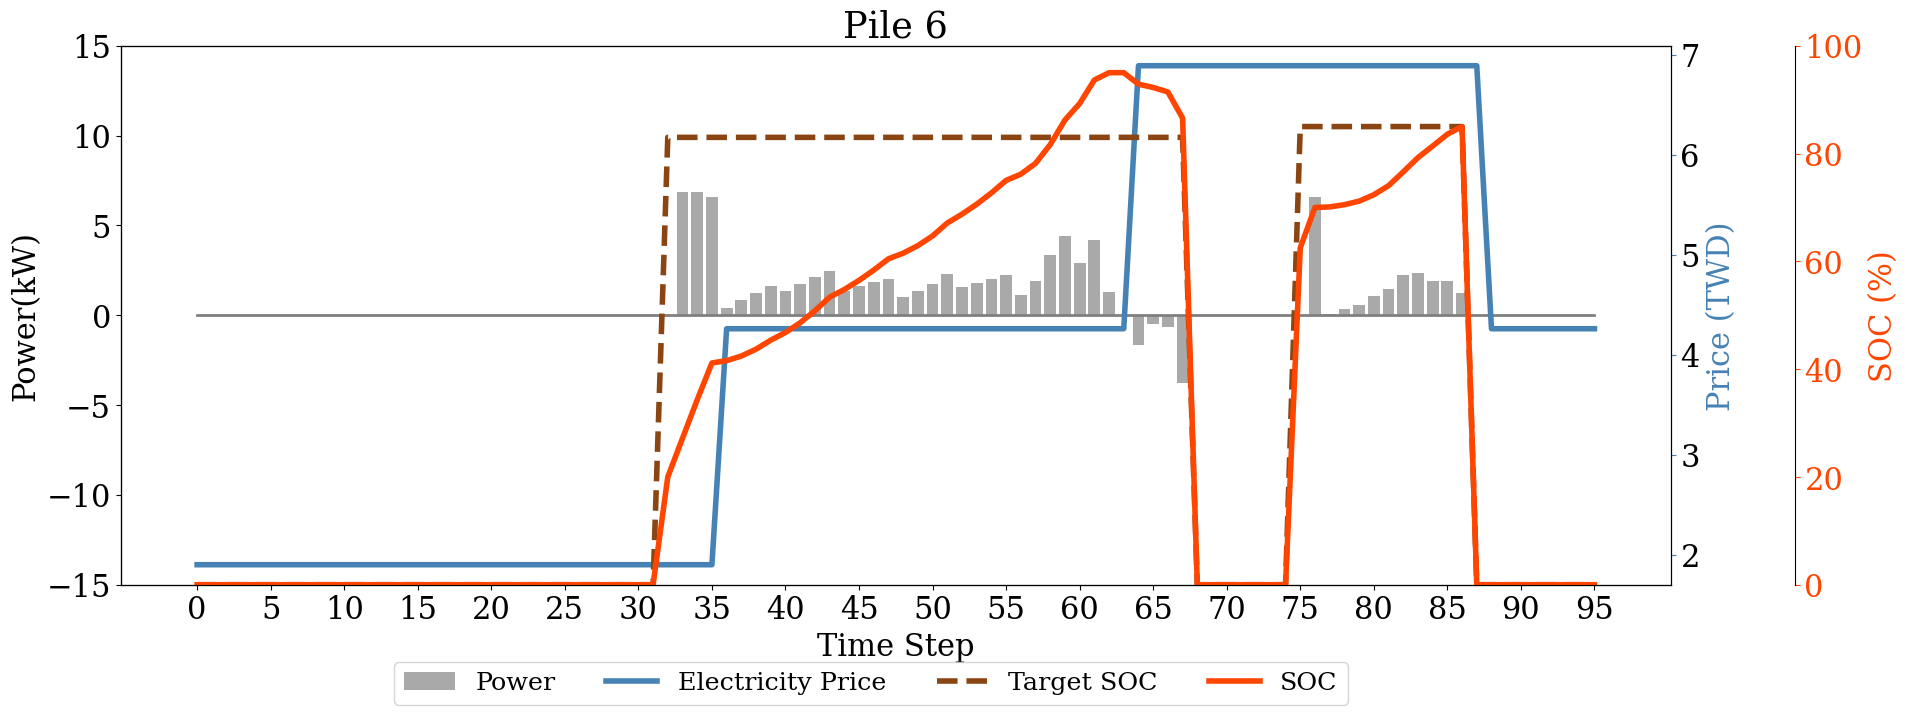

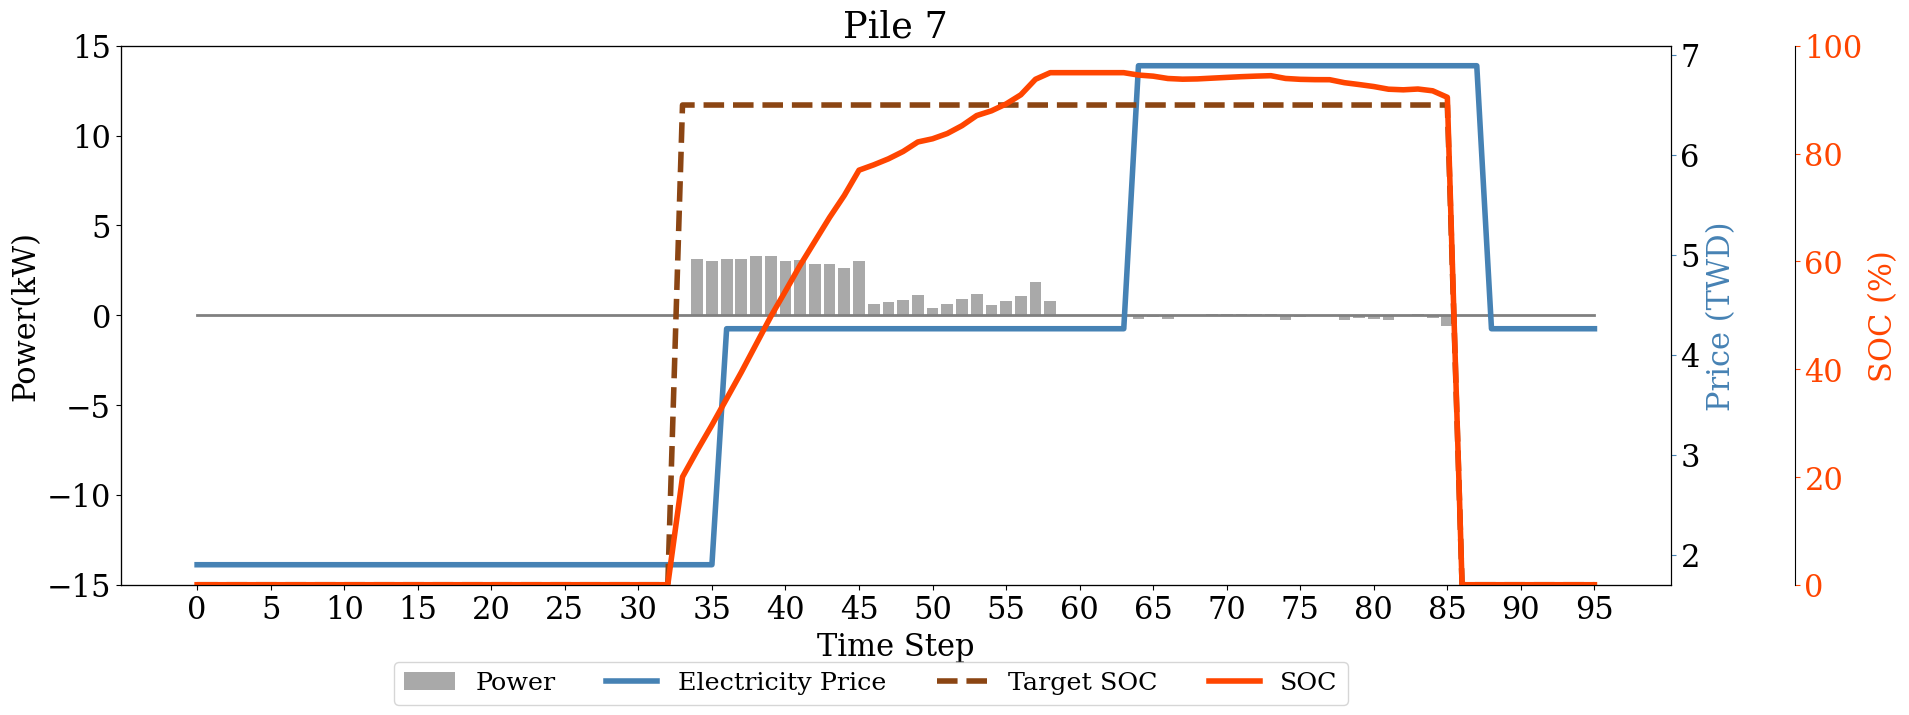

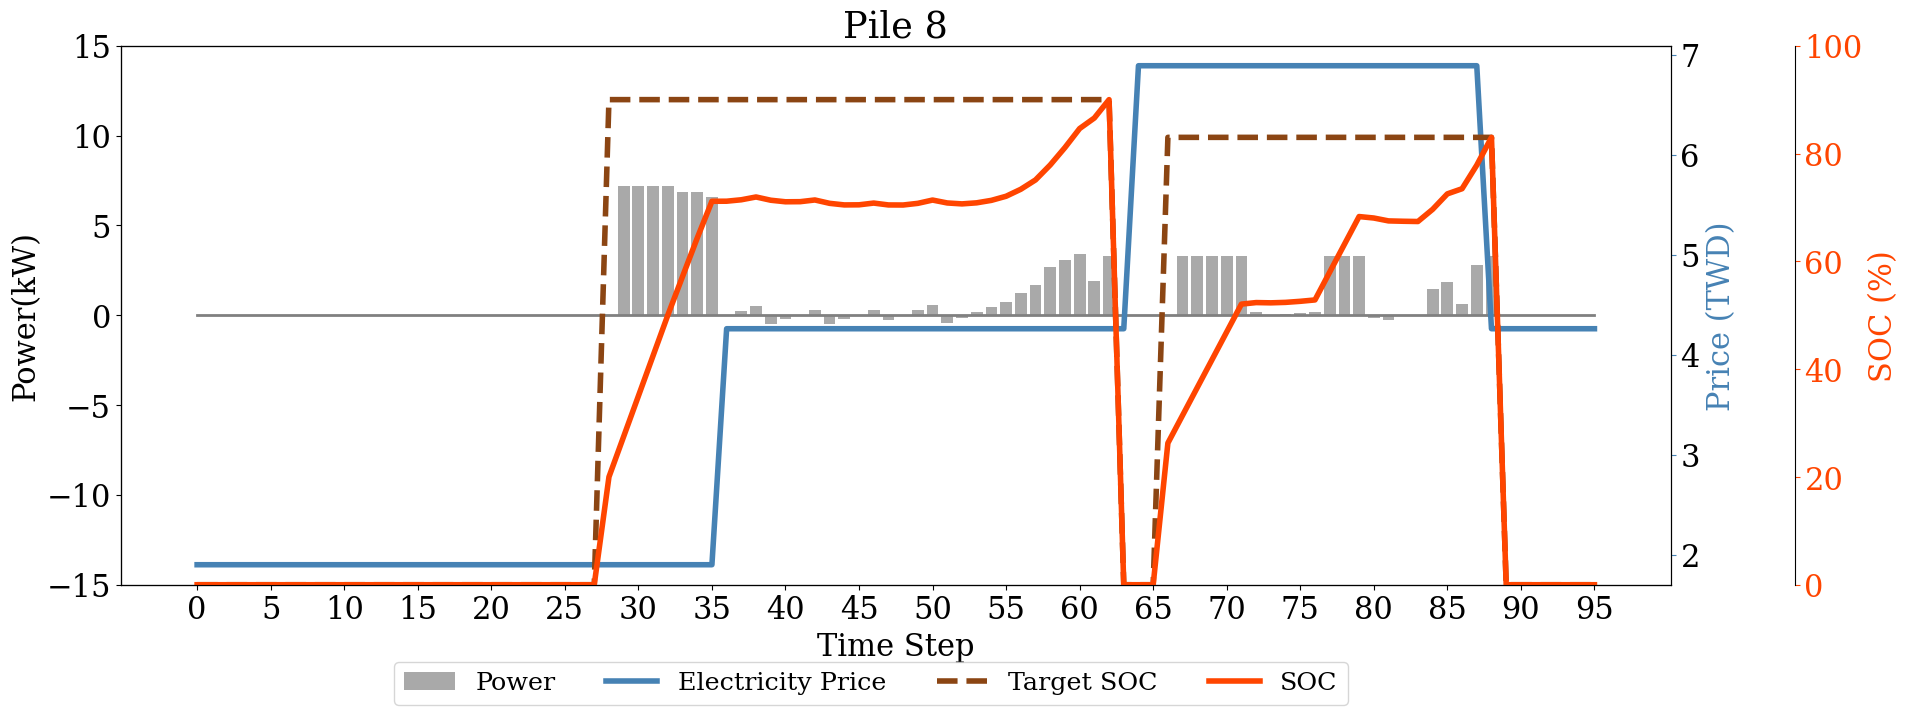

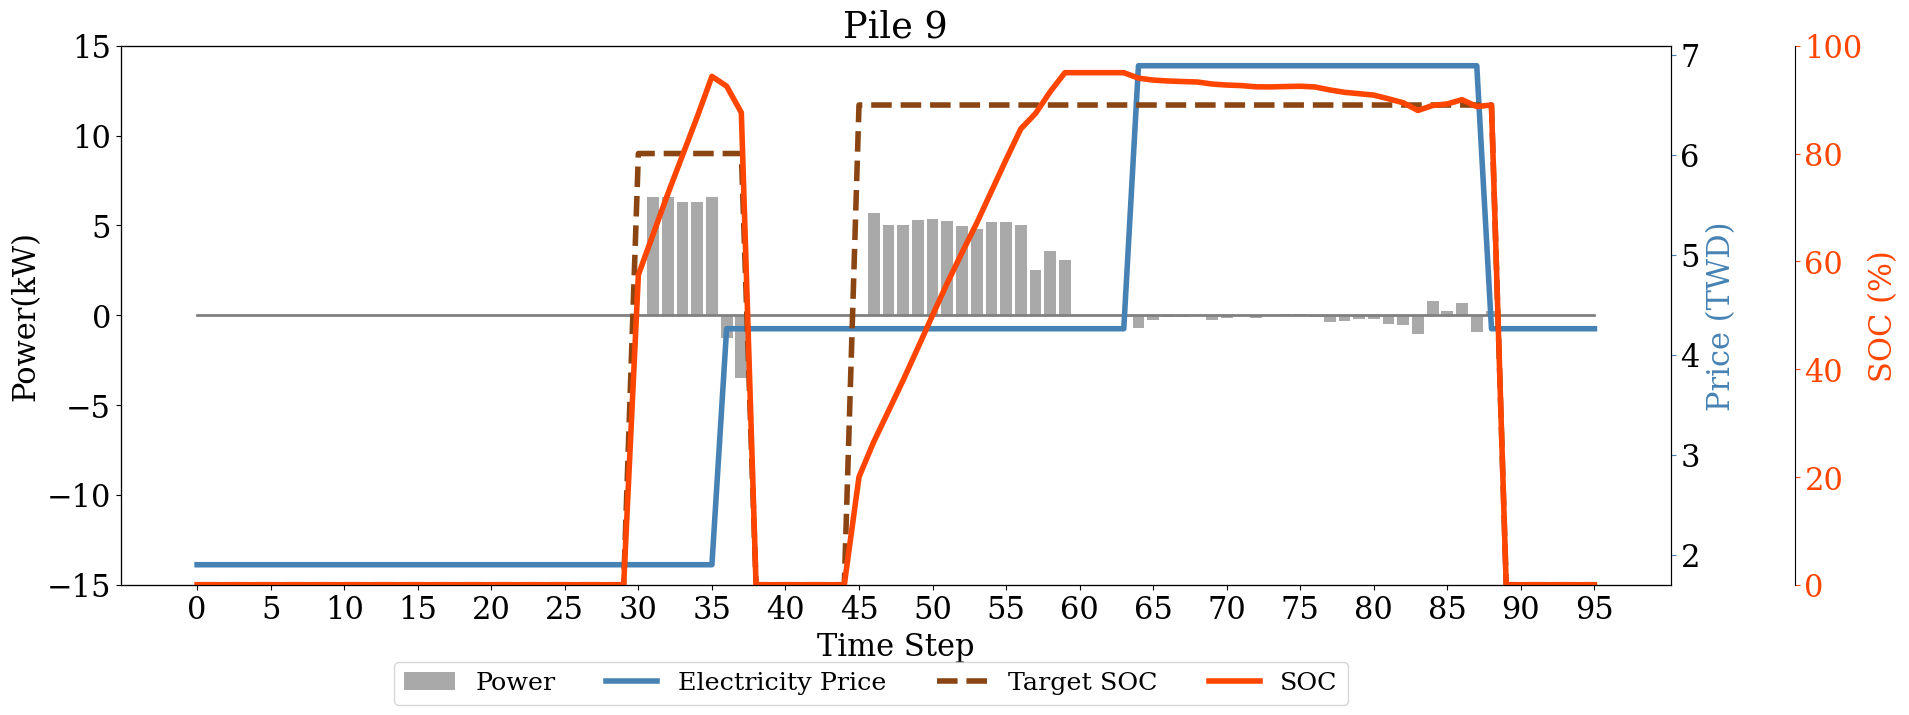

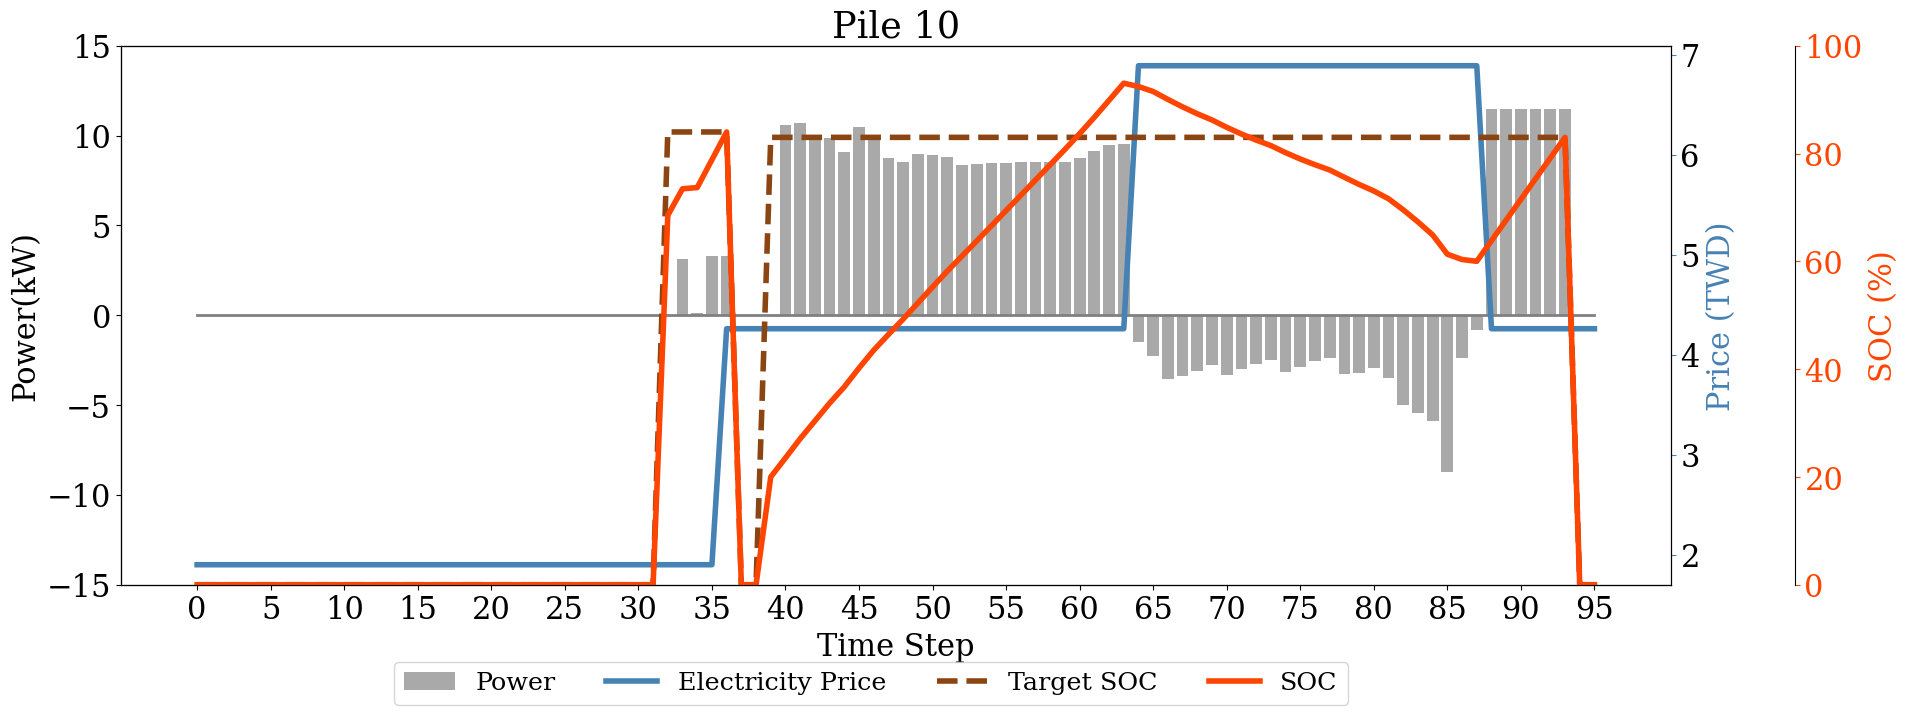

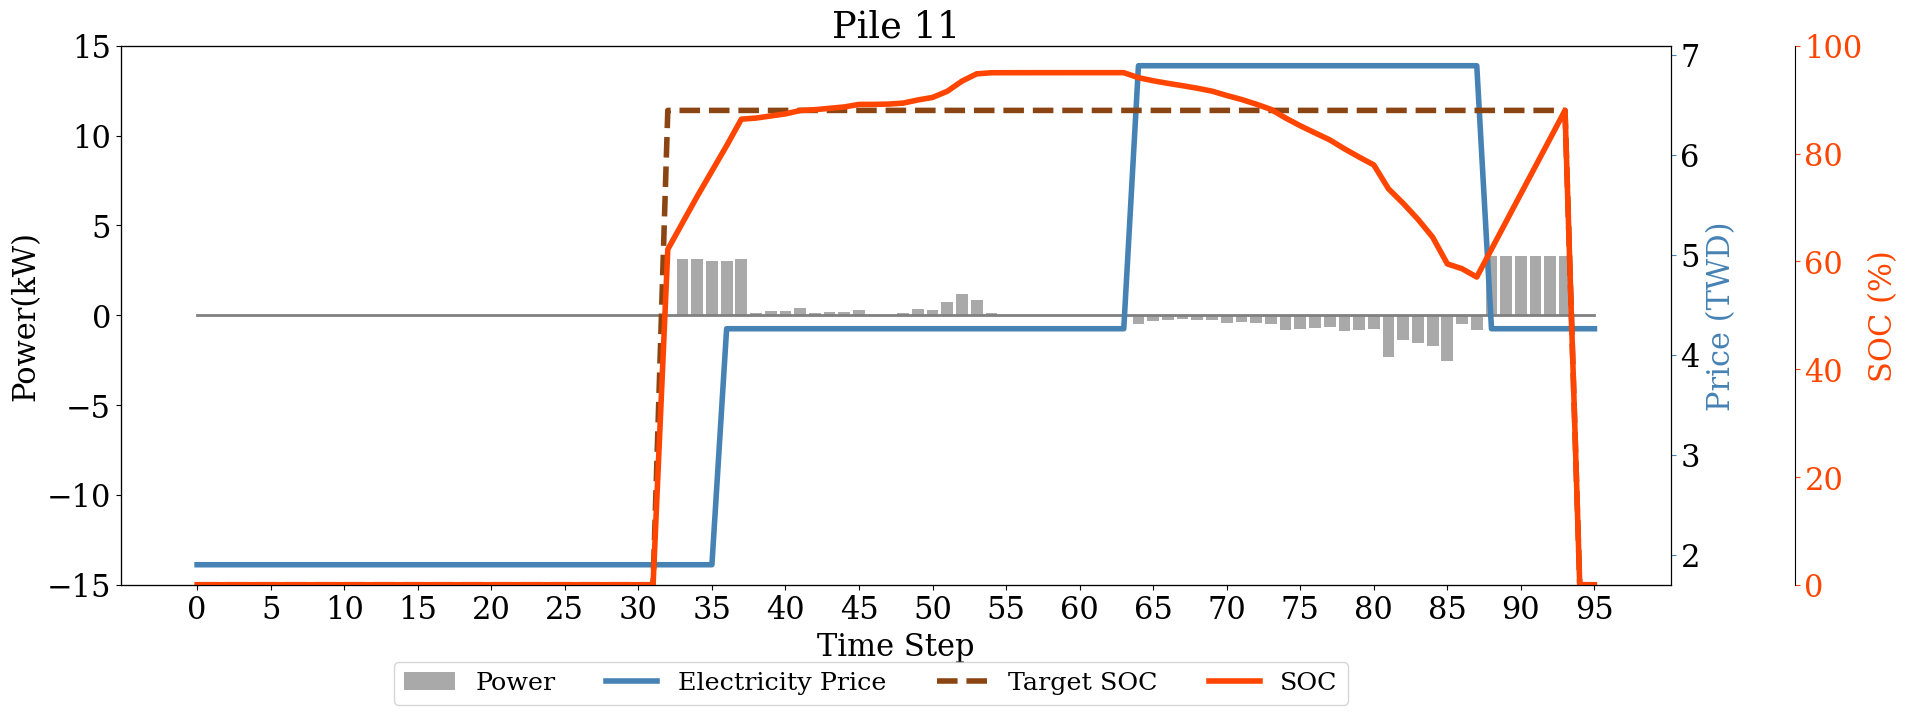

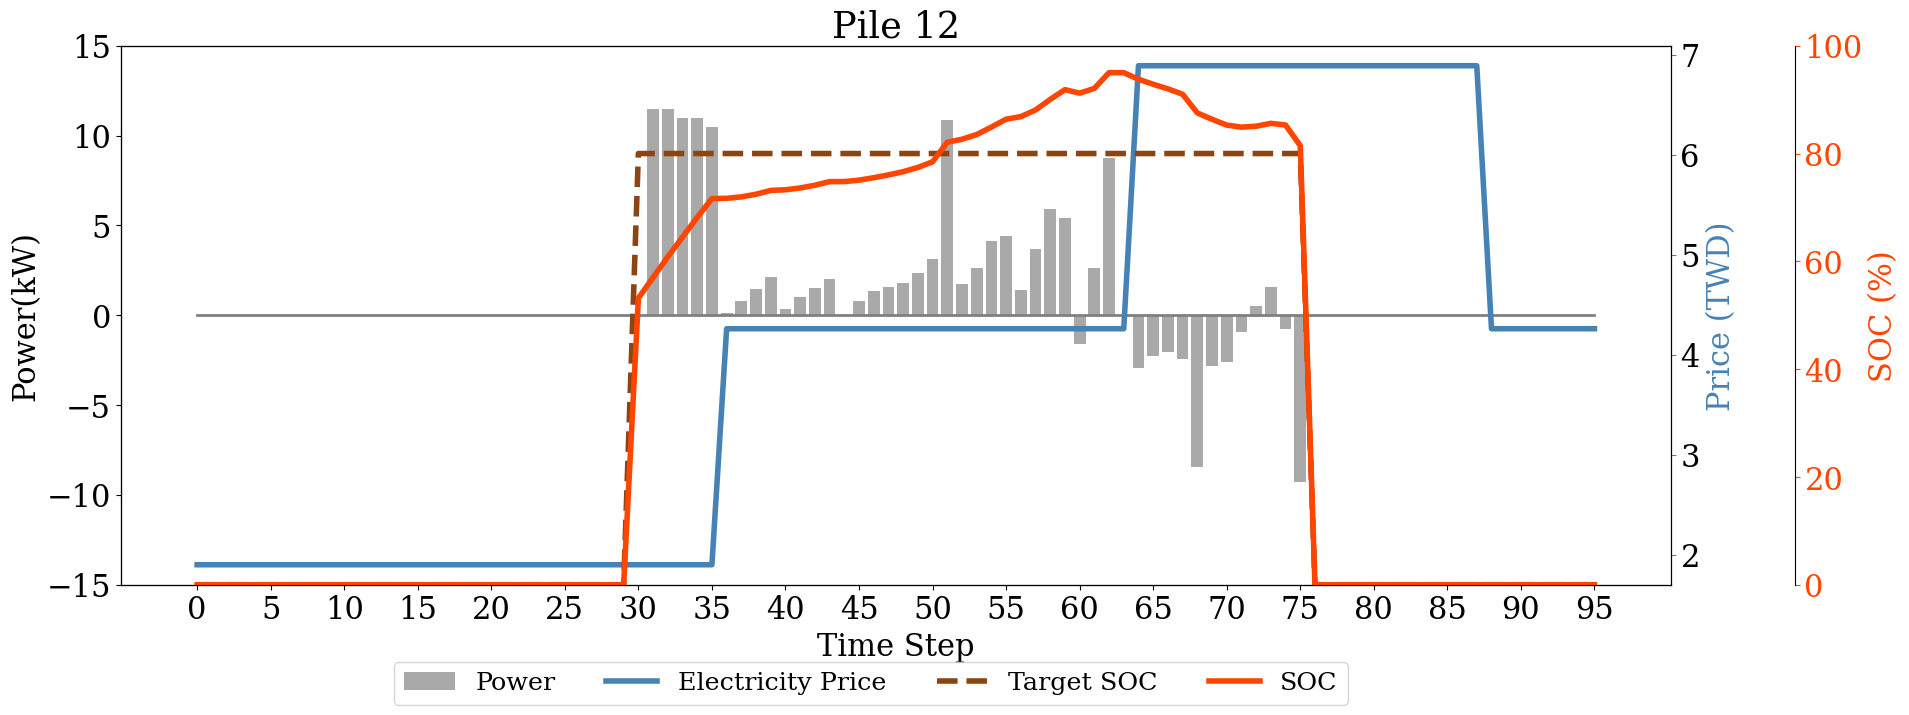

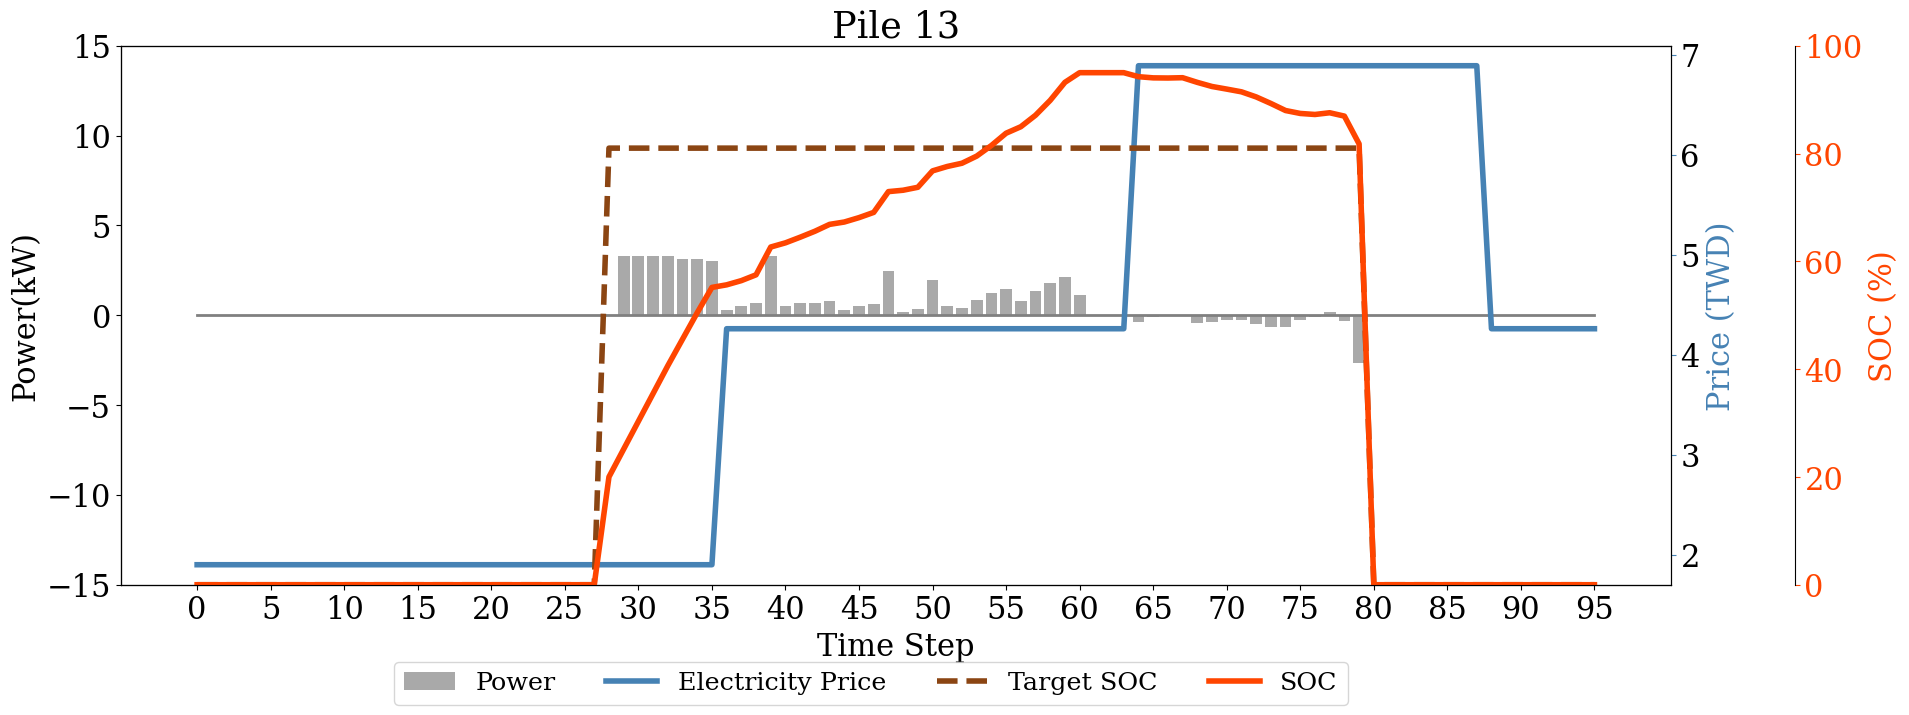

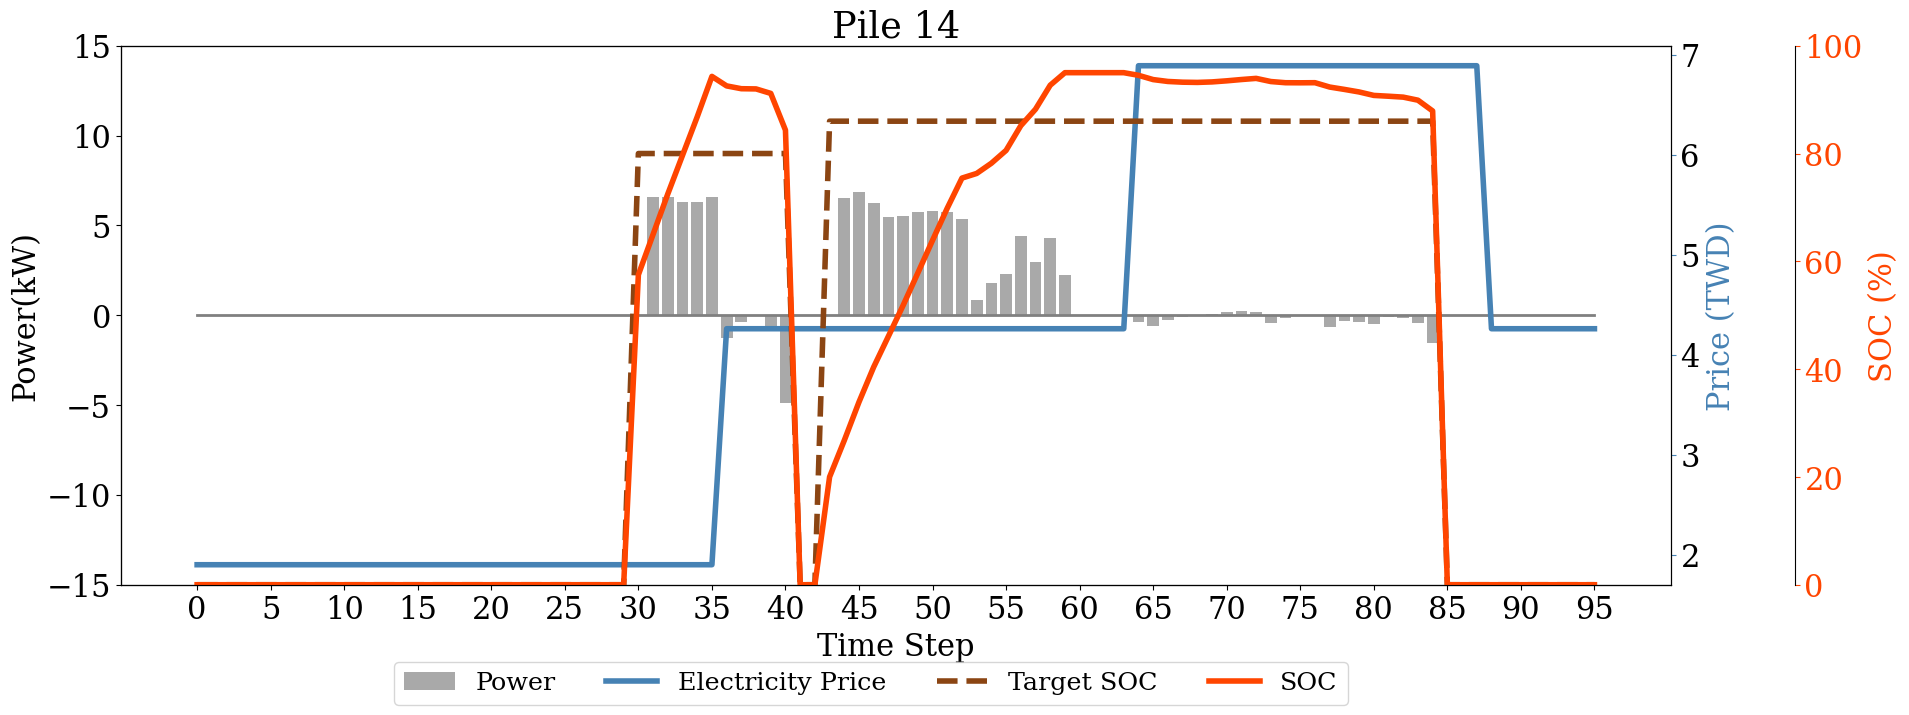

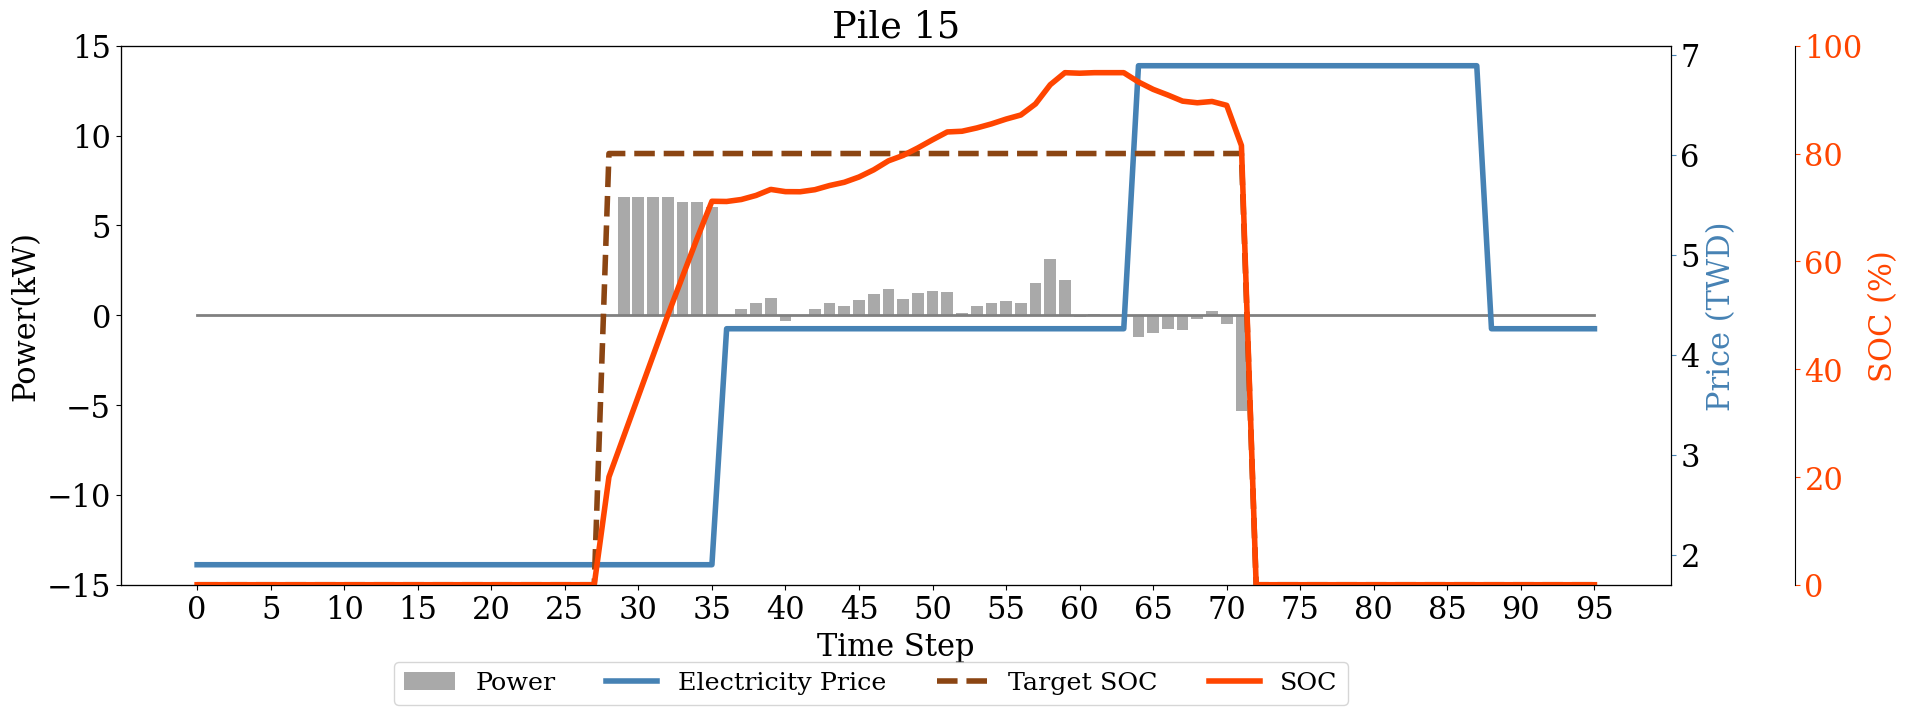

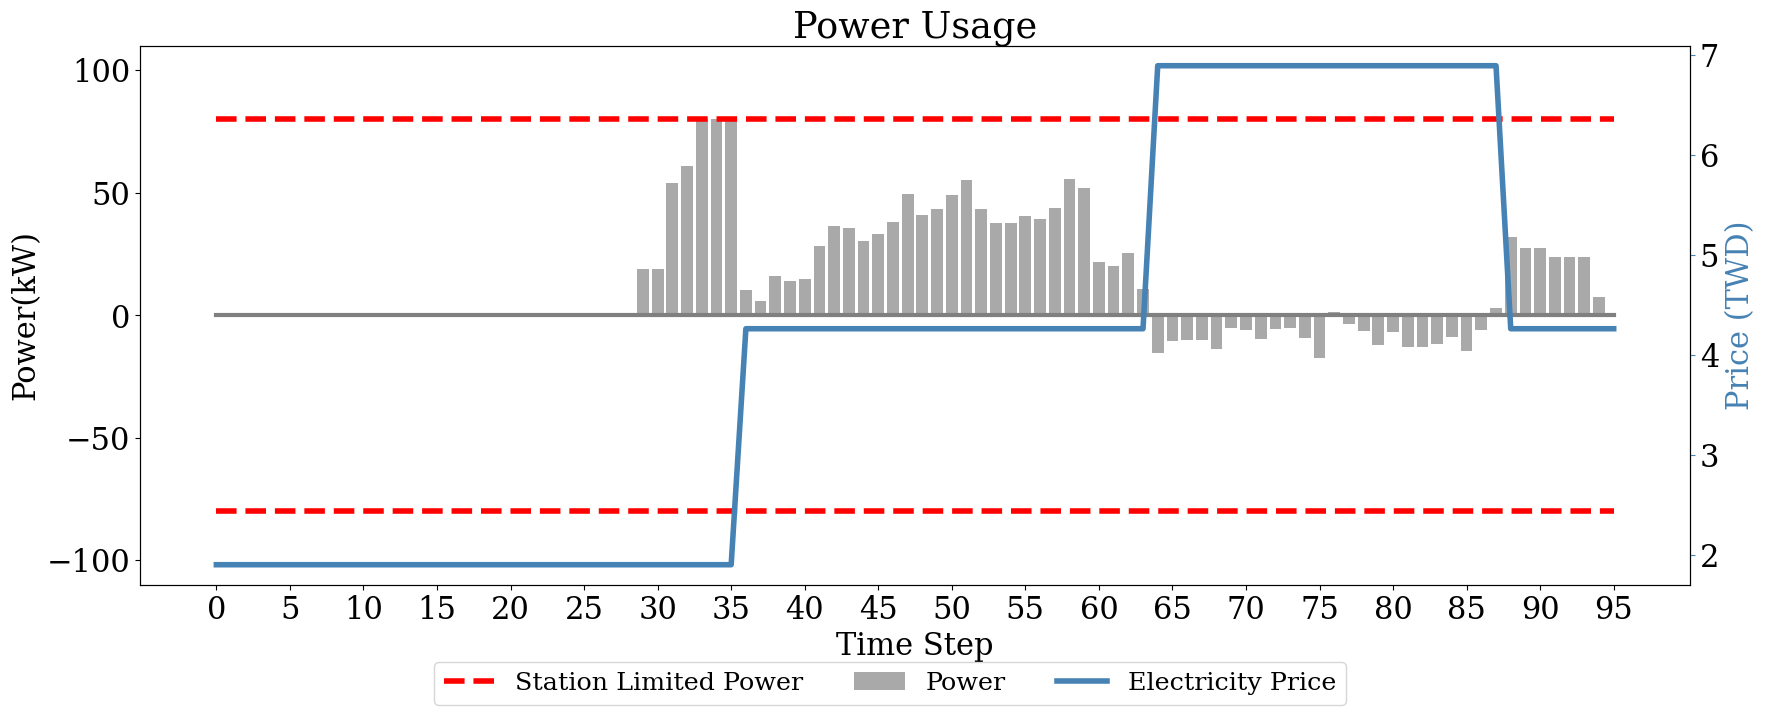

In [15]:
env = StationEnv(mode = "test", N_piles = num_of_pile)
env.seed(0)

env.reset(seed = 1, select_pile = np.random.choice(env.possible_agents))

time_step = env.T_cur
###
start_time = time.time()
###
for agent in env.agent_iter():
    obs, reward, termination, truncation, info = env.last()
    if termination or truncation:
        action = None
    else:
        # action, _ = model.predict(obs, deterministic=True)
        action = model.actor.forward(np.array([obs]))[0][0].cpu().detach().numpy()

    env.step(action)

###
end_time = time.time()
execution_time = end_time - start_time
print("程式執行時間：", execution_time, "秒")
###
print(env.total_cost)
# -------------------------------------------------------------
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
price_color = 'steelblue'
path_name   = "plot/summer/"

def plot_pile(car_id, data, save=False):
    title = "Pile "+car_id[5:]
    plot_time = np.array(range(96))
    plot_pile_price  = data["Price"]
    plot_pile_soc    = data["SOC"][car_id]
    plot_pile_soc_T  = data["SOC_T"][car_id]
    plot_pile_P_t    = data["P_action"][car_id]
    plot_pile_P_L    = data["P_lower"][car_id]
    plot_pile_P_U    = data["P_upper"][car_id]
    plot_pile_P_used = data["P_use"][car_id]

    if len(plot_pile_soc) < 96:
        plot_pile_soc   = np.concatenate( (  plot_pile_soc, np.zeros(96 - len(plot_pile_soc)) ) )

    if len(plot_pile_soc_T) < 96:
        plot_pile_soc_T = np.concatenate( (plot_pile_soc_T, np.zeros(96 - len(plot_pile_soc_T)) ) )

    if len(plot_pile_P_t) < 96:
        plot_pile_P_t   = np.concatenate( (  plot_pile_P_t, np.zeros(96 - len(plot_pile_P_t)) ) )

    if len(plot_pile_P_L) < 96:
        plot_pile_P_L   = np.concatenate( (  plot_pile_P_L, np.zeros(96 - len(plot_pile_P_L)) ) )

    if len(plot_pile_P_U) < 96:
        plot_pile_P_U   = np.concatenate( (  plot_pile_P_U, np.zeros(96 - len(plot_pile_P_U)) ) )
        
    if len(plot_pile_P_used) < 96:
        plot_pile_P_used = np.concatenate( (  plot_pile_P_used, np.zeros(96 - len(plot_pile_P_used)) ) )

    plt.rcParams["figure.figsize"] = (20, 7)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif']  = ['Times New Roman'] + plt.rcParams['font.serif']

    fig,axes = plt.subplots()
    plt.title(title)
    axes.set_xticks(plot_time[::5])
    axes.set_xlabel('Time Step')
    # power
    axes.set_ylabel('Power(kW)')
    axes.spines['right'].set_position(("axes",0))
    axes.set_ylim(-15,15)
    axes.plot( plot_time, np.zeros(96), color = 'gray', linewidth = 2 )
    axes.bar(plot_time, plot_pile_P_used*0.9, label = "Power", color = 'darkgray' )
    
    # price
    sub_price = axes.twinx()
    sub_price.set_ylim(min(plot_pile_price)-0.2,max(plot_pile_price)+0.2)
    sub_price.set_ylabel('Price (TWD)', color=price_color)
    sub_price.spines['left'].set_position(("axes",1))
    sub_price.tick_params(axis='y', color=price_color)
    sub_price.plot( plot_time, plot_pile_price, label = "Electricity Price", linewidth = 4, color=price_color)

    # soc
    sub_soc = axes.twinx()
    sub_soc.set_ylabel('SOC (%)',color='orangered')
    sub_soc.set_ylim(0,100)
    sub_soc.spines['right'].set_position(("axes",1.08))
    sub_soc.tick_params(axis='y',colors = 'orangered')
    sub_soc.plot( plot_time, np.array(plot_pile_soc_T)*100, label = "Target SOC", color = 'saddlebrown', linewidth = 4 , linestyle="--")
    sub_soc.plot( plot_time,   np.array(plot_pile_soc)*100, label = "SOC"       , color = 'orangered', linewidth = 4 )

    # set all legend    
    fig.legend(bbox_to_anchor=(0.5, -0.08), loc="lower center", fontsize='small', shadow=False, ncol=6)
    fig.show()

    #save img
    if save:
        desired_dpi = 300
        fig.savefig(path_name + title + '.svg', dpi=desired_dpi, bbox_inches='tight')

def plot_station(data, save=False):
    title = "Power Usage"
    plot_time = np.array(range(96))
    plot_pile_price = data["Price"]
    plot_P_total    = data["P_total"]
    plot_P_max_station = data["P_max_station"]
    
    if len(plot_P_total) < 96:
        plot_P_total = np.concatenate( (  plot_P_total, np.zeros(96 - len(plot_P_total)) ) )
    
    plt.rcParams["figure.figsize"] = (20, 7)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif']  = ['Times New Roman'] + plt.rcParams['font.serif']

    fig,axes = plt.subplots()
    plt.title(title)
    axes.set_xlabel('Time Step')
    axes.set_xticks(plot_time[::5])
    
    # power
    axes.set_ylabel('Power(kW)')
    axes.set_ylim(-(plot_P_max_station+30),plot_P_max_station+30)
    axes.bar(plot_time, plot_P_total, label = "Power", color = 'darkgray' )
    
    axes.plot( plot_time,   np.zeros(len(plot_time)) , color = 'gray' , linewidth = 3 )
    axes.plot( plot_time,   [plot_P_max_station]*len(plot_time), label = "Station Limited Power" , color = 'red' , linewidth = 4, linestyle="--")
    axes.plot( plot_time,  [-plot_P_max_station]*len(plot_time), color = 'red' , linewidth = 4, linestyle="--")
    
    # price
    sub_price = axes.twinx()
    sub_price.set_ylim(min(plot_pile_price)-0.2,max(plot_pile_price)+0.2)
    sub_price.set_ylabel('Price (TWD)', color=price_color)
    sub_price.spines['left'].set_position(("axes",0))
    sub_price.tick_params(axis='y', color=price_color)
    sub_price.plot( plot_time, plot_pile_price, label = "Electricity Price", linewidth = 4, color=price_color)
    
    fig.legend(bbox_to_anchor=(0.5, -0.08), loc="lower center", fontsize='small', shadow=False, ncol=6)
    fig.show()
    
    if save:
        desired_dpi = 300
        fig.savefig(path_name + title + '.svg', dpi=desired_dpi, bbox_inches='tight')

if plot_image:
    for agent in env.possible_agents:
        plot_pile(car_id = agent, data = env.plot_data, save = save_image)

    plot_station( data = env.plot_data, save = save_image)

# plot_pile(car_id = 'pile_3', data = env.plot_data, save = True)

set multi_env seed:0
程式執行時間： 0.19141650199890137 秒
699.6016182172532


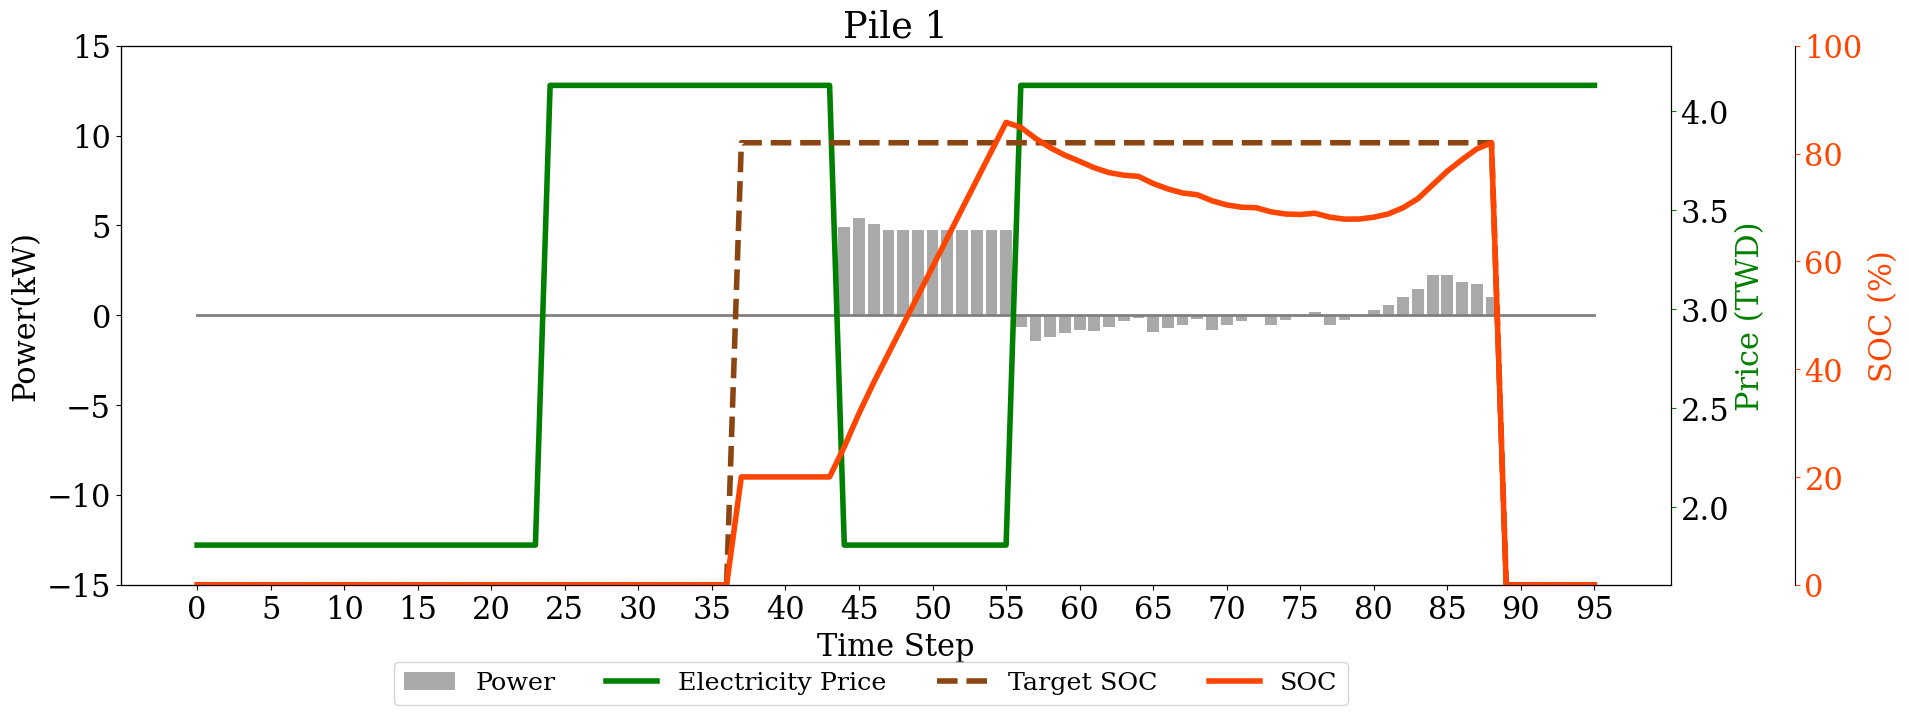

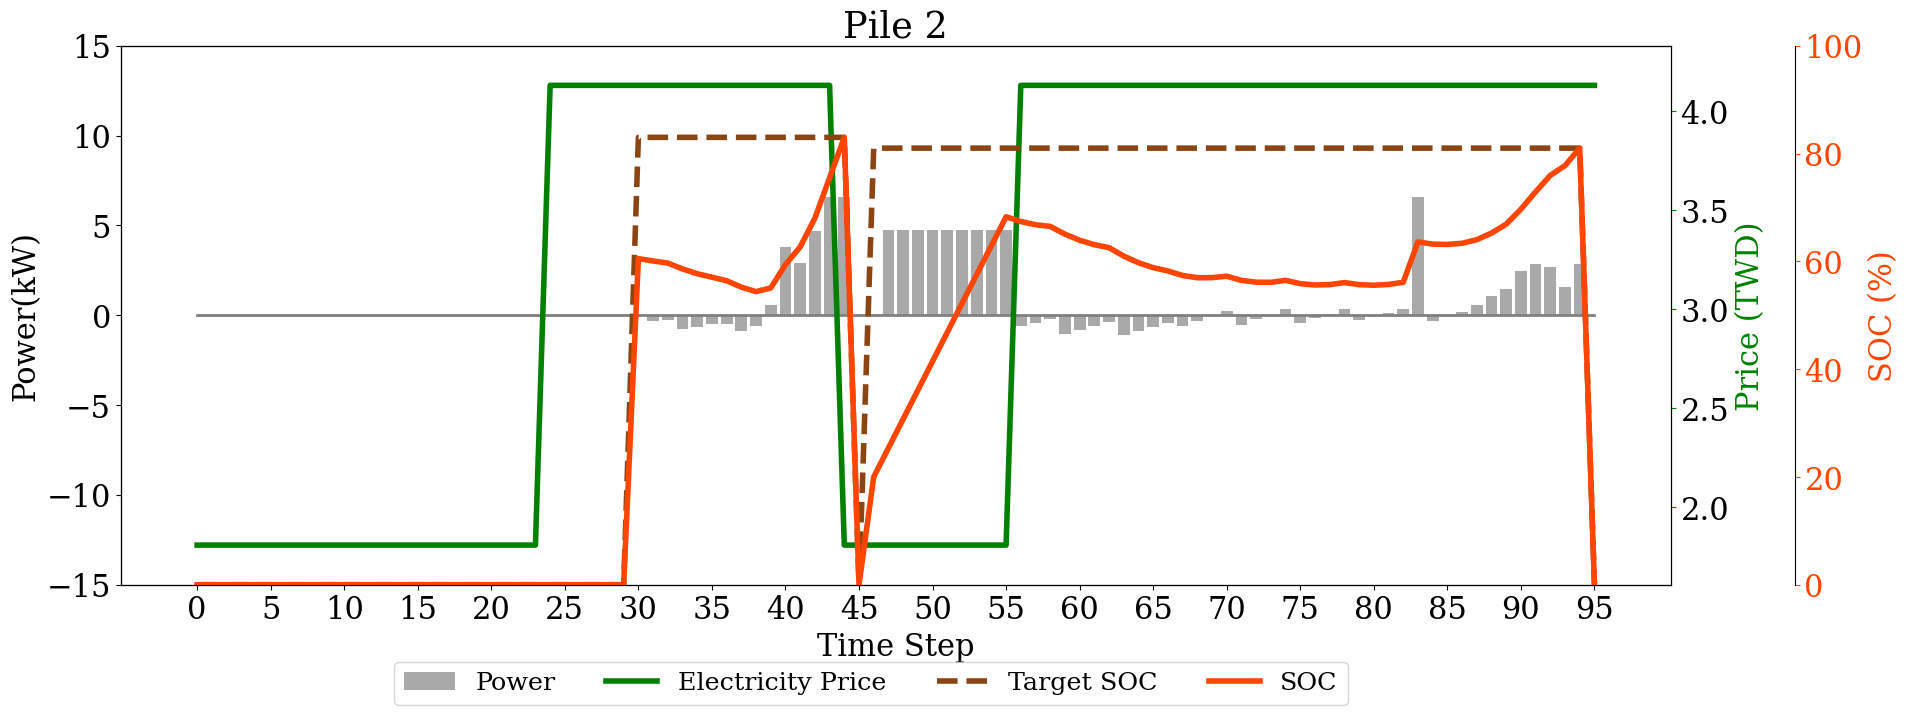

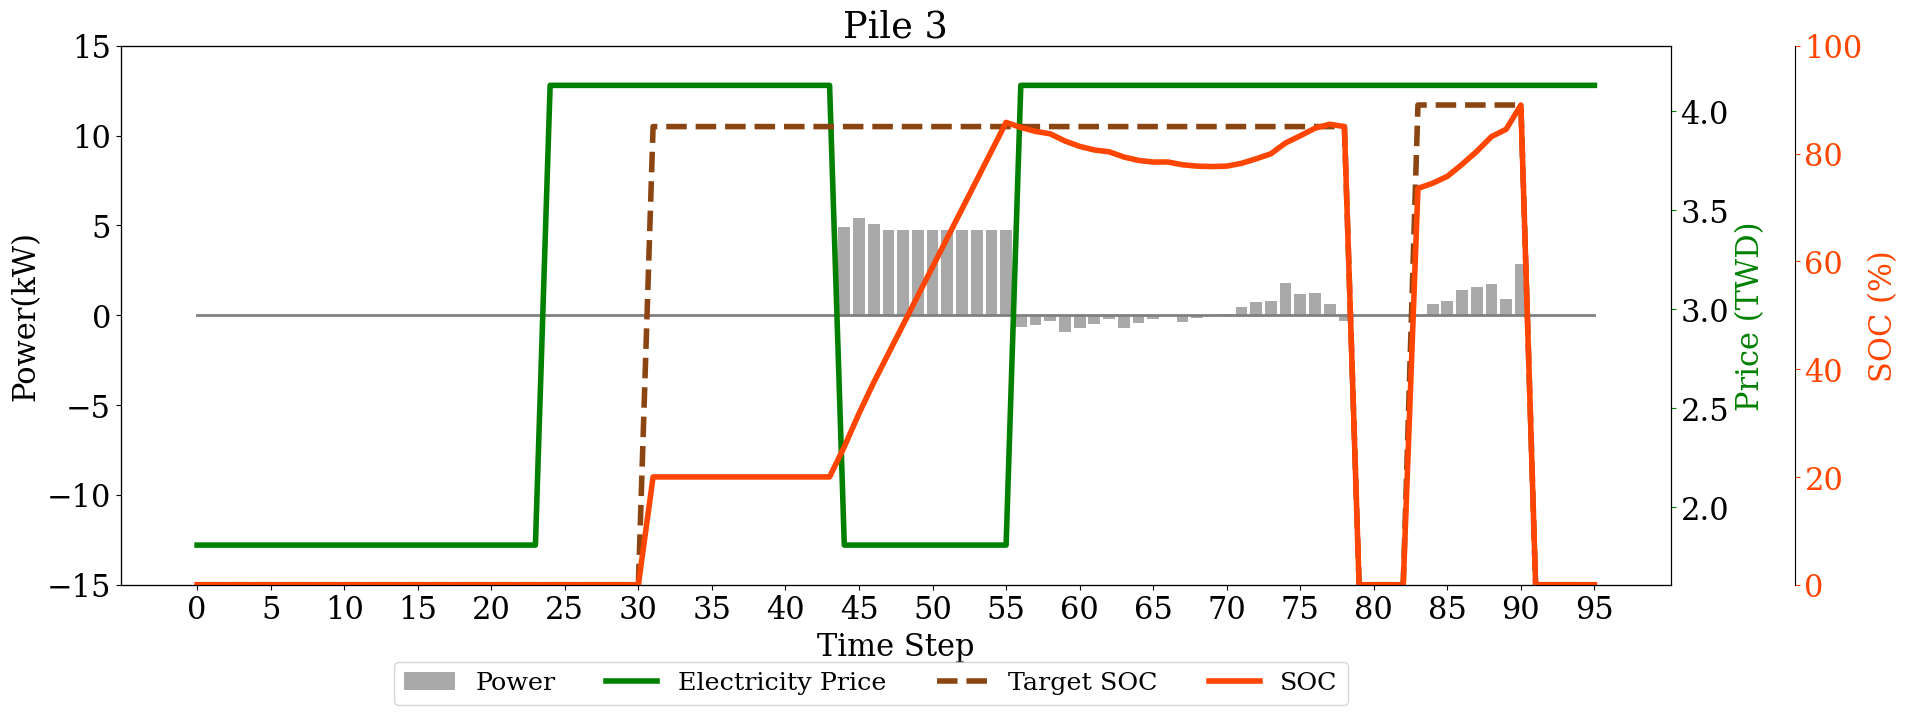

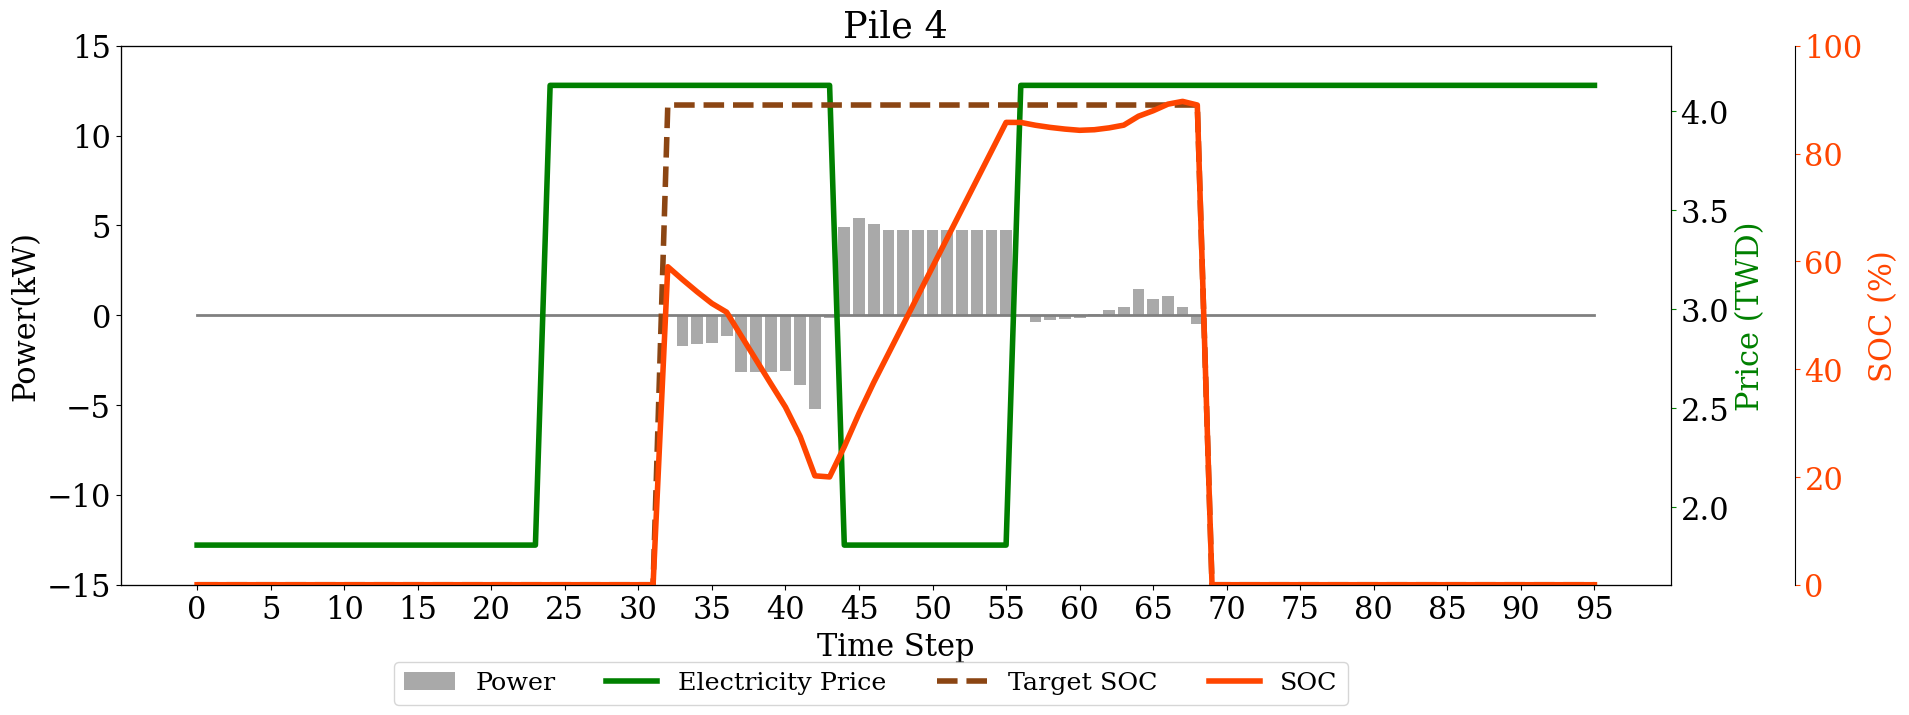

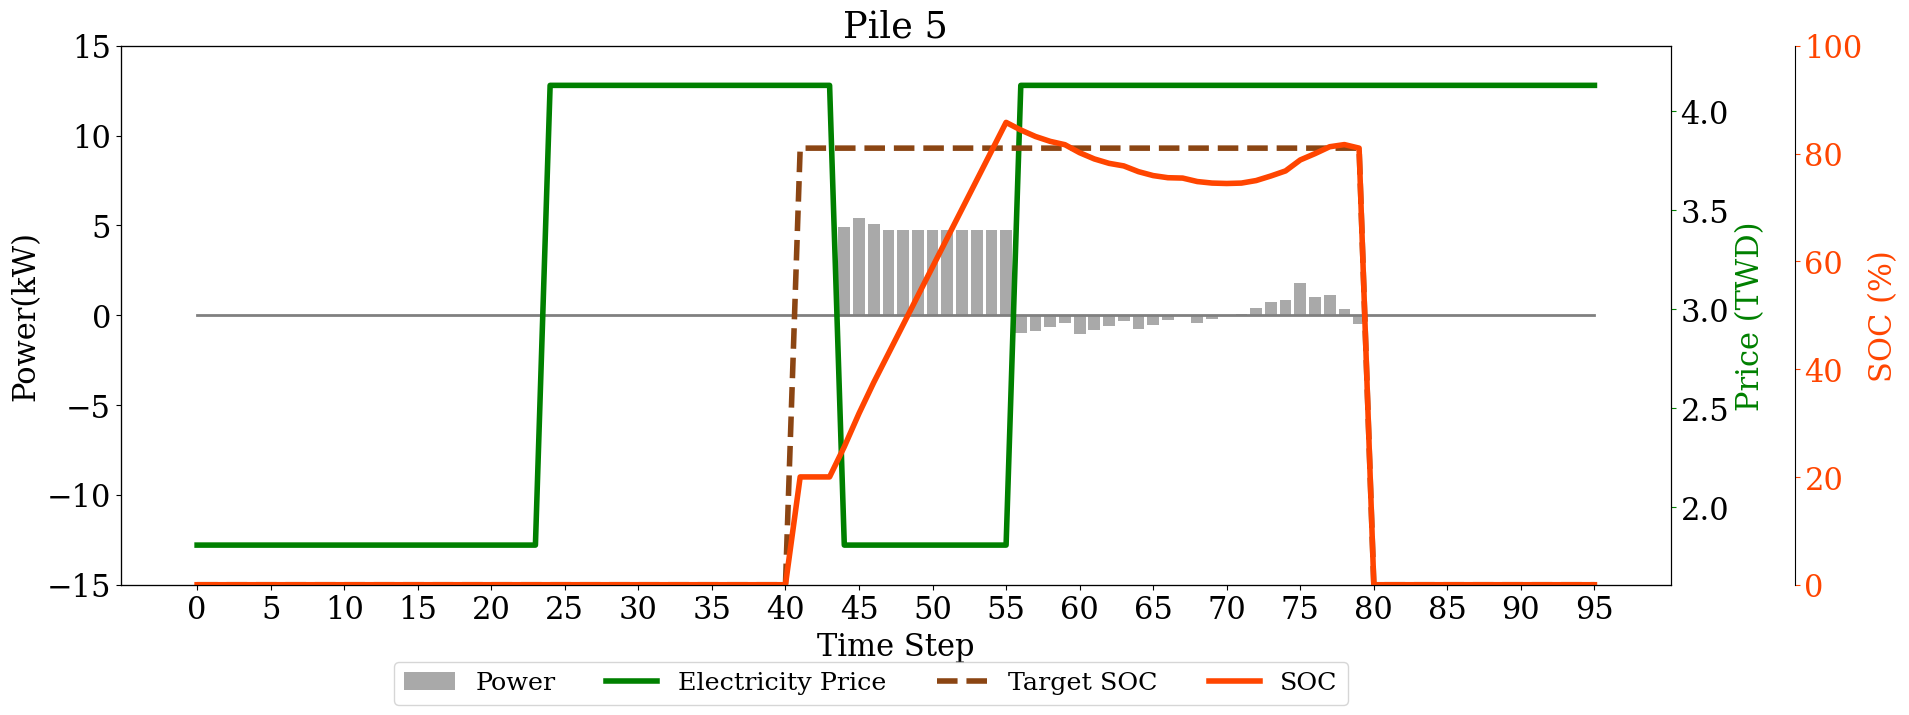

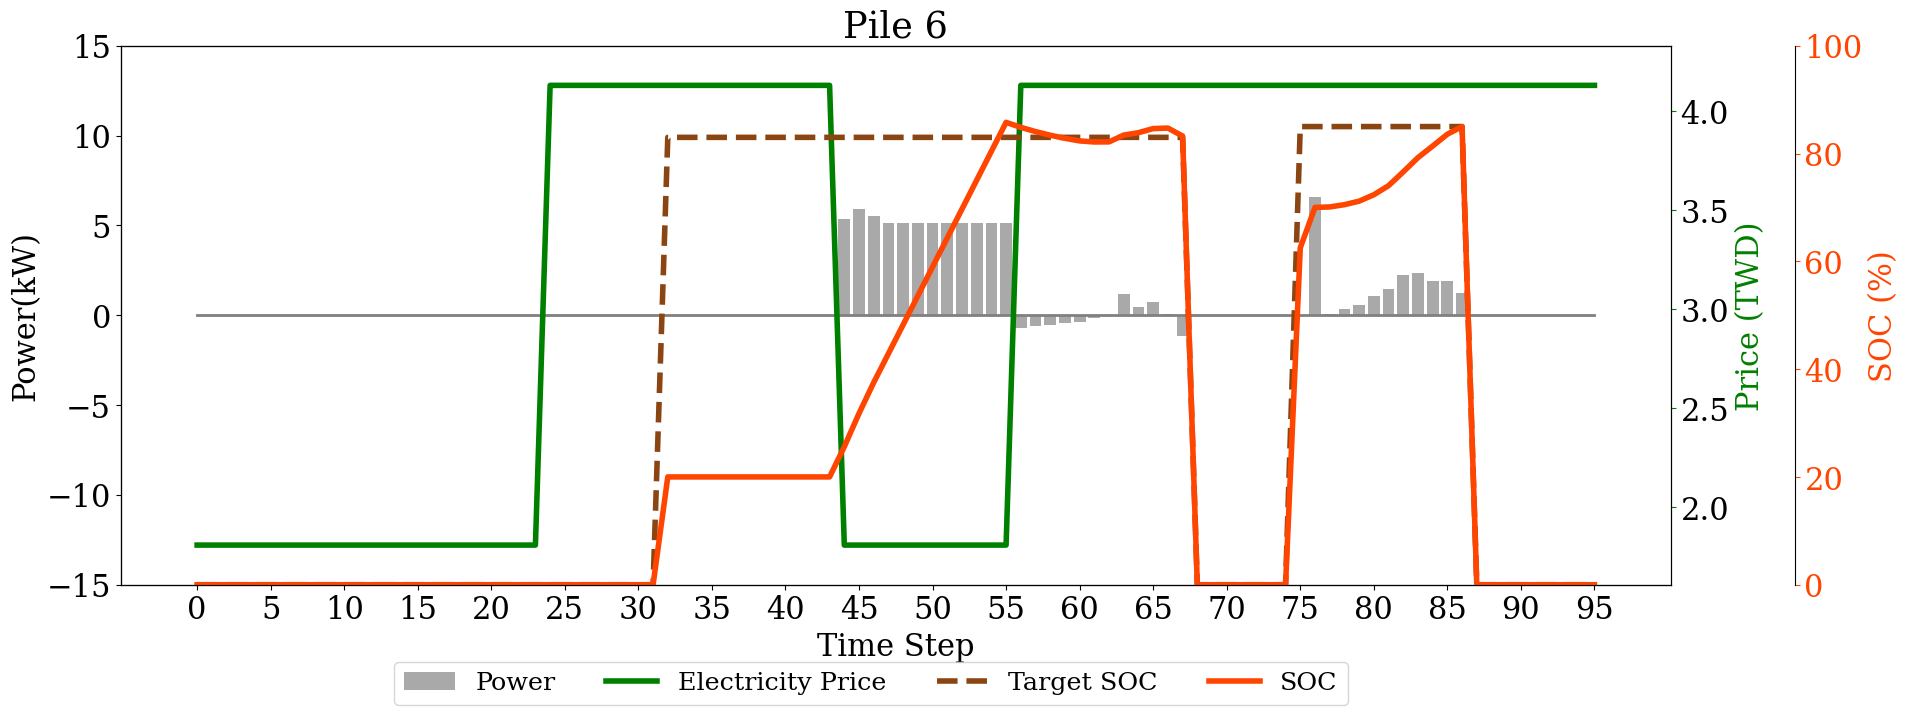

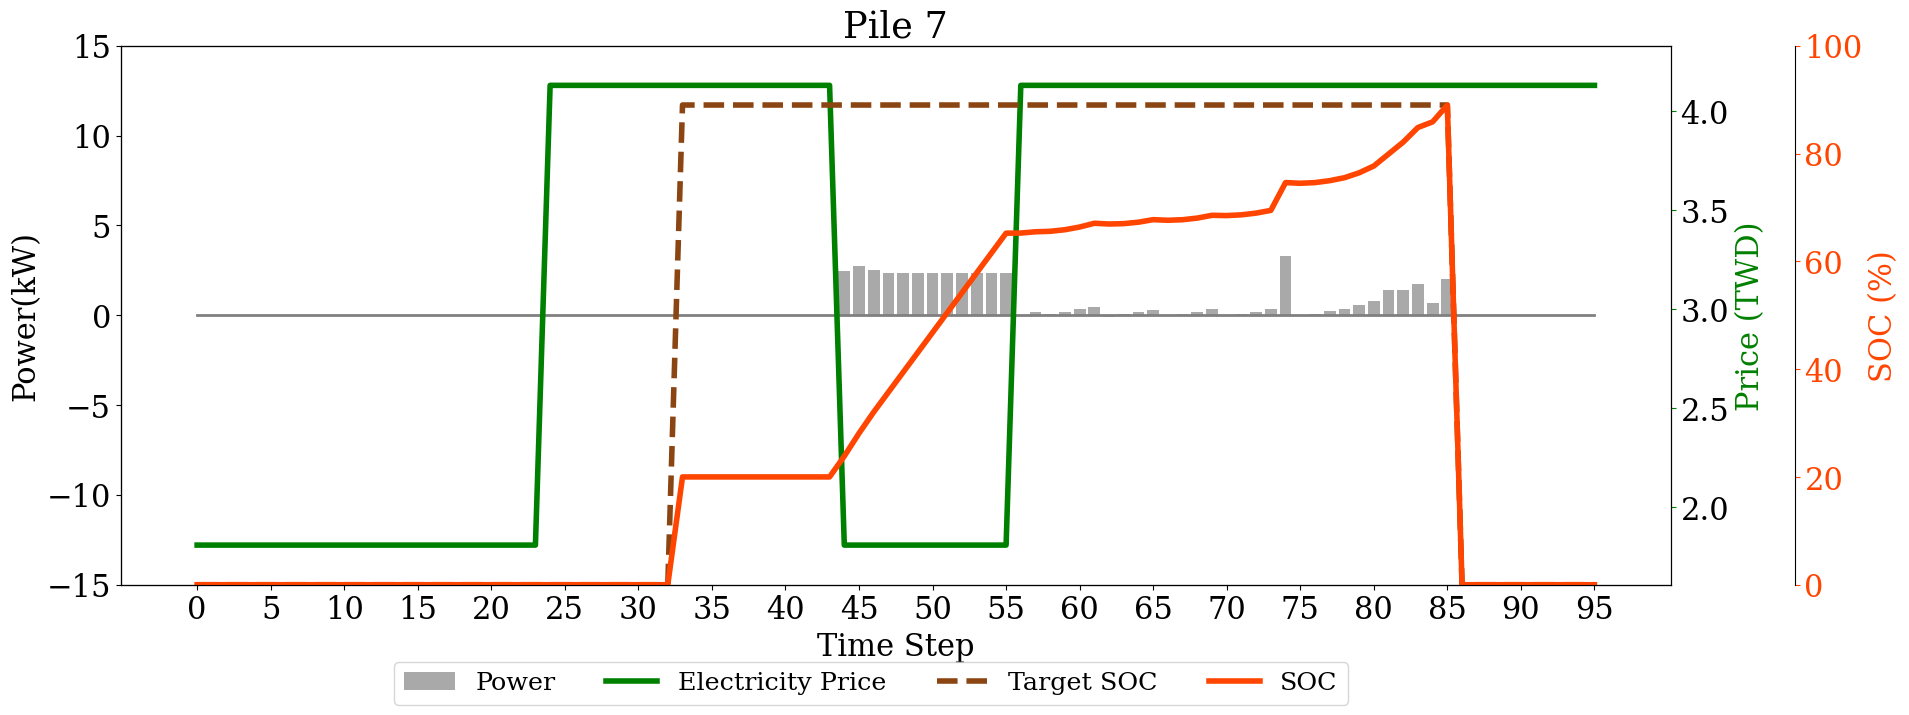

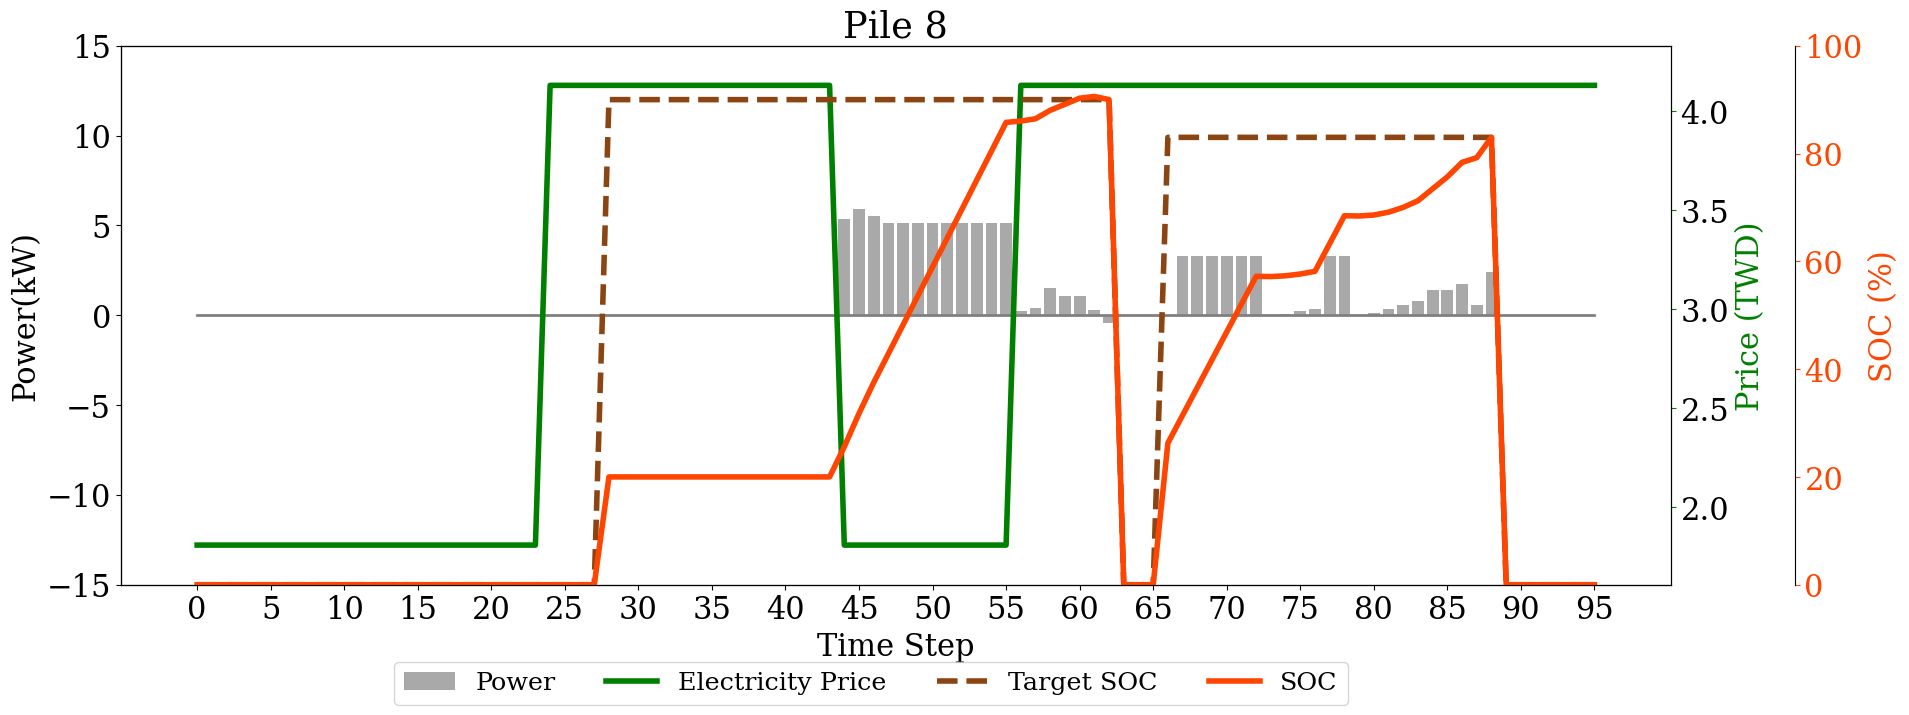

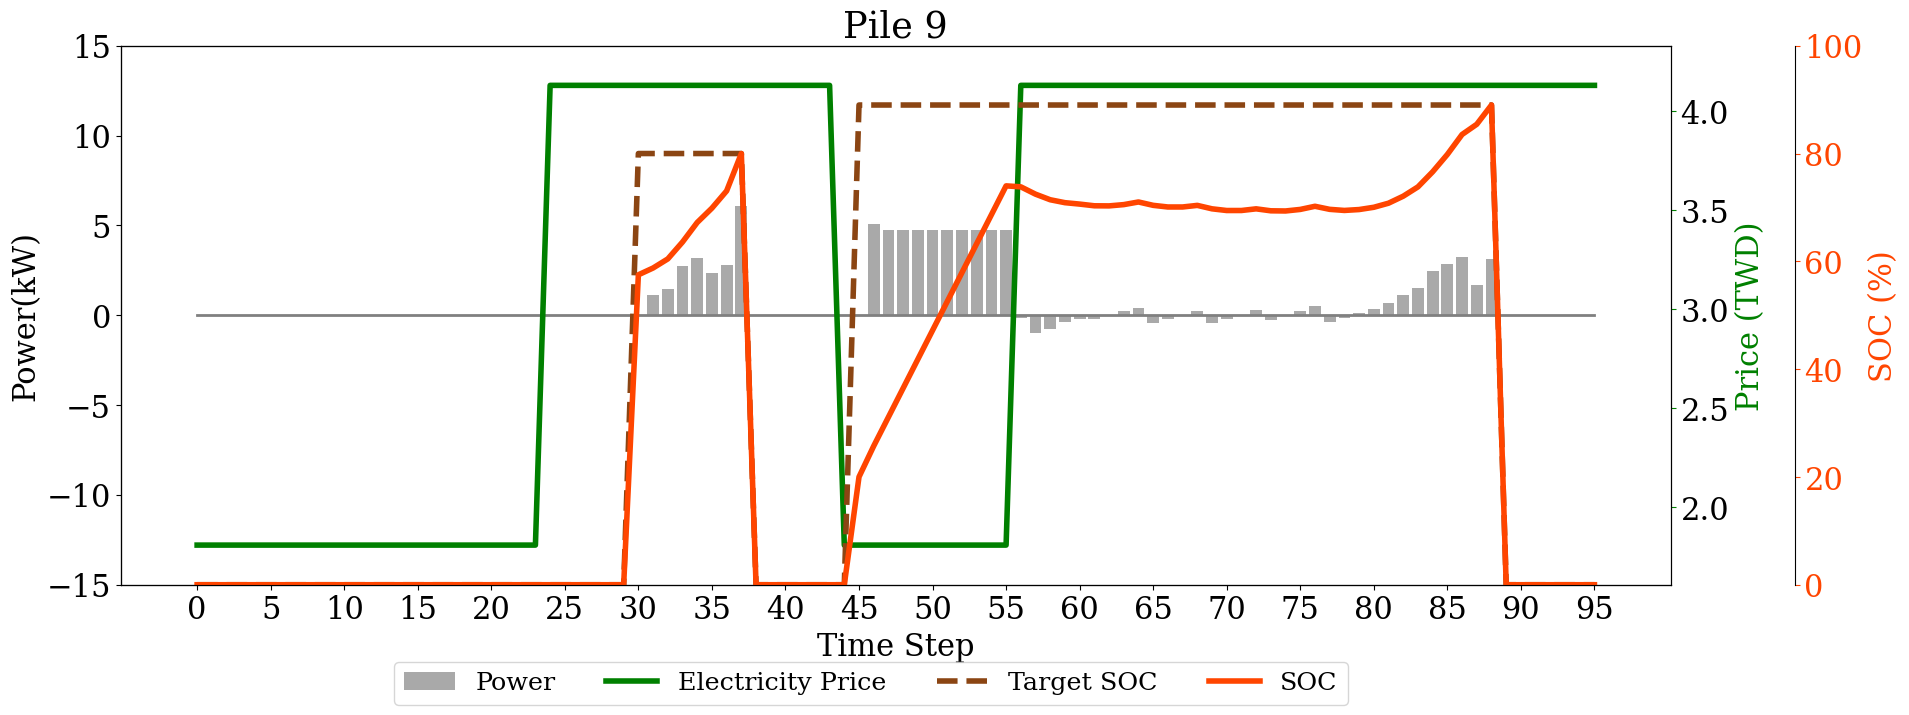

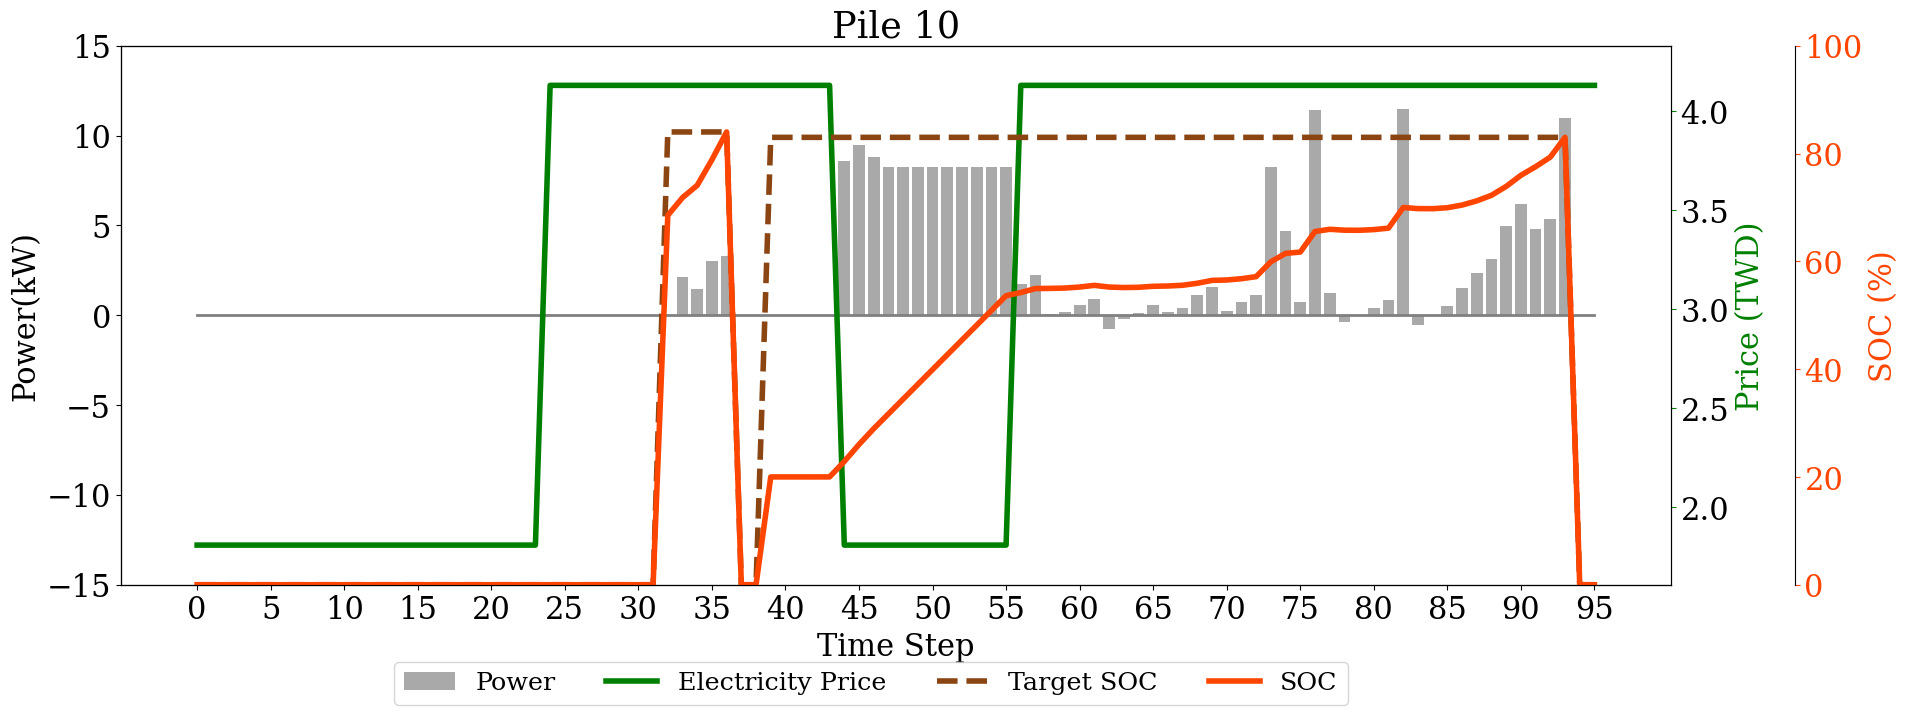

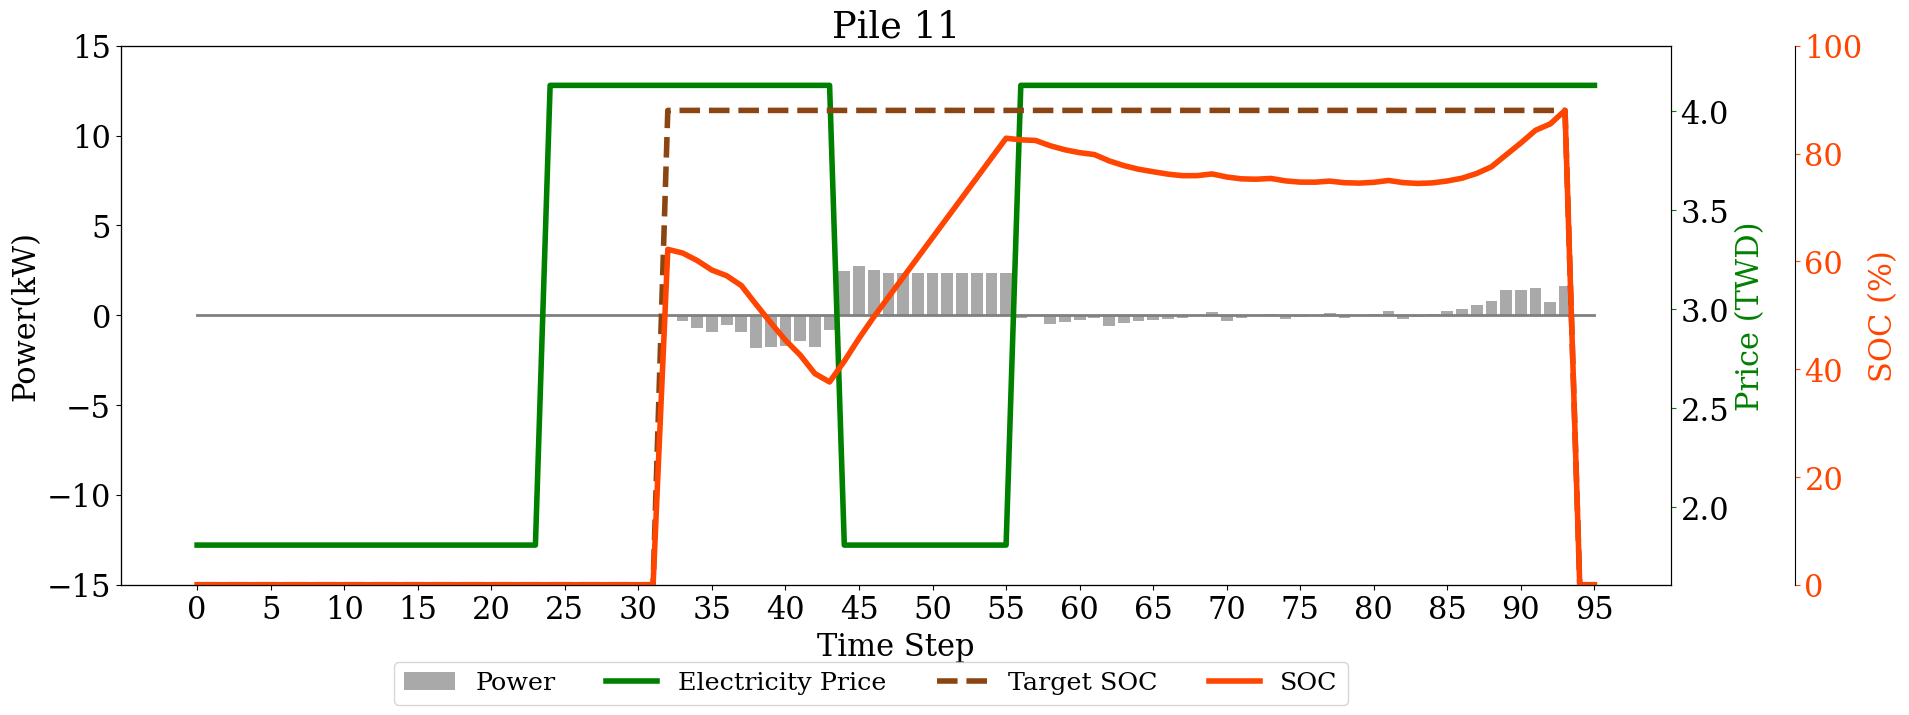

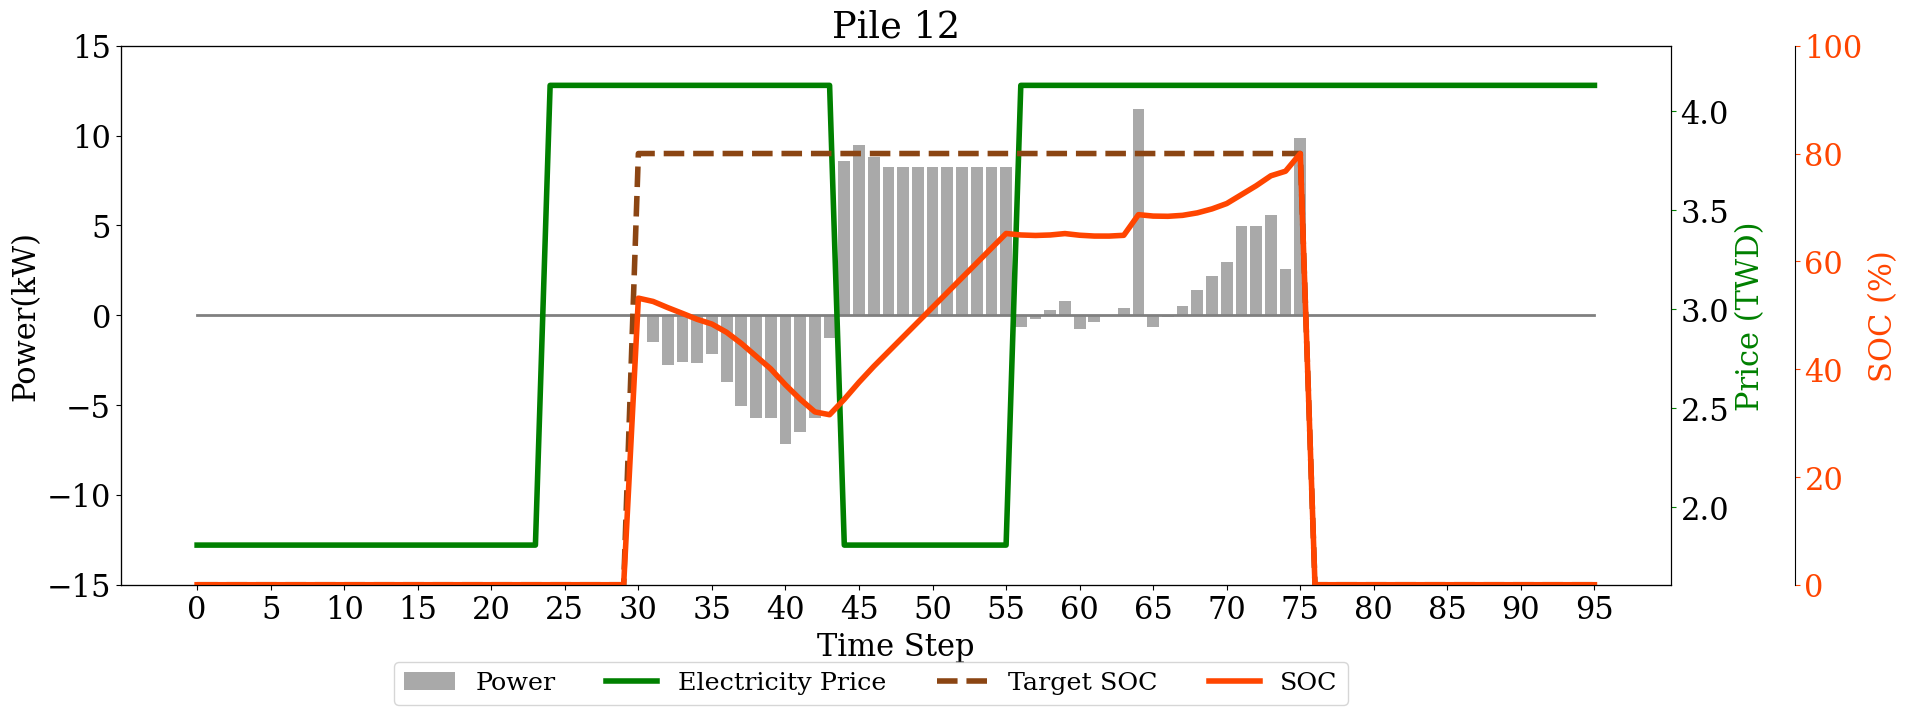

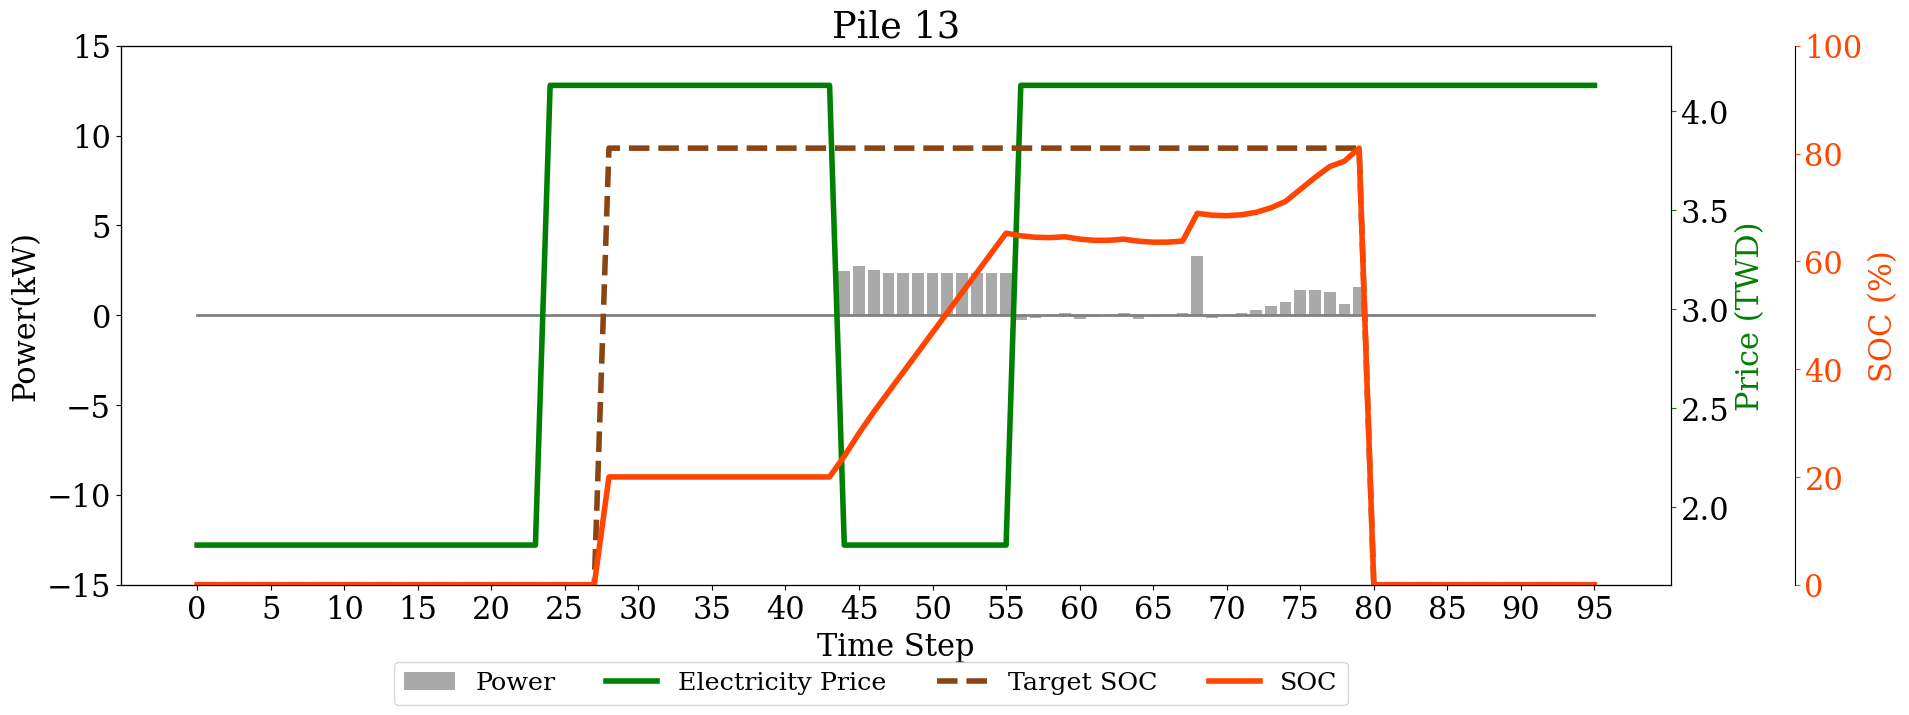

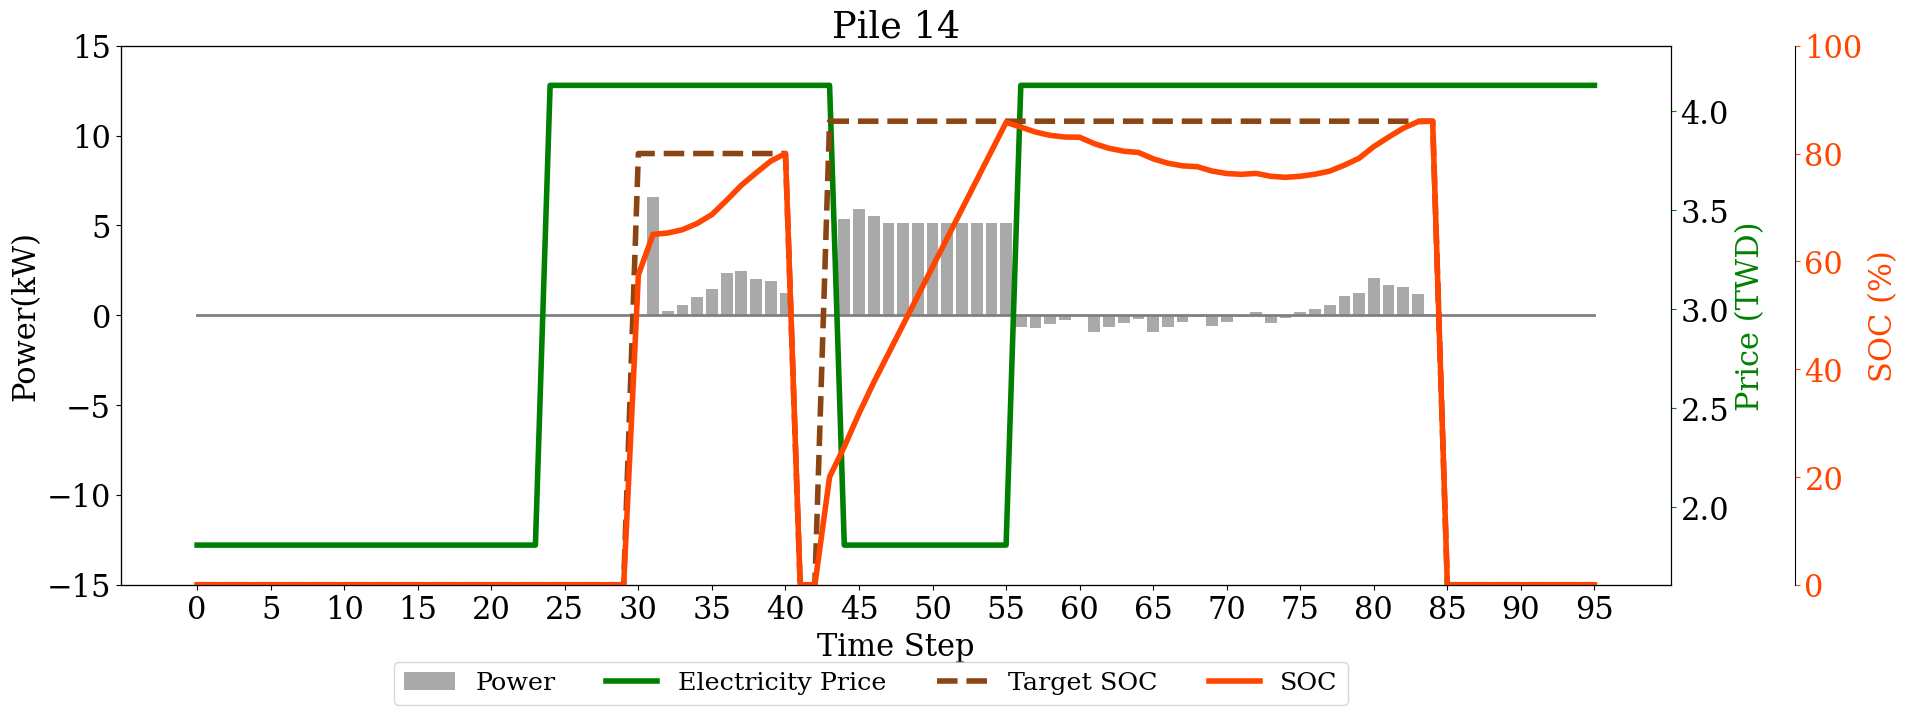

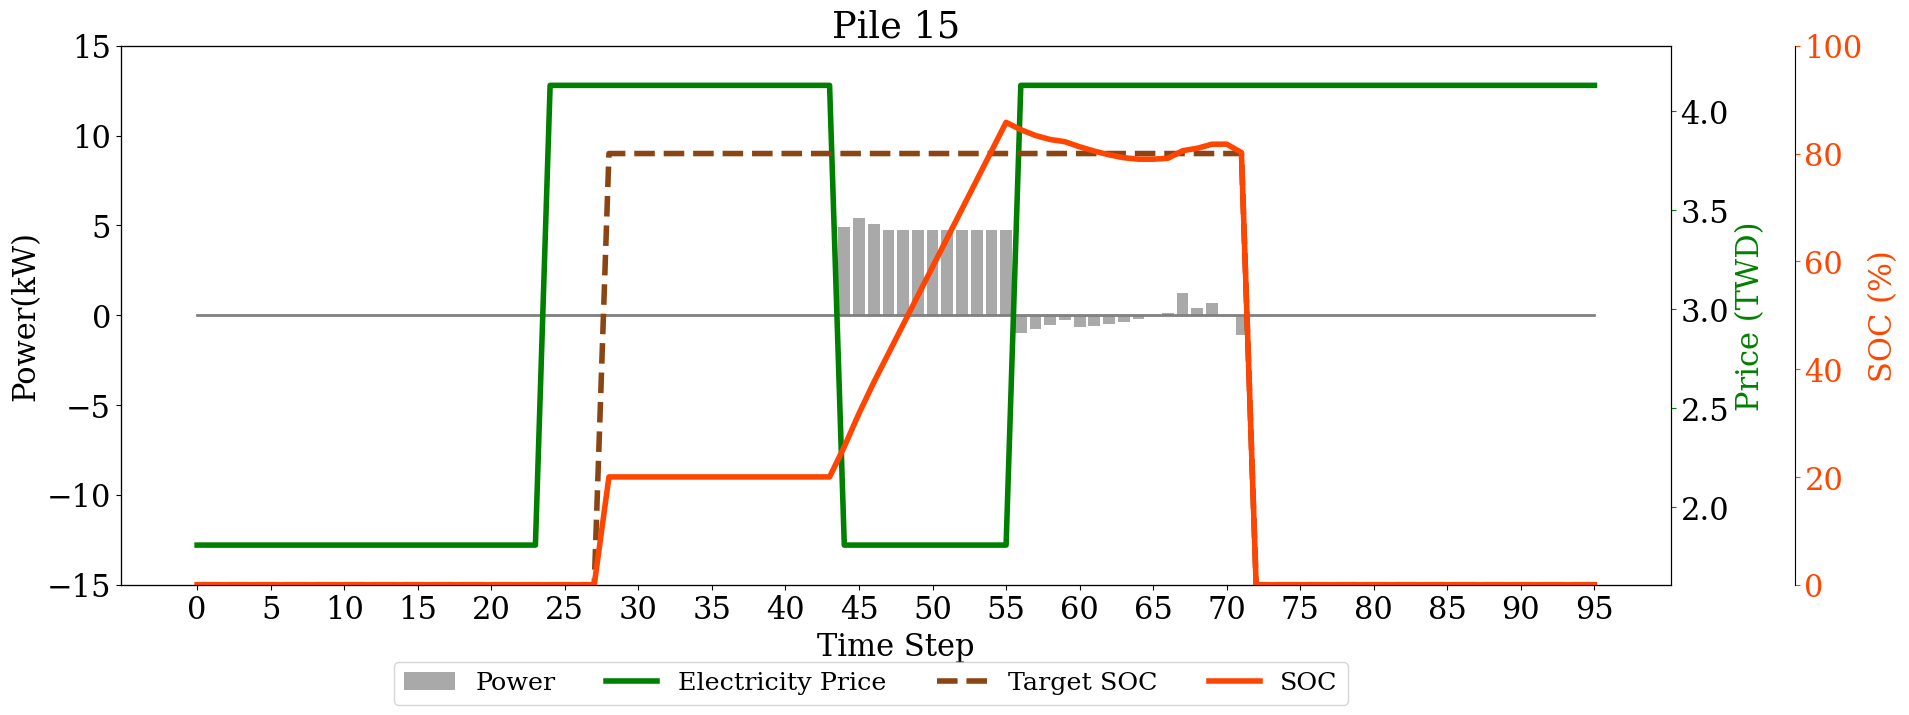

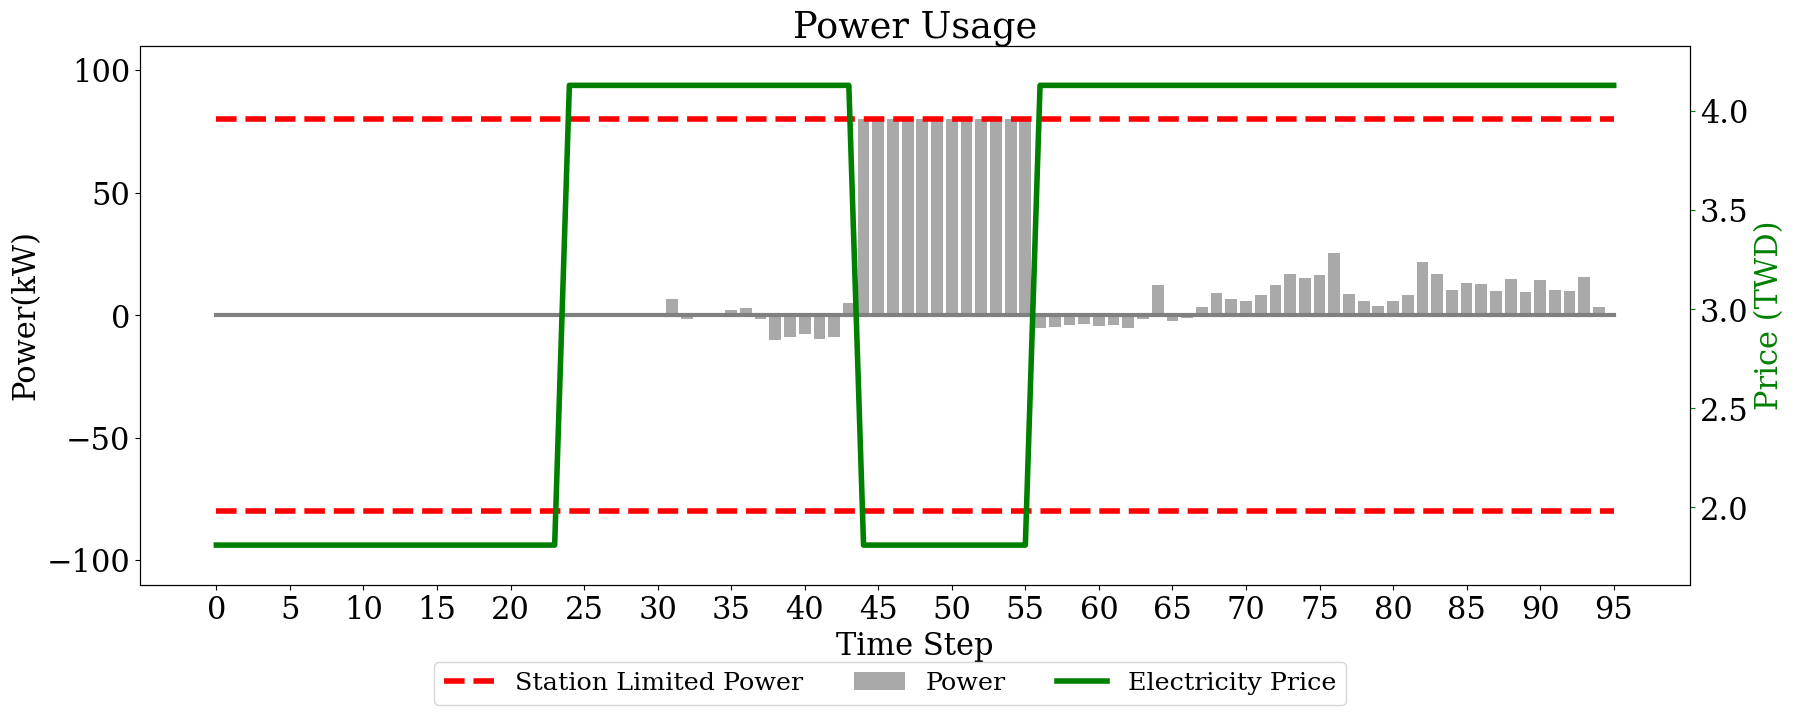

In [16]:
env = StationEnv(mode = "test", N_piles = num_of_pile)
env.seed(0)

random_price = [1.81]*24+[4.13]*20+[1.81]*12+[4.13]*40

env.reset(seed = 1, select_pile = np.random.choice(env.possible_agents), price_data = random_price)

time_step = env.T_cur
###
start_time = time.time()
###
for agent in env.agent_iter():
    obs, reward, termination, truncation, info = env.last()
    if termination or truncation:
        action = None
    else:
        # action, _ = model.predict(obs, deterministic=True)
        action = model.actor.forward(np.array([obs]))[0][0].cpu().detach().numpy()

    env.step(action)

###
end_time = time.time()
execution_time = end_time - start_time
print("程式執行時間：", execution_time, "秒")
###
print(env.total_cost)
# -------------------------------------------------------------
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
price_color = 'green'
path_name   = "plot/not_summer/"

def plot_pile(car_id, data, save=False):
    title = "Pile "+car_id[5:]
    plot_time = np.array(range(96))
    plot_pile_price  = data["Price"]
    plot_pile_soc    = data["SOC"][car_id]
    plot_pile_soc_T  = data["SOC_T"][car_id]
    plot_pile_P_t    = data["P_action"][car_id]
    plot_pile_P_L    = data["P_lower"][car_id]
    plot_pile_P_U    = data["P_upper"][car_id]
    plot_pile_P_used = data["P_use"][car_id]

    if len(plot_pile_soc) < 96:
        plot_pile_soc   = np.concatenate( (  plot_pile_soc, np.zeros(96 - len(plot_pile_soc)) ) )

    if len(plot_pile_soc_T) < 96:
        plot_pile_soc_T = np.concatenate( (plot_pile_soc_T, np.zeros(96 - len(plot_pile_soc_T)) ) )

    if len(plot_pile_P_t) < 96:
        plot_pile_P_t   = np.concatenate( (  plot_pile_P_t, np.zeros(96 - len(plot_pile_P_t)) ) )

    if len(plot_pile_P_L) < 96:
        plot_pile_P_L   = np.concatenate( (  plot_pile_P_L, np.zeros(96 - len(plot_pile_P_L)) ) )

    if len(plot_pile_P_U) < 96:
        plot_pile_P_U   = np.concatenate( (  plot_pile_P_U, np.zeros(96 - len(plot_pile_P_U)) ) )
        
    if len(plot_pile_P_used) < 96:
        plot_pile_P_used = np.concatenate( (  plot_pile_P_used, np.zeros(96 - len(plot_pile_P_used)) ) )

    plt.rcParams["figure.figsize"] = (20, 7)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif']  = ['Times New Roman'] + plt.rcParams['font.serif']

    fig,axes = plt.subplots()
    plt.title(title)
    axes.set_xticks(plot_time[::5])
    axes.set_xlabel('Time Step')
    # power
    axes.set_ylabel('Power(kW)')
    axes.spines['right'].set_position(("axes",0))
    axes.set_ylim(-15,15)
    axes.plot( plot_time, np.zeros(96), color = 'gray', linewidth = 2 )
    axes.bar(plot_time, plot_pile_P_used*0.9, label = "Power", color = 'darkgray' )
    
    # price
    sub_price = axes.twinx()
    sub_price.set_ylim(min(plot_pile_price)-0.2,max(plot_pile_price)+0.2)
    sub_price.set_ylabel('Price (TWD)', color=price_color)
    sub_price.spines['left'].set_position(("axes",1))
    sub_price.tick_params(axis='y', color=price_color)
    sub_price.plot( plot_time, plot_pile_price, label = "Electricity Price", linewidth = 4, color=price_color)

    # soc
    sub_soc = axes.twinx()
    sub_soc.set_ylabel('SOC (%)',color='orangered')
    sub_soc.set_ylim(0,100)
    sub_soc.spines['right'].set_position(("axes",1.08))
    sub_soc.tick_params(axis='y',colors = 'orangered')
    sub_soc.plot( plot_time, np.array(plot_pile_soc_T)*100, label = "Target SOC", color = 'saddlebrown', linewidth = 4 , linestyle="--")
    sub_soc.plot( plot_time,   np.array(plot_pile_soc)*100, label = "SOC"       , color = 'orangered', linewidth = 4 )

    # set all legend    
    fig.legend(bbox_to_anchor=(0.5, -0.08), loc="lower center", fontsize='small', shadow=False, ncol=6)
    fig.show()

    #save img
    if save:
        desired_dpi = 300
        fig.savefig(path_name + title + '.svg', dpi=desired_dpi, bbox_inches='tight')

def plot_station(data, save=False):
    title = "Power Usage"
    plot_time = np.array(range(96))
    plot_pile_price = data["Price"]
    plot_P_total    = data["P_total"]
    plot_P_max_station = data["P_max_station"]
    
    if len(plot_P_total) < 96:
        plot_P_total = np.concatenate( (  plot_P_total, np.zeros(96 - len(plot_P_total)) ) )
    
    plt.rcParams["figure.figsize"] = (20, 7)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif']  = ['Times New Roman'] + plt.rcParams['font.serif']

    fig,axes = plt.subplots()
    plt.title(title)
    axes.set_xlabel('Time Step')
    axes.set_xticks(plot_time[::5])
    
    # power
    axes.set_ylabel('Power(kW)')
    axes.set_ylim(-(plot_P_max_station+30),plot_P_max_station+30)
    axes.bar(plot_time, plot_P_total, label = "Power", color = 'darkgray' )
    
    axes.plot( plot_time,   np.zeros(len(plot_time)) , color = 'gray' , linewidth = 3 )
    axes.plot( plot_time,   [plot_P_max_station]*len(plot_time), label = "Station Limited Power" , color = 'red' , linewidth = 4, linestyle="--")
    axes.plot( plot_time,  [-plot_P_max_station]*len(plot_time), color = 'red' , linewidth = 4, linestyle="--")
    
    # price
    sub_price = axes.twinx()
    sub_price.set_ylim(min(plot_pile_price)-0.2,max(plot_pile_price)+0.2)
    sub_price.set_ylabel('Price (TWD)', color=price_color)
    sub_price.spines['left'].set_position(("axes",0))
    sub_price.tick_params(axis='y', color=price_color)
    sub_price.plot( plot_time, plot_pile_price, label = "Electricity Price", linewidth = 4, color=price_color)
    
    fig.legend(bbox_to_anchor=(0.5, -0.08), loc="lower center", fontsize='small', shadow=False, ncol=6)
    fig.show()
    
    if save:
        desired_dpi = 300
        fig.savefig(path_name + title + '.svg', dpi=desired_dpi, bbox_inches='tight')

if plot_image:
    for agent in env.possible_agents:
        plot_pile(car_id = agent, data = env.plot_data, save = save_image)

    plot_station( data = env.plot_data, save = save_image)

set multi_env seed:0
程式執行時間： 0.18628573417663574 秒
456.83950470051906


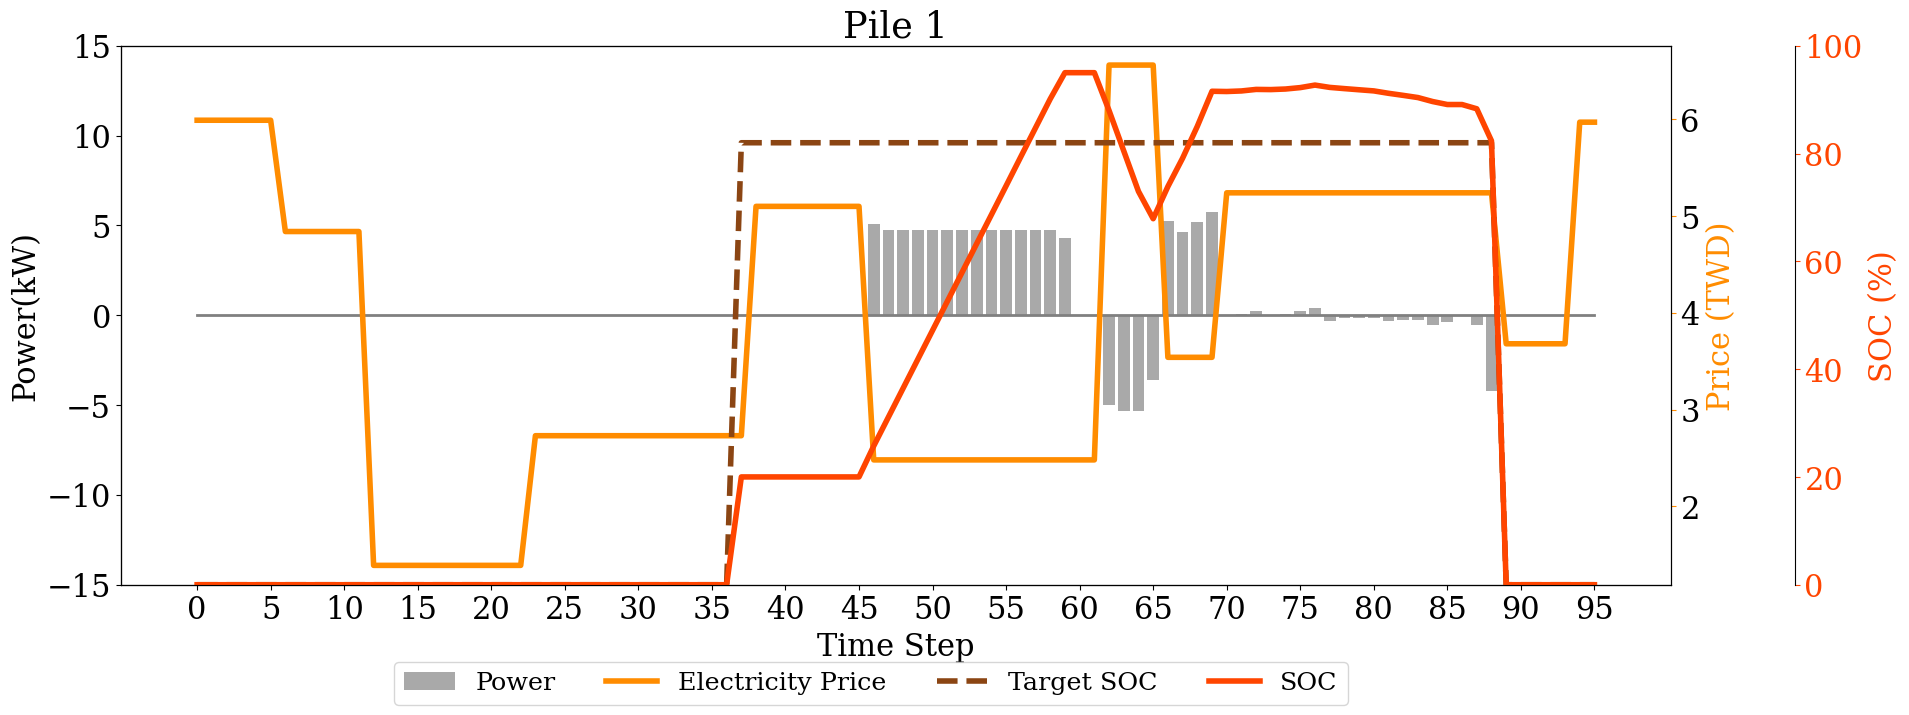

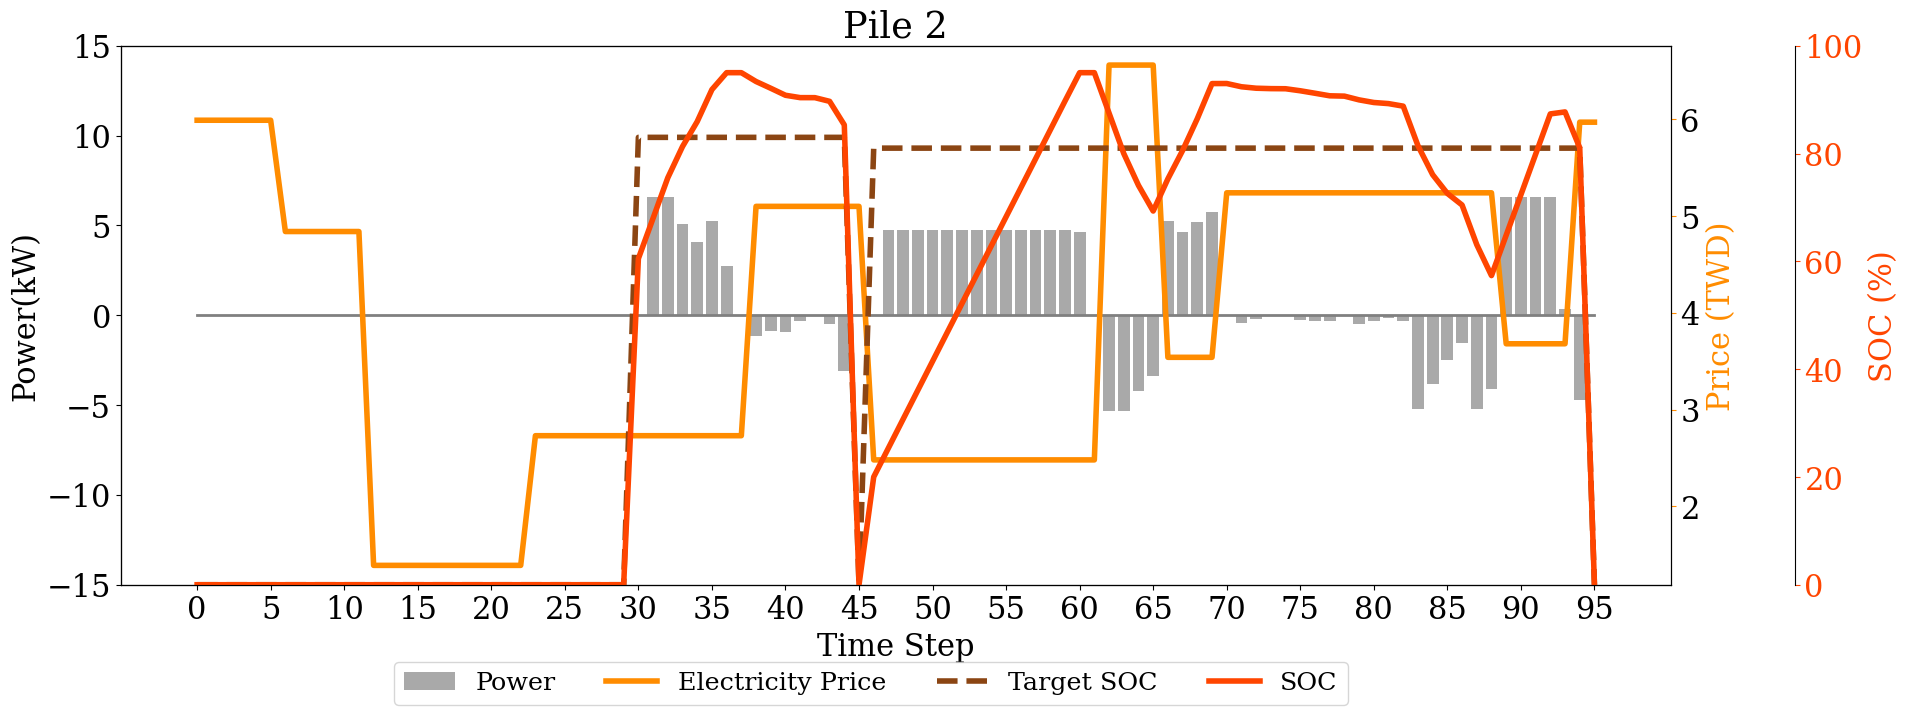

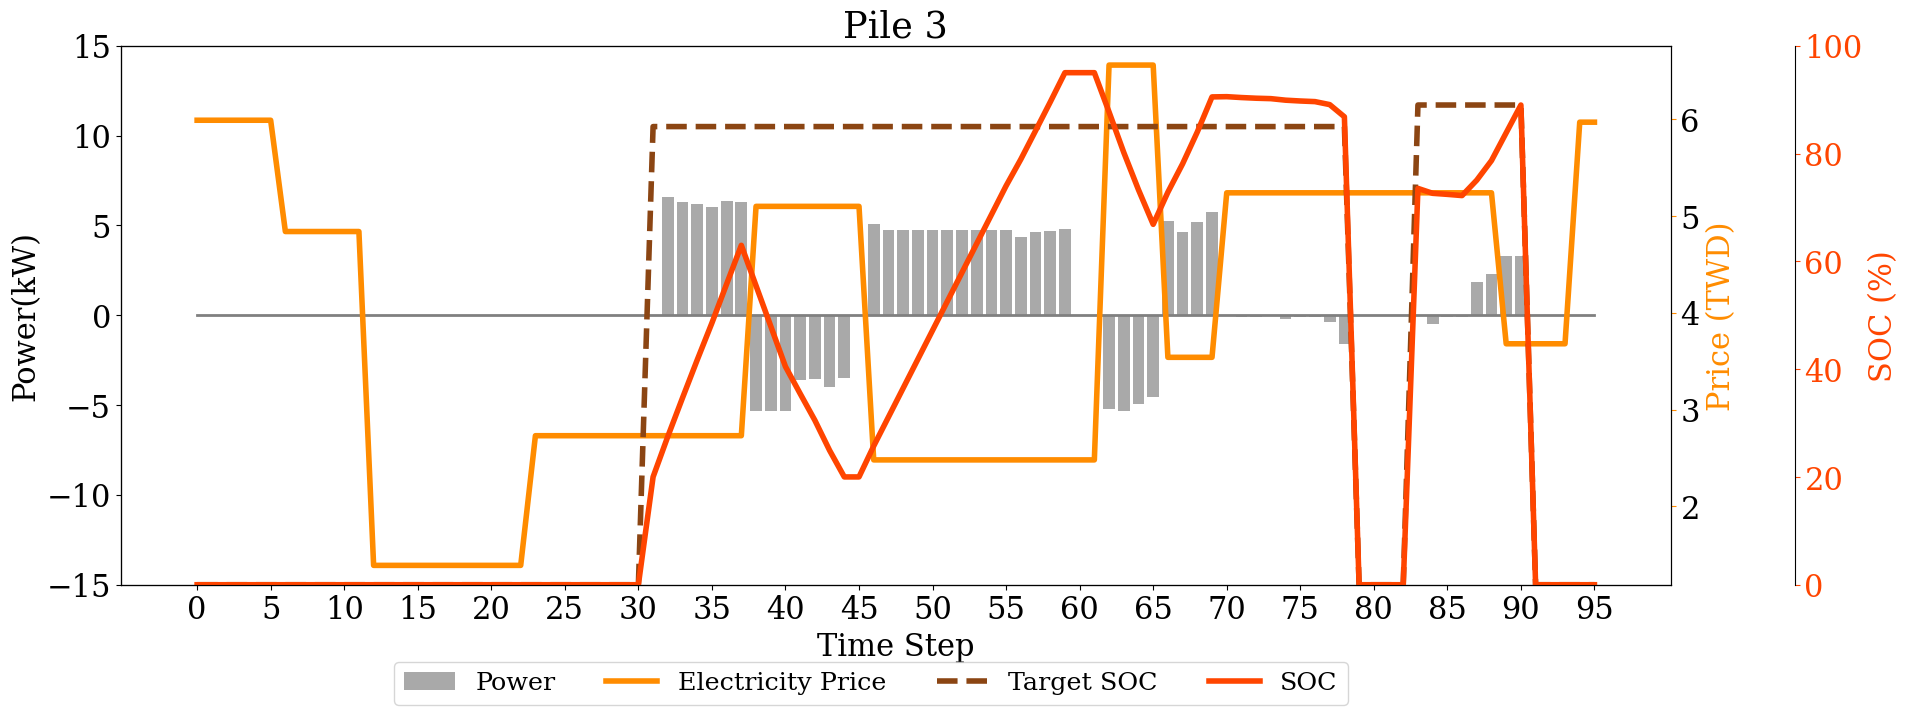

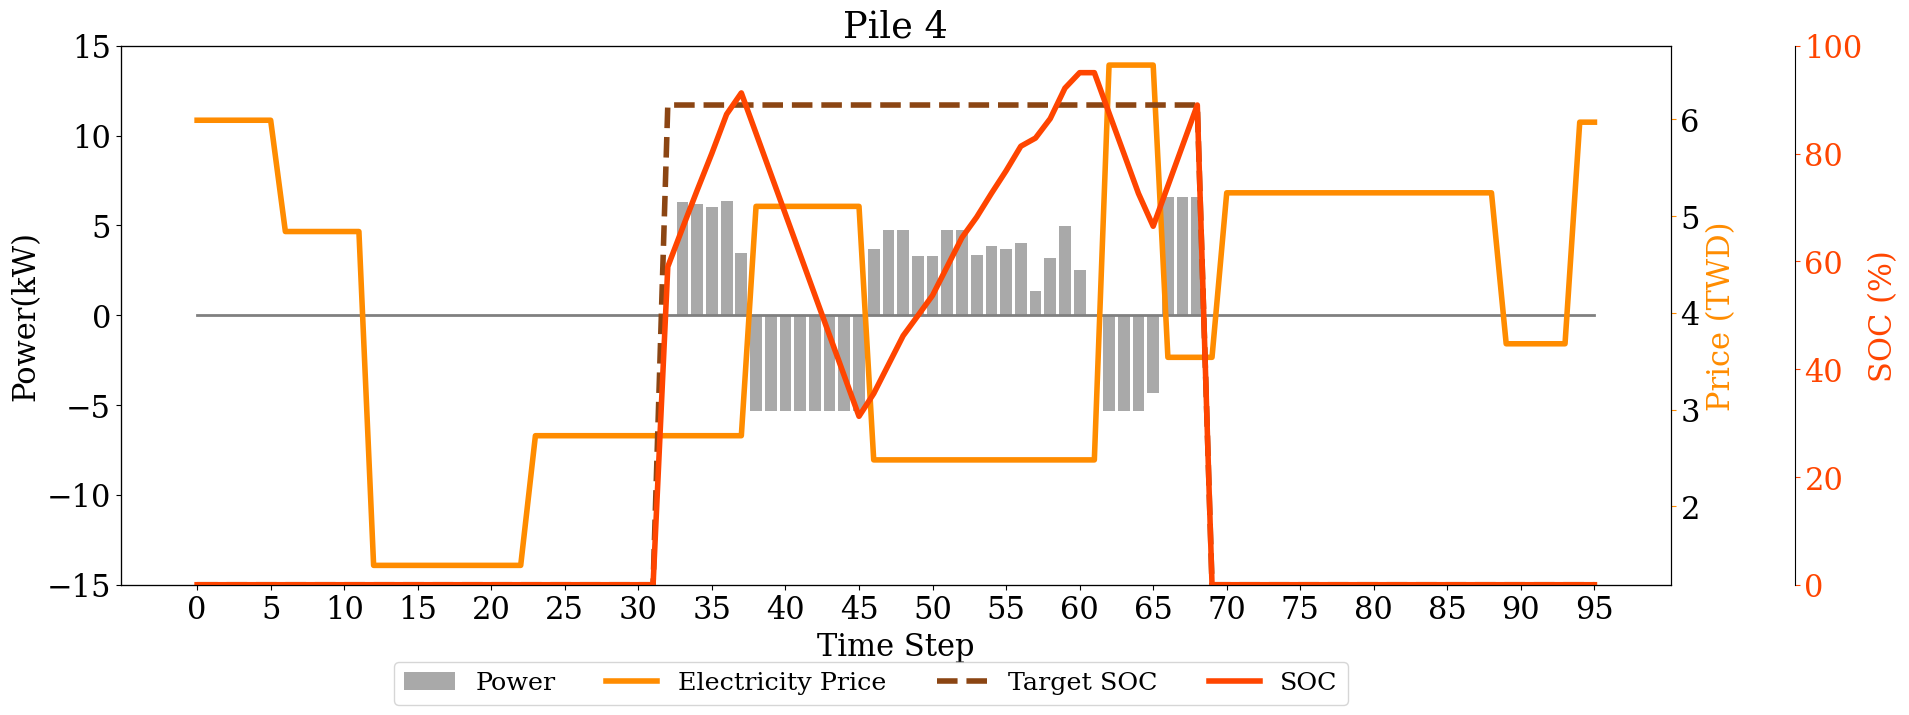

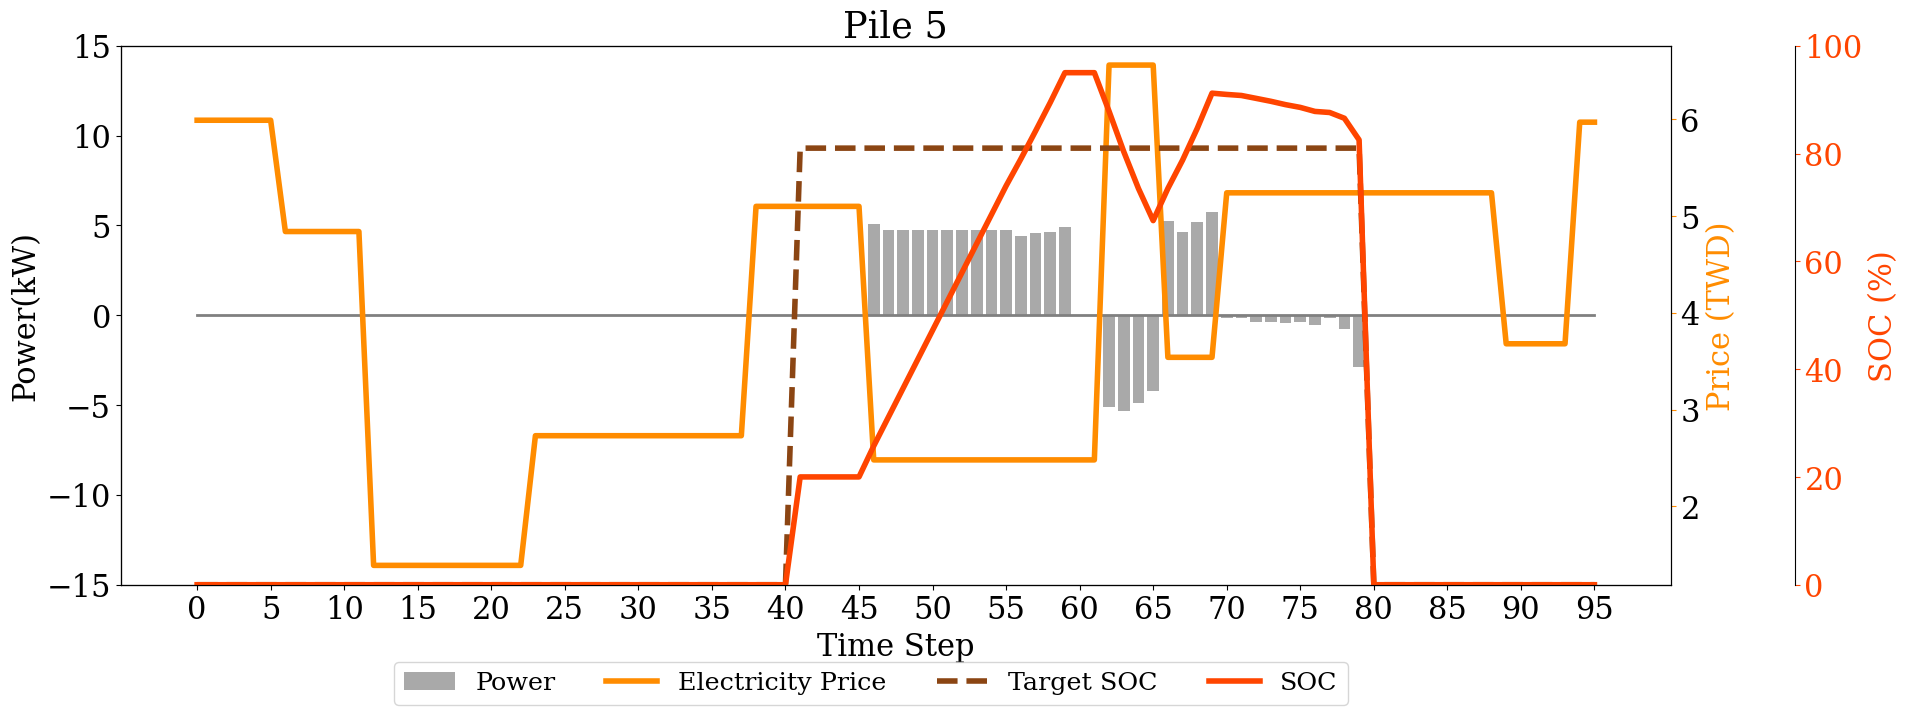

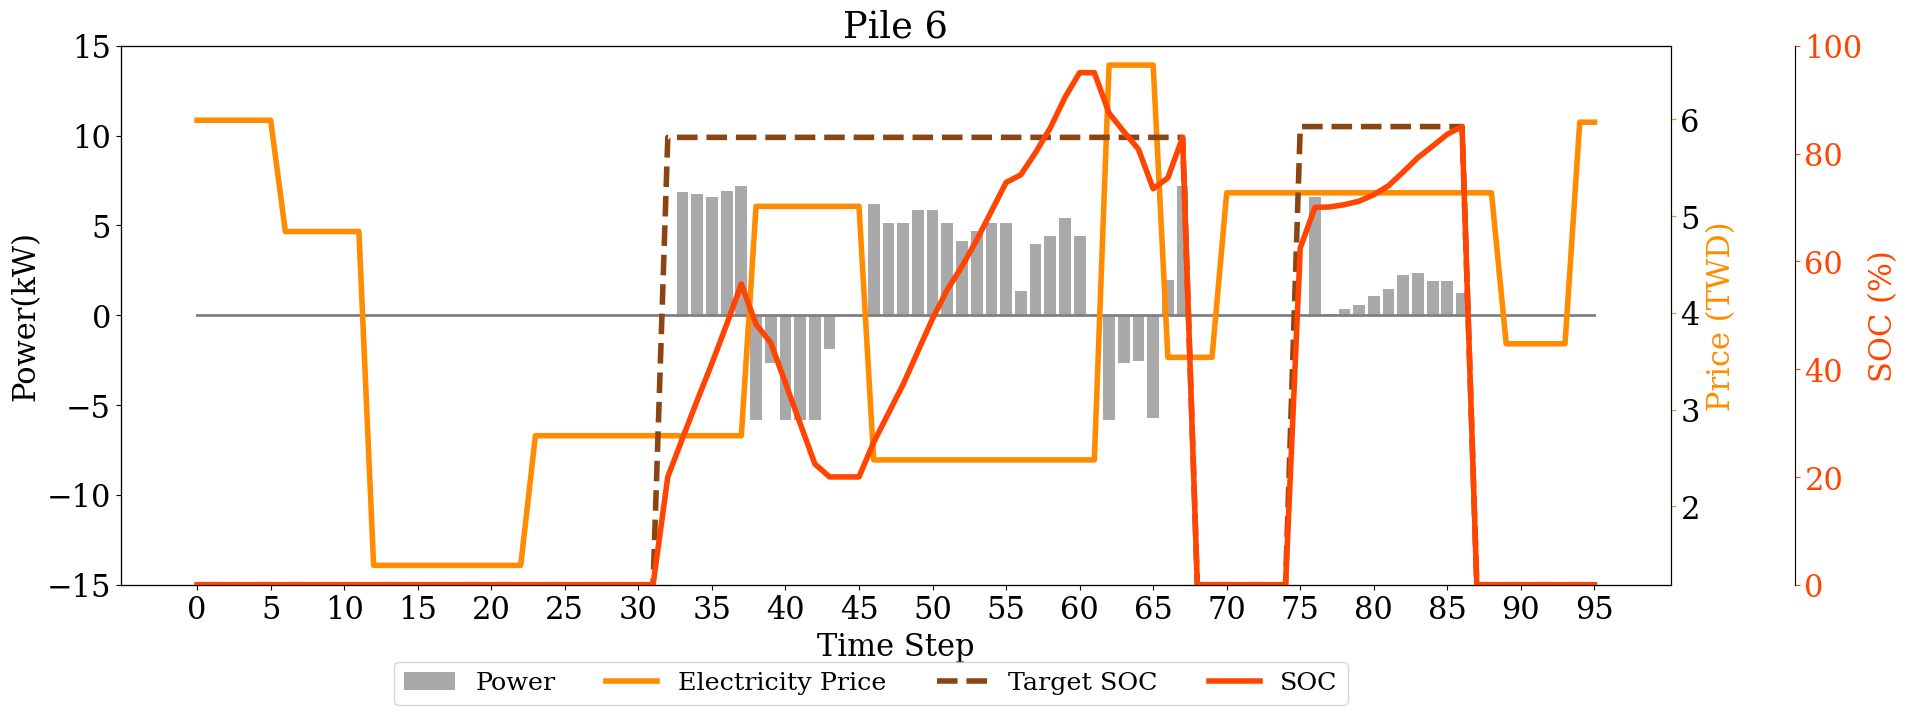

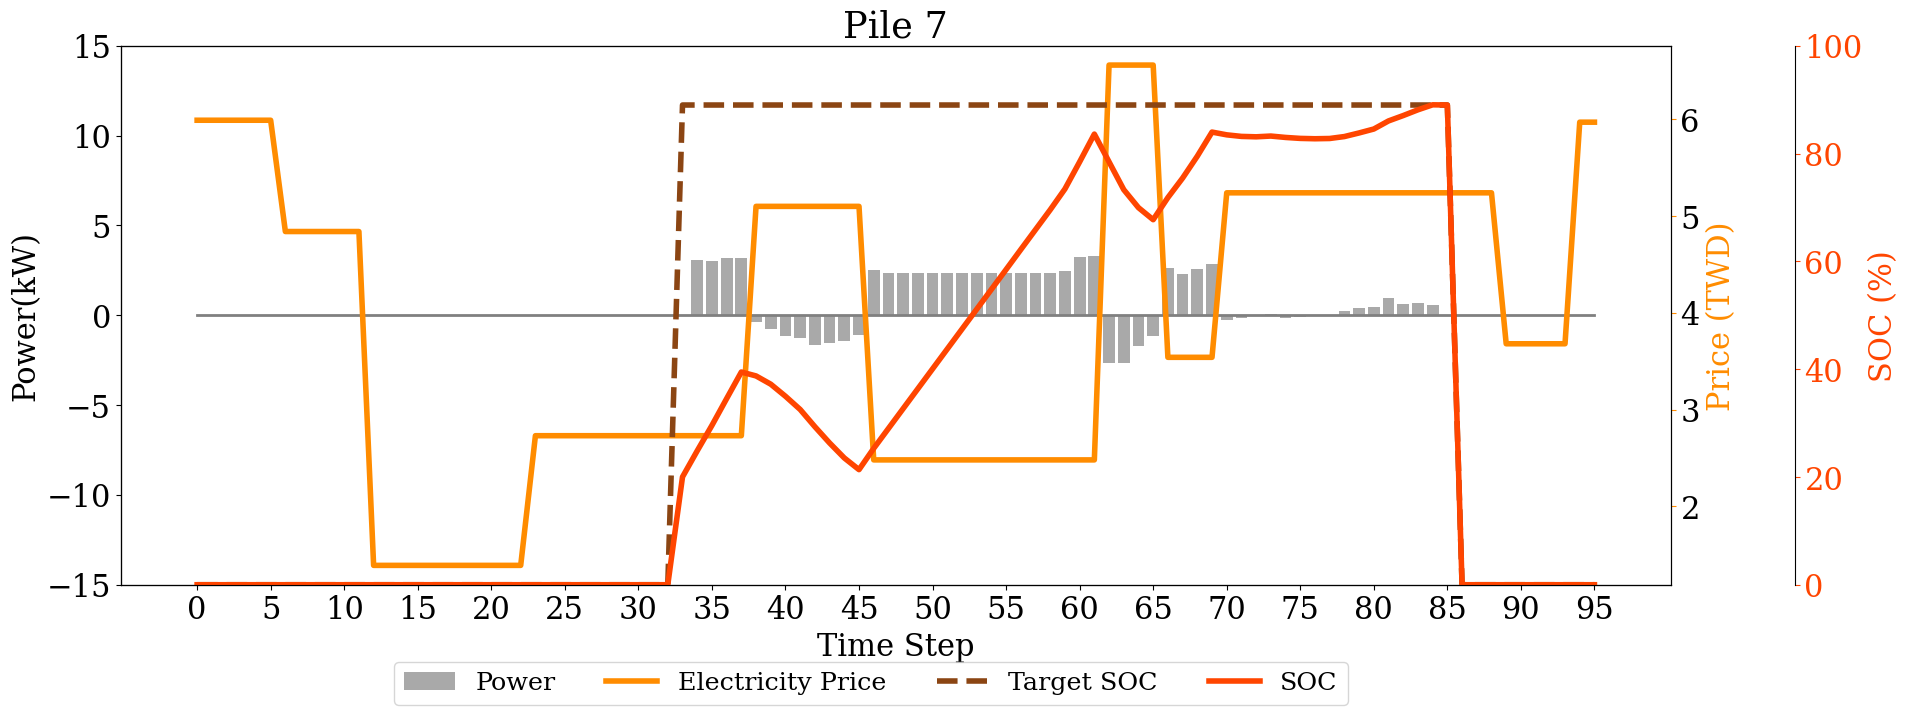

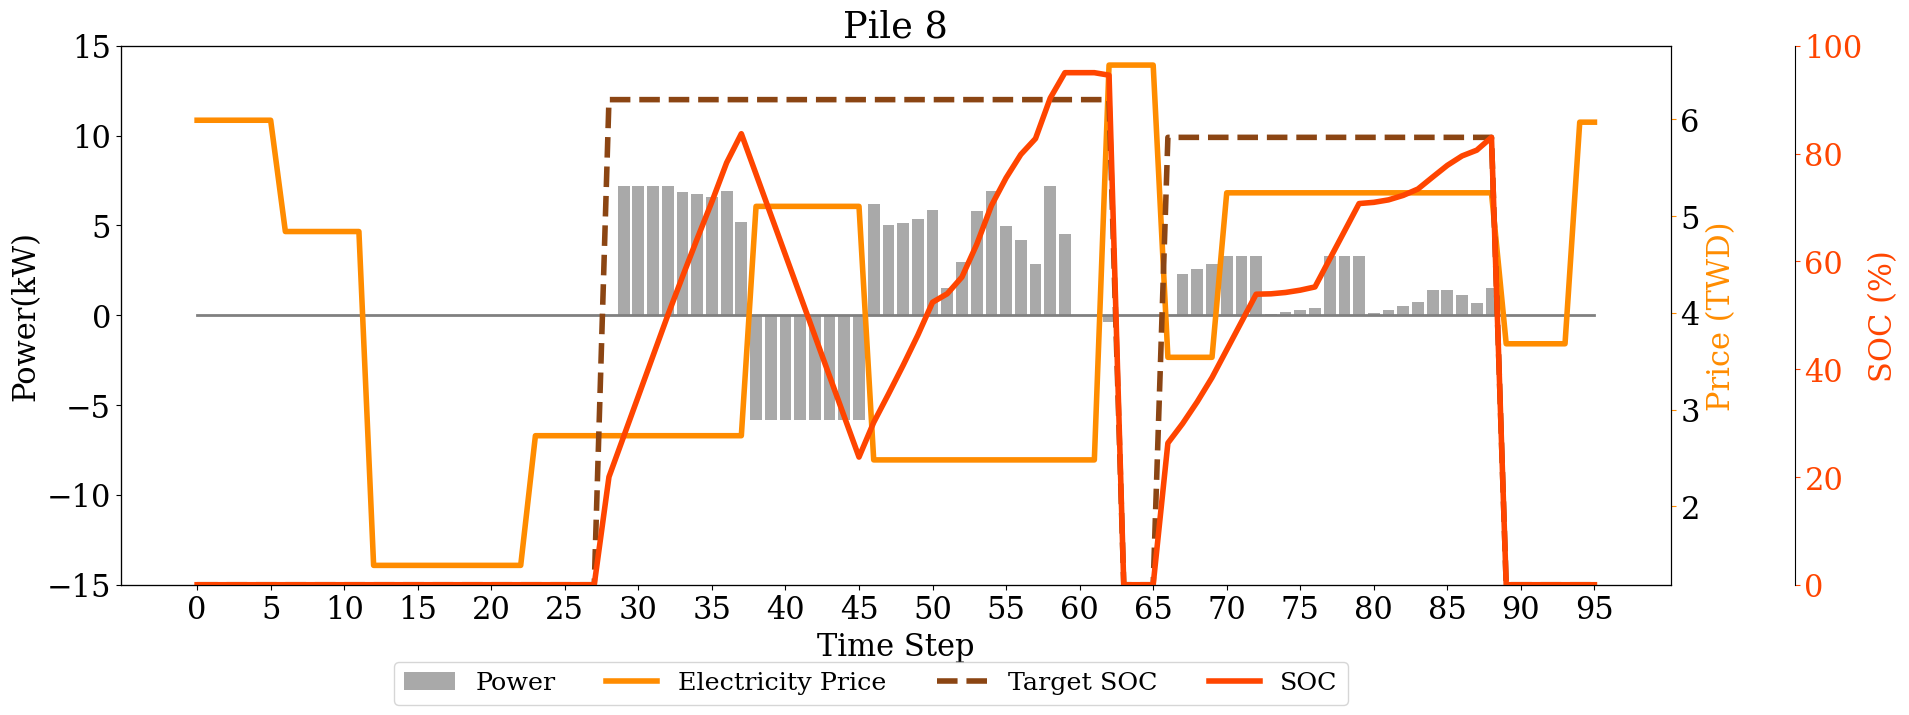

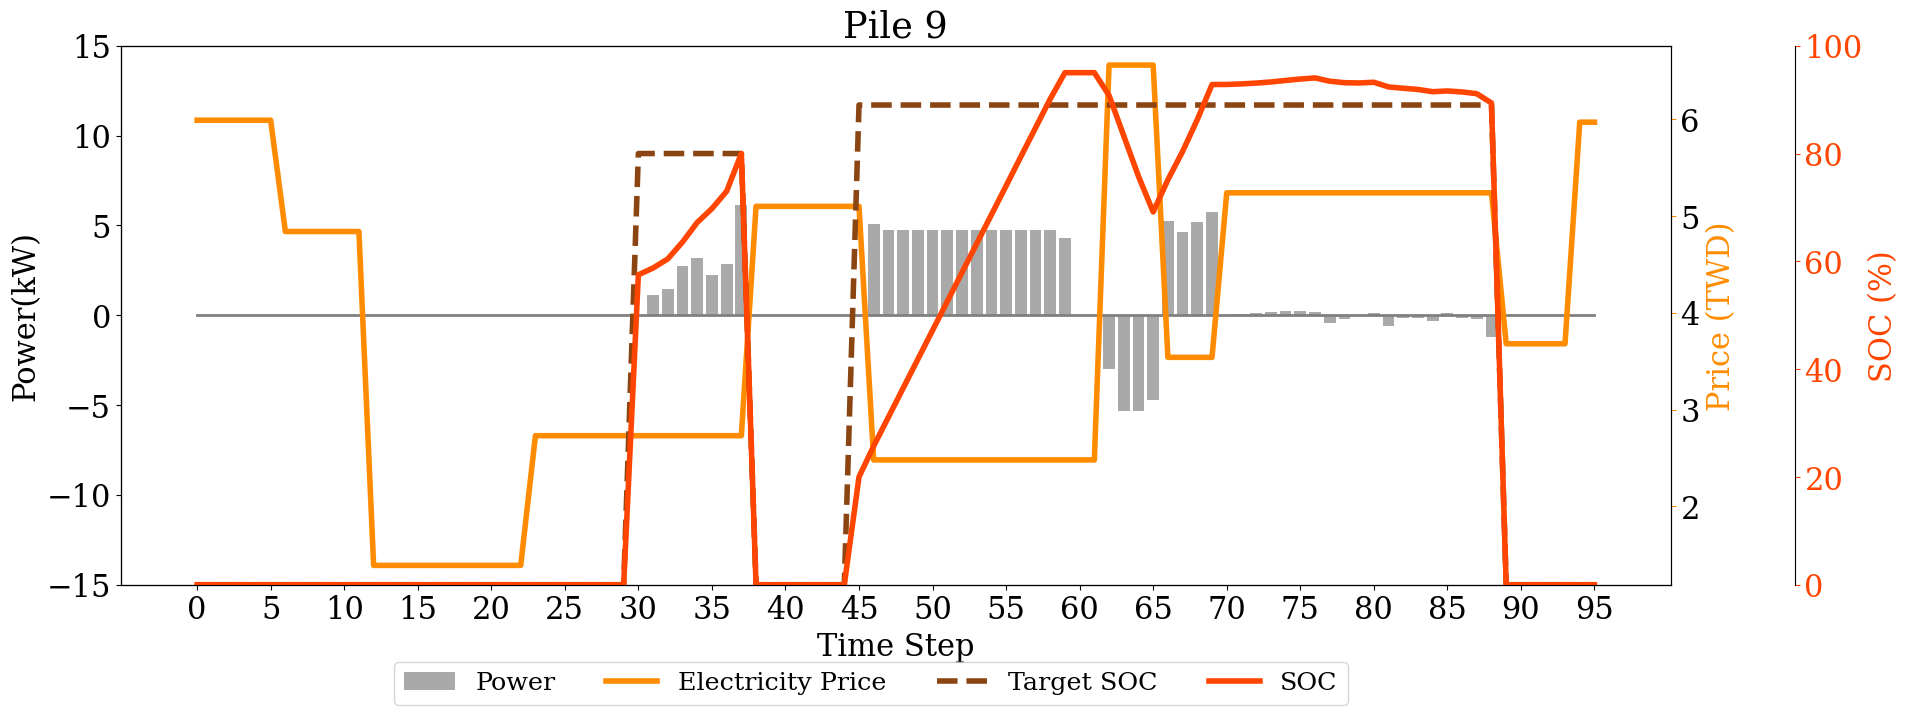

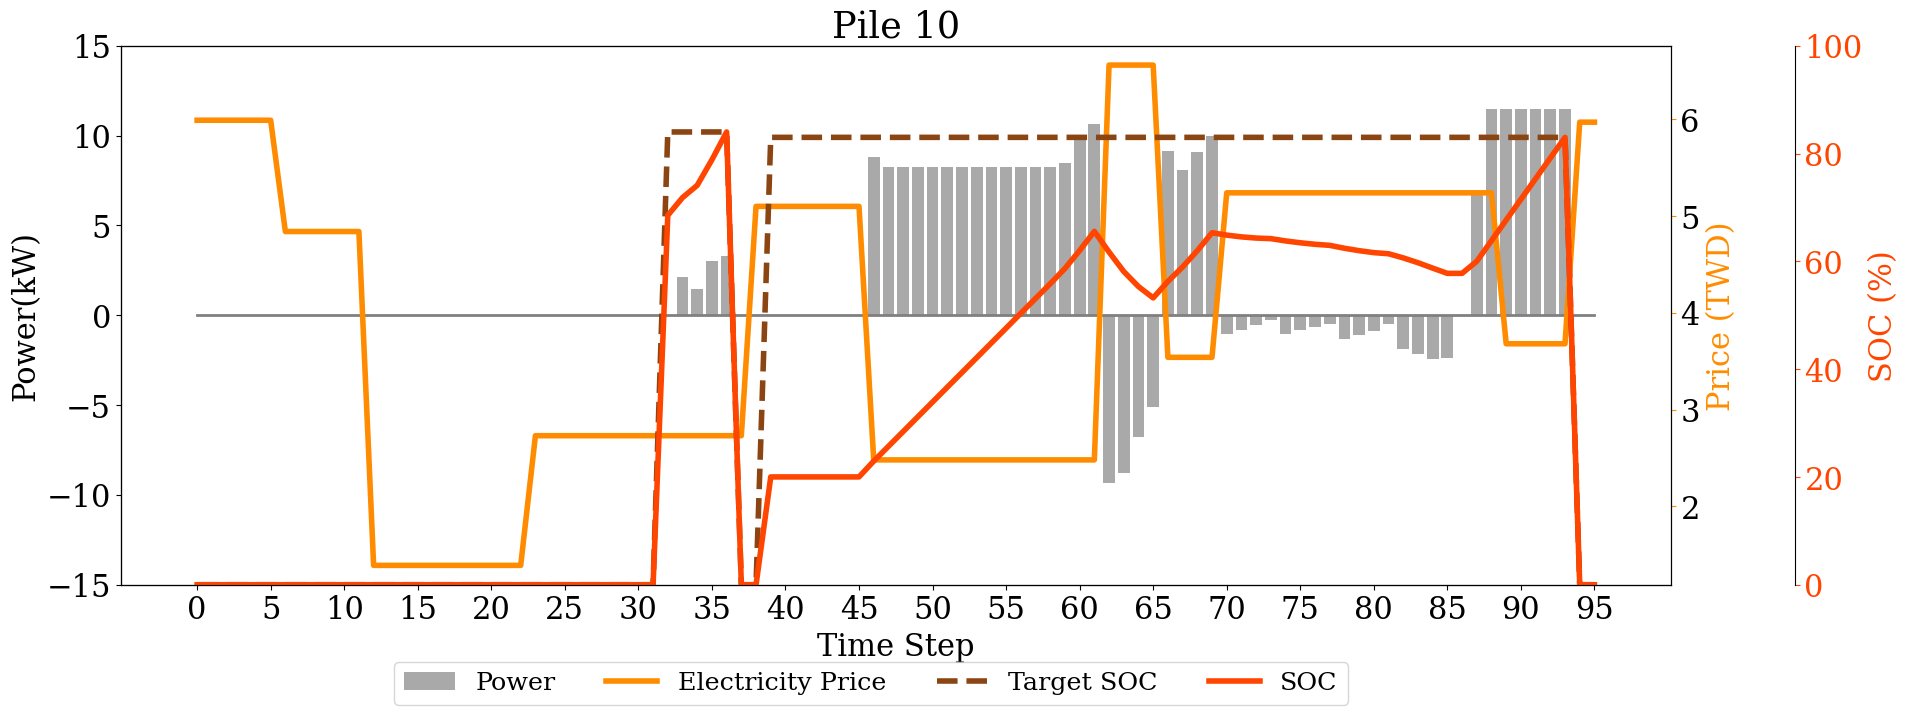

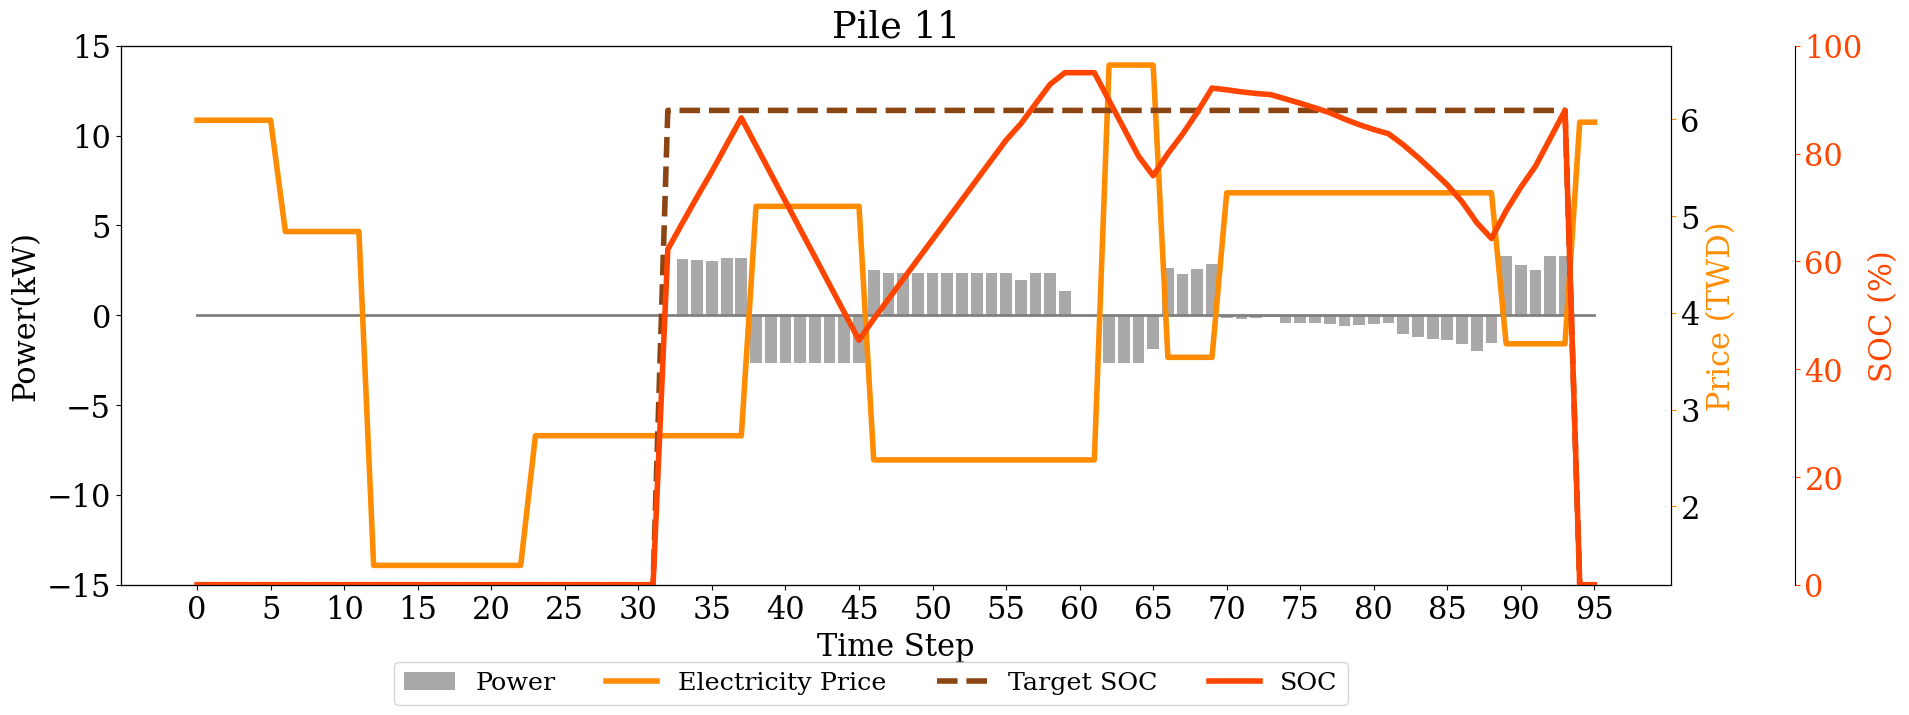

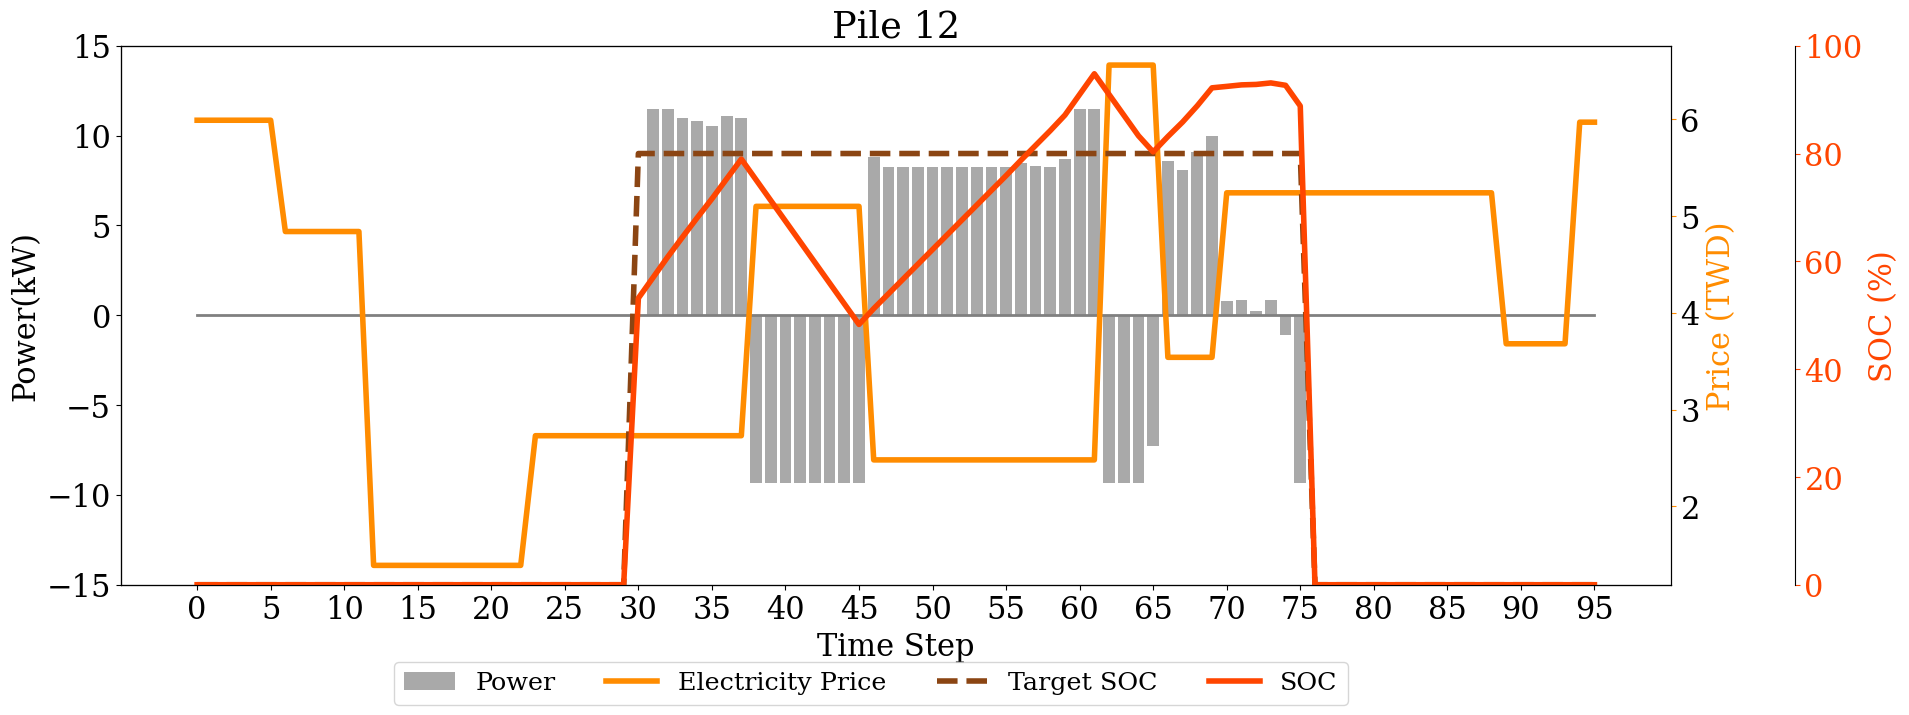

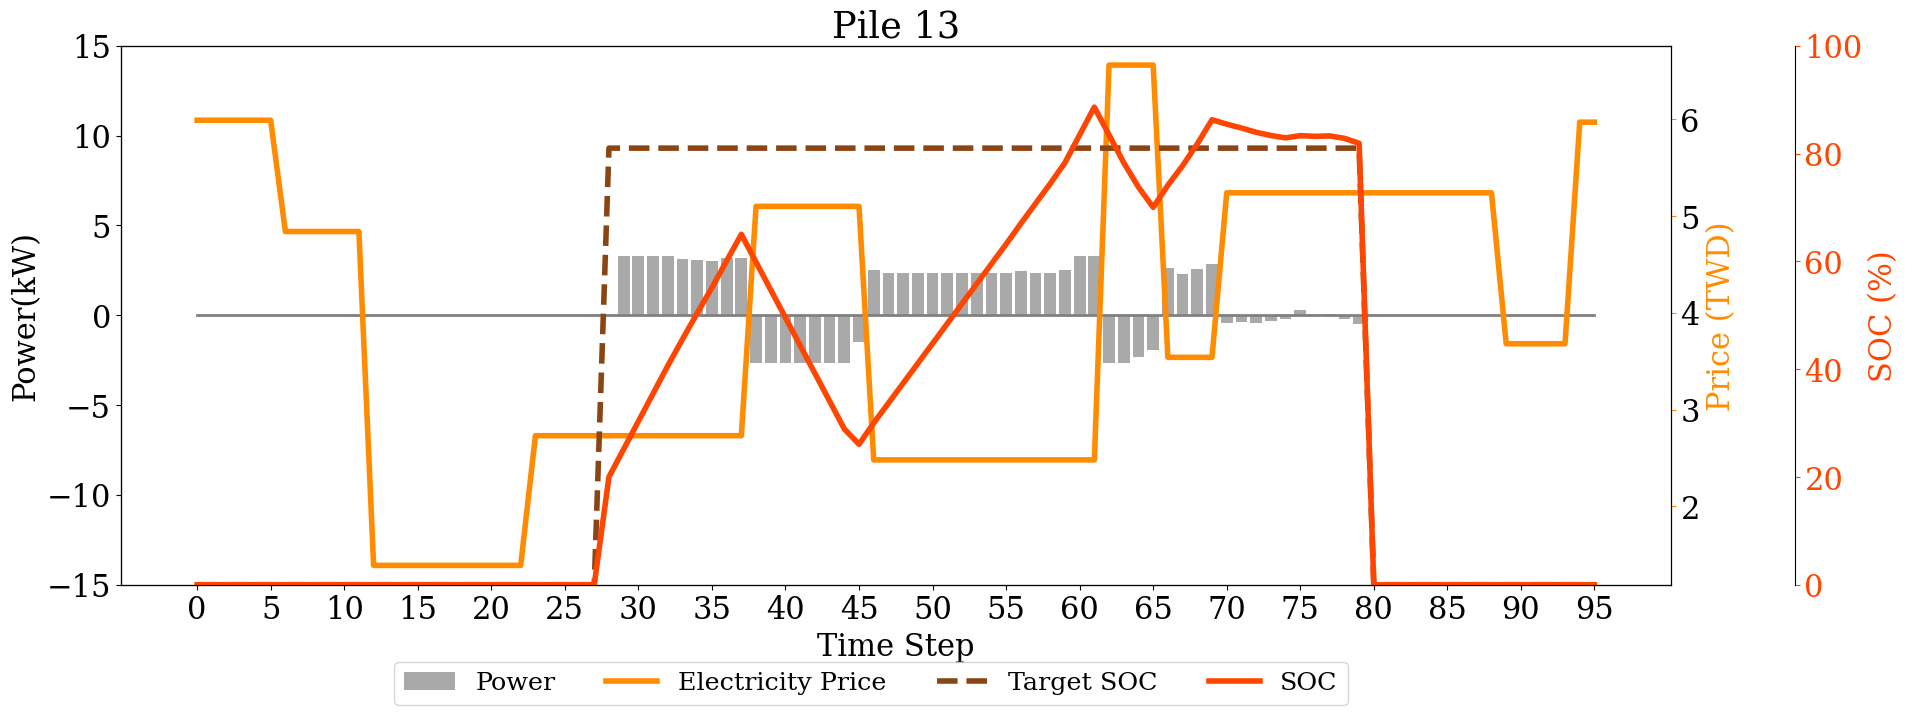

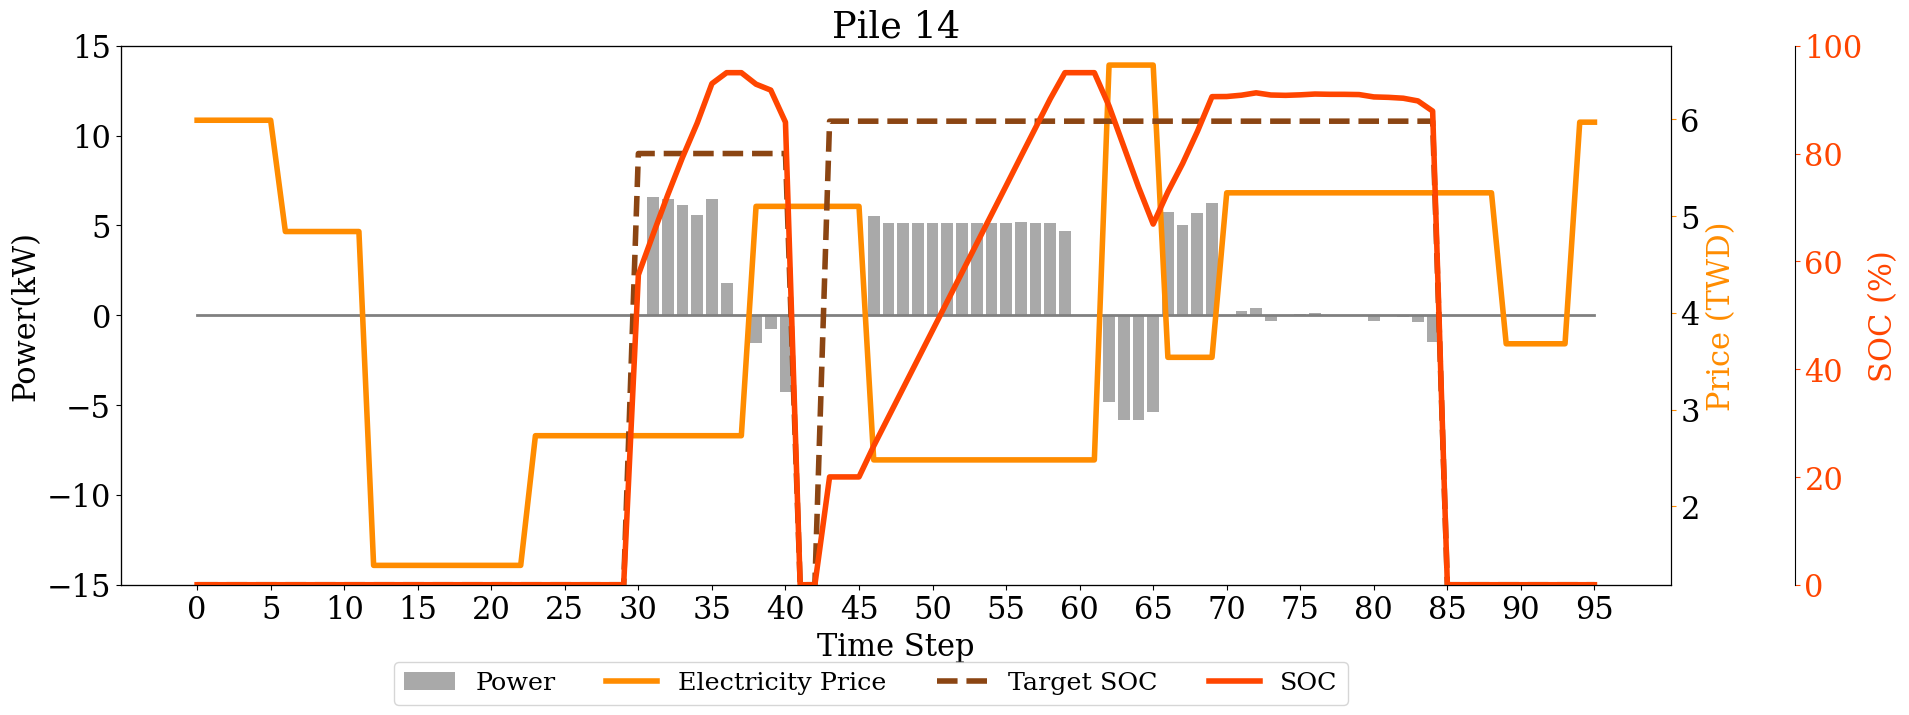

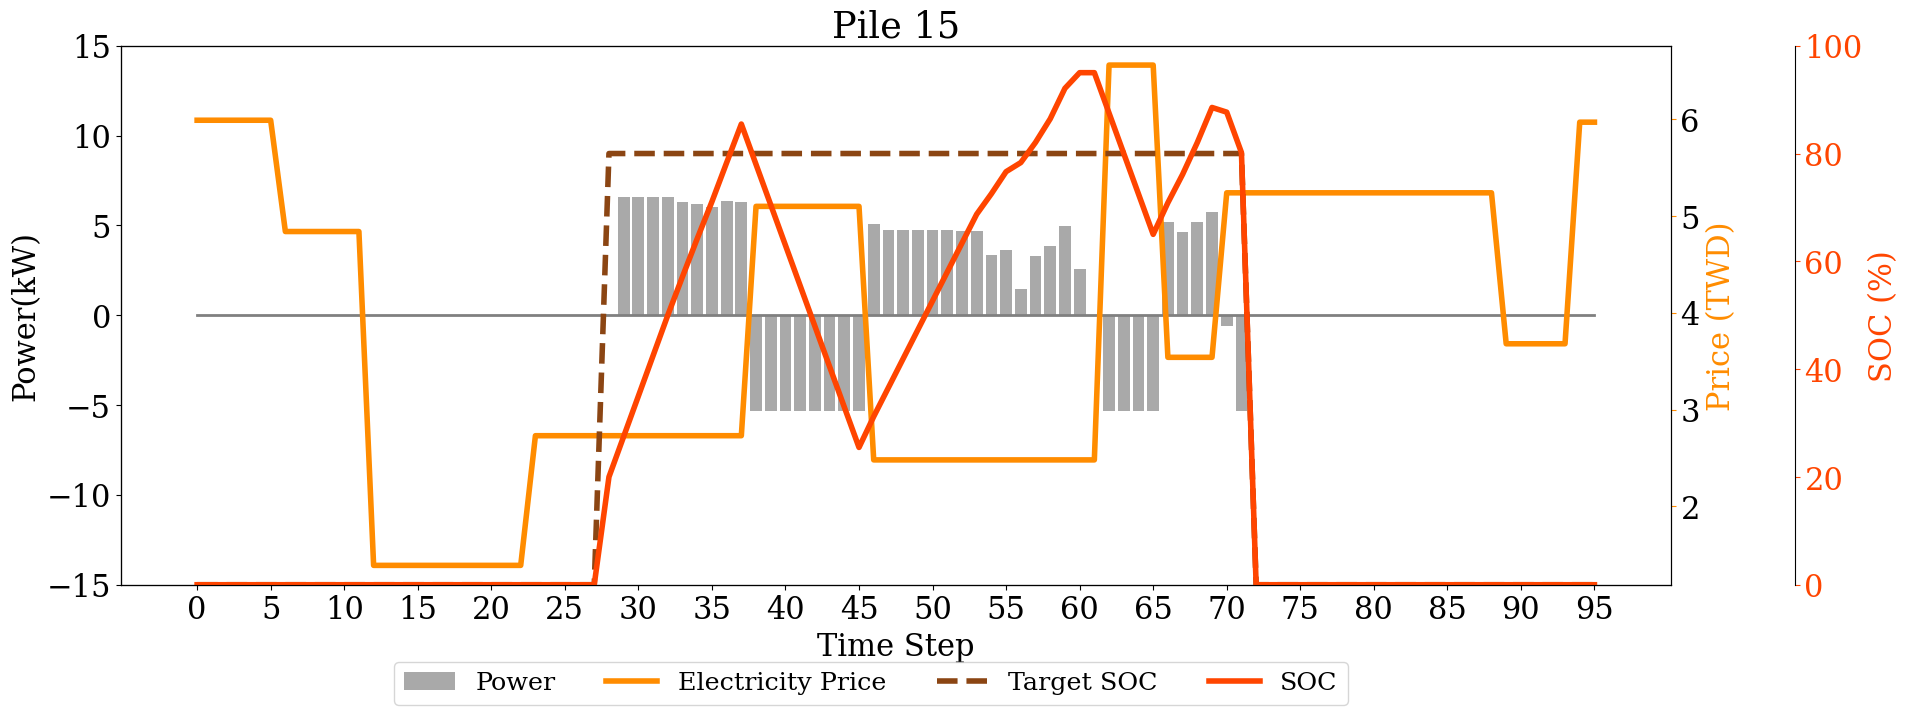

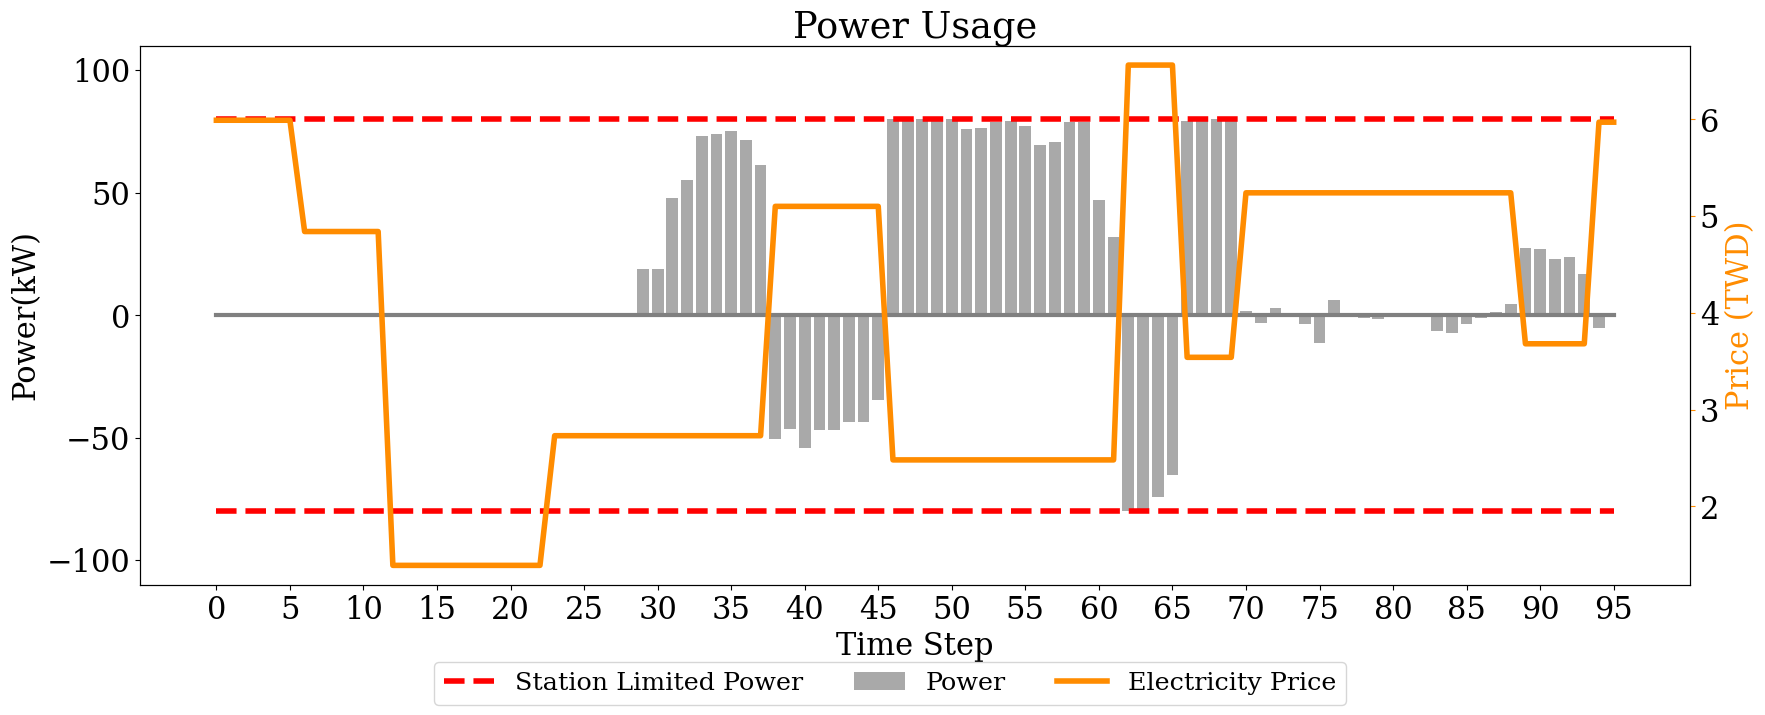

In [17]:
env = StationEnv(mode = "test", N_piles = num_of_pile)
env.seed(0)
# random_price = np.array([5]*22+[7]*9+[4]*14+[2]*11+[7]*18+[5]*11+[3]*11)
# random_price = np.array([5]*22+[7]*9+[2]*14+[4]*11+[7]*18+[5]*11+[3]*11)
random_price = [5.99]*6+[4.84]*6+[1.39]*11+[2.73]*15+[5.10]*8+[2.48]*16+[6.56]*4+[3.54]*4+[5.24]*19+[3.68]*5+[5.97]*2
env.reset(seed = 1, select_pile = np.random.choice(env.possible_agents), price_data = random_price)

time_step = env.T_cur
###
start_time = time.time()
###
for agent in env.agent_iter():
    obs, reward, termination, truncation, info = env.last()
    if termination or truncation:
        action = None
    else:
        # action, _ = model.predict(obs, deterministic=True)
        action = model.actor.forward(np.array([obs]))[0][0].cpu().detach().numpy()

    env.step(action)

###
end_time = time.time()
execution_time = end_time - start_time
print("程式執行時間：", execution_time, "秒")
###
print(env.total_cost)
# -------------------------------------------------------------
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
price_color = 'darkorange'
path_name   = "plot/random/"

def plot_pile(car_id, data, save=False):
    title = "Pile "+car_id[5:]
    plot_time = np.array(range(96))
    plot_pile_price  = data["Price"]
    plot_pile_soc    = data["SOC"][car_id]
    plot_pile_soc_T  = data["SOC_T"][car_id]
    plot_pile_P_t    = data["P_action"][car_id]
    plot_pile_P_L    = data["P_lower"][car_id]
    plot_pile_P_U    = data["P_upper"][car_id]
    plot_pile_P_used = data["P_use"][car_id]

    if len(plot_pile_soc) < 96:
        plot_pile_soc   = np.concatenate( (  plot_pile_soc, np.zeros(96 - len(plot_pile_soc)) ) )

    if len(plot_pile_soc_T) < 96:
        plot_pile_soc_T = np.concatenate( (plot_pile_soc_T, np.zeros(96 - len(plot_pile_soc_T)) ) )

    if len(plot_pile_P_t) < 96:
        plot_pile_P_t   = np.concatenate( (  plot_pile_P_t, np.zeros(96 - len(plot_pile_P_t)) ) )

    if len(plot_pile_P_L) < 96:
        plot_pile_P_L   = np.concatenate( (  plot_pile_P_L, np.zeros(96 - len(plot_pile_P_L)) ) )

    if len(plot_pile_P_U) < 96:
        plot_pile_P_U   = np.concatenate( (  plot_pile_P_U, np.zeros(96 - len(plot_pile_P_U)) ) )
        
    if len(plot_pile_P_used) < 96:
        plot_pile_P_used = np.concatenate( (  plot_pile_P_used, np.zeros(96 - len(plot_pile_P_used)) ) )

    plt.rcParams["figure.figsize"] = (20, 7)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif']  = ['Times New Roman'] + plt.rcParams['font.serif']

    fig,axes = plt.subplots()
    plt.title(title)
    axes.set_xticks(plot_time[::5])
    axes.set_xlabel('Time Step')
    # power
    axes.set_ylabel('Power(kW)')
    axes.spines['right'].set_position(("axes",0))
    axes.set_ylim(-15,15)
    axes.plot( plot_time, np.zeros(96), color = 'gray', linewidth = 2 )
    axes.bar(plot_time, plot_pile_P_used*0.9, label = "Power", color = 'darkgray' )
    
    # price
    sub_price = axes.twinx()
    sub_price.set_ylim(min(plot_pile_price)-0.2,max(plot_pile_price)+0.2)
    sub_price.set_ylabel('Price (TWD)', color=price_color)
    sub_price.spines['left'].set_position(("axes",1))
    sub_price.tick_params(axis='y', color=price_color)
    sub_price.plot( plot_time, plot_pile_price, label = "Electricity Price", linewidth = 4, color=price_color)

    # soc
    sub_soc = axes.twinx()
    sub_soc.set_ylabel('SOC (%)',color='orangered')
    sub_soc.set_ylim(0,100)
    sub_soc.spines['right'].set_position(("axes",1.08))
    sub_soc.tick_params(axis='y',colors = 'orangered')
    sub_soc.plot( plot_time, np.array(plot_pile_soc_T)*100, label = "Target SOC", color = 'saddlebrown', linewidth = 4 , linestyle="--")
    sub_soc.plot( plot_time,   np.array(plot_pile_soc)*100, label = "SOC"       , color = 'orangered', linewidth = 4 )

    # set all legend    
    fig.legend(bbox_to_anchor=(0.5, -0.08), loc="lower center", fontsize='small', shadow=False, ncol=6)
    fig.show()

    #save img
    if save:
        desired_dpi = 300
        fig.savefig(path_name + title + '.svg', dpi=desired_dpi, bbox_inches='tight')
        print('save',path_name + title )

def plot_station(data, save=False):
    title = "Power Usage"
    plot_time = np.array(range(96))
    plot_pile_price = data["Price"]
    plot_P_total    = data["P_total"]
    plot_P_max_station = data["P_max_station"]
    
    if len(plot_P_total) < 96:
        plot_P_total = np.concatenate( (  plot_P_total, np.zeros(96 - len(plot_P_total)) ) )
    
    plt.rcParams["figure.figsize"] = (20, 7)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif']  = ['Times New Roman'] + plt.rcParams['font.serif']

    fig,axes = plt.subplots()
    plt.title(title)
    axes.set_xlabel('Time Step')
    axes.set_xticks(plot_time[::5])
    
    # power
    axes.set_ylabel('Power(kW)')
    axes.set_ylim(-(plot_P_max_station+30),plot_P_max_station+30)
    axes.bar(plot_time, plot_P_total, label = "Power", color = 'darkgray' )
    
    axes.plot( plot_time,   np.zeros(len(plot_time)) , color = 'gray' , linewidth = 3 )
    axes.plot( plot_time,   [plot_P_max_station]*len(plot_time), label = "Station Limited Power" , color = 'red' , linewidth = 4, linestyle="--")
    axes.plot( plot_time,  [-plot_P_max_station]*len(plot_time), color = 'red' , linewidth = 4, linestyle="--")
    
    # price
    sub_price = axes.twinx()
    sub_price.set_ylim(min(plot_pile_price)-0.2,max(plot_pile_price)+0.2)
    sub_price.set_ylabel('Price (TWD)', color=price_color)
    sub_price.spines['left'].set_position(("axes",0))
    sub_price.tick_params(axis='y', color=price_color)
    sub_price.plot( plot_time, plot_pile_price, label = "Electricity Price", linewidth = 4, color=price_color)
    
    fig.legend(bbox_to_anchor=(0.5, -0.08), loc="lower center", fontsize='small', shadow=False, ncol=6)
    fig.show()
    
    if save:
        desired_dpi = 300
        fig.savefig(path_name + title + '.svg', dpi=desired_dpi, bbox_inches='tight')

if plot_image:
    for agent in env.possible_agents:
        plot_pile(car_id = agent, data = env.plot_data, save = save_image)

    plot_station( data = env.plot_data, save = save_image)

# plot_pile(car_id = 'pile_8', data = env.plot_data, save = True)